# Better Filters

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import colorsys

In [2]:
import pandas as pd

In [3]:
filters_index = pd.read_excel("/Users/juan/ZiaLab/Codebase/zialab/misc/Filters.xlsx")

In [4]:
# filter_names = list(filters_index['filter'])

In [25]:
xl = pd.ExcelFile('/Users/juan/ZiaLab/Codebase/zialab/misc/Filters.xlsx')
filter_names = xl.sheet_names  # see all sheet names
#xl.parse(sheet_name)  # read a specific sheet to DataFrame

In [32]:
filters = {}
common_waves = np.linspace(200,2000,9001)
for idx, filter_name in enumerate(filter_names):
    if filter_name == 'Sheet1':
        continue
    first_col = list(xl.parse(filter_name,skiprows=0,header=None)[0])
    second_col = list(xl.parse(filter_name,skiprows=0,header=None)[1])
    filter_type = 'Semrock'
    try:
        filter_type = list(xl.parse(filter_name,skiprows=0,header=None)[2])[1]
    except:
        pass
    filter_name = '%s - %s' % (filter_type, filter_name)
    if filter_type == 'Semrock':
        filter_name = first_col[0].split('Semrock')[-1].lstrip().split(' ')[0]
        filter_name = '%s - %s' % (filter_type, filter_name)
        print(idx,'-',filter_name)
        for row_num, row in enumerate(first_col):
            if 'AOI' in str(row):
                aoi_index = row_num
            if '(0 to 1)' in str(row).lower():
                start_row = row_num + 1
                break
        filter_data = np.array([first_col[start_row:],
                                second_col[start_row:]])
        filter_waves = first_col[start_row:]
        filter_transmi = second_col[start_row:]
        filter_intertransmi = np.interp(common_waves, filter_waves, filter_transmi,left=np.nan,right=np.nan)
        filter_data = np.array([common_waves,
                            filter_intertransmi])
        filters[filter_name] = {}
        aoi = first_col[aoi_index].split(':')[-1].strip()
        if aoi == '':
            aoi = 0
        else:
            aoi = 45
        filters[filter_name]['data'] = filter_data.T
        filters[filter_name]['AOI'] = aoi
        filters[filter_name]['metadata'] = '\n'.join([str(s) for s in first_col[:start_row-1]])
    elif filter_type == 'Chroma':
        print(idx,'- Chroma -',filter_name)
        filter_data = np.array([first_col[1:],
                                second_col[1:]])
        filter_waves = first_col[1:]
        filter_transmi = second_col[1:]
        filter_intertransmi = np.interp(common_waves, filter_waves, filter_transmi,left=np.nan,right=np.nan)
        filter_data = np.array([common_waves,
                            filter_intertransmi])
        filters[filter_name] = {}
        aoi = 0
        filters[filter_name]['data'] = filter_data.T
        filters[filter_name]['AOI'] = aoi
        filters[filter_name]['metadata'] = ''
    elif filter_type == 'Thorlabs':
        print(idx,'- Thorlabs -',filter_name)
        filter_data = np.array([first_col[1:],
                                second_col[1:]])
        filter_waves = first_col[1:]
        filter_transmi = second_col[1:]
        filter_intertransmi = np.interp(common_waves, filter_waves, filter_transmi,left=np.nan,right=np.nan)
        filter_data = np.array([common_waves,
                            filter_intertransmi])
        filters[filter_name] = {}
        aoi = 0
        filters[filter_name]['data'] = filter_data.T
        filters[filter_name]['AOI'] = aoi
        filters[filter_name]['metadata'] = ''
    else:
        1/0

1 - Semrock - LL01-976
2 - Semrock - LPD01-514RU
3 - Semrock - SP01-532RU
4 - Semrock - NF03-532E
5 - Semrock - NF03-405E
6 - Semrock - LPD02-532RU
7 - Semrock - LPD02-532RU
8 - Semrock - LPD02-1064RU
9 - Semrock - LP03-532RU
10 - Semrock - LP02-980RU
11 - Semrock - LL01-532
12 - Semrock - LL01-532
13 - Semrock - LL01-488
14 - Semrock - LL01-405
15 - Semrock - FF775-Di01
16 - Semrock - FF746-SDi01
17 - Semrock - FF665-Di02
18 - Semrock - FF01-740/13
19 - Semrock - FF01-650/SP
20 - Semrock - FF01-650/60
21 - Semrock - FF01-605/15
22 - Semrock - FF01-590/20
23 - Semrock - FF01-543/22
24 - Semrock - FF01-406/15
25 - Semrock - FF01-377/50
26 - Semrock - FF01-1538/82
27 - Semrock - FF01-1001/234
28 - Semrock - Di02-R405
29 - Semrock - LPD01-532RS
30 - Semrock - Di01-R488
31 - Semrock - BLP01-785R
32 - Semrock - BLP01-635R
33 - Semrock - BLP01-325R
34 - Semrock - BLP01-405R
35 - Chroma - Chroma - HQ650-60M
36 - Chroma - Chroma - HQ580LP
37 - Chroma - Chroma - 565DCxr
38 - Chroma - Chroma - H

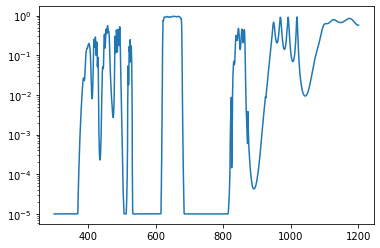

In [28]:
thedata = filters['HQ650-60M']['data']
plt.figure()
plt.plot(thedata[:,0], thedata[:,1])
plt.yscale('log')
plt.show()

In [33]:
pickle.dump(filters,open('/Users/juan/ZiaLab/Codebase/zialab/misc/filters.pkl','wb'))

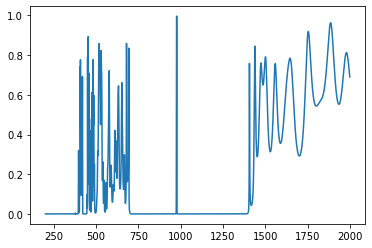

In [24]:
plt.figure()
plt.plot(filters['LL01-976']['data'][:,0],
         filters['LL01-976']['data'][:,1])
plt.show()

In [10]:
angled = [filter_name for filter_name in filters if filters[filter_name]['AOI'] == 45]

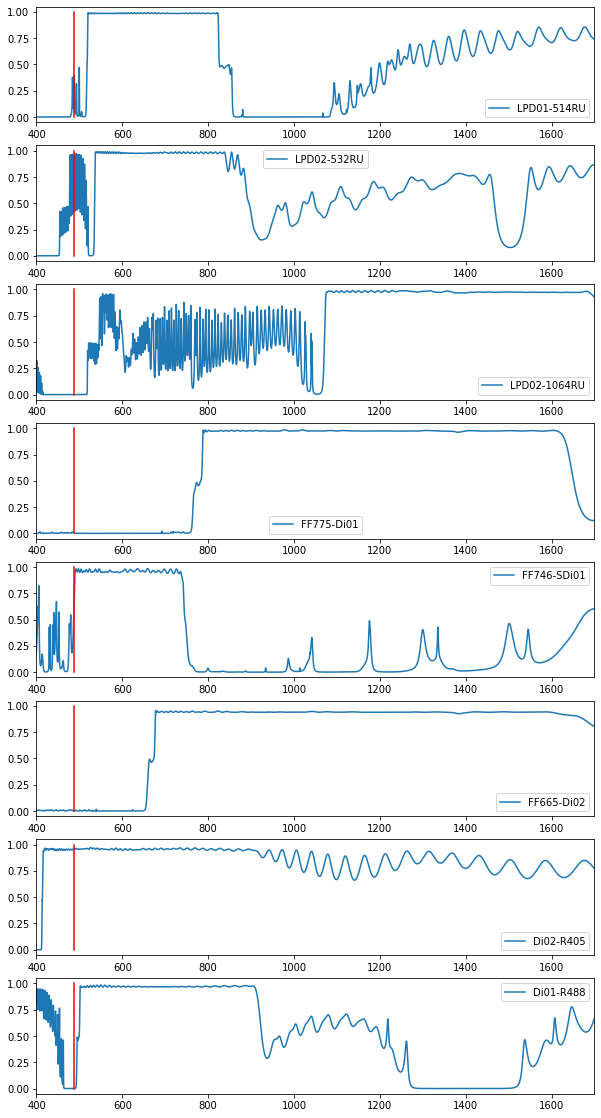

In [11]:
fig, axes = plt.subplots(nrows=len(angled),ncols=1,figsize=(10,20))
for ax_index, filter_name in enumerate(angled):
    axes[ax_index].plot(filters[filter_name]['data'][:,0],
            filters[filter_name]['data'][:,1],label=filter_name)
    axes[ax_index].legend()
    axes[ax_index].set_xlim(400,1700)
    axes[ax_index].plot([488,488],[0,1],'r')
plt.show()

In [171]:
class Filters(): 
    def __init__(self):
        self.filters = pickle.load(open('/Users/juan/Google Drive/Zia Lab/Codebase/zialab/misc/filters.pkl','rb'))
        self.left_filter = None
        self.angled_filter = None
        self.bottom_filter = None
    def search(self,search_terms):
        return {filt: self.filters[filt] for filt in self.filters if search_terms in filt}
    def set_left(self,left_filter):
        self.left_filter = self.filters[left_filter]
    def set_angled_filter(self,angled_filter):
        self.angled_filter = self.filters[angled_filter] 
    def set_bottom_filter(self,bottom_filter):
        self.bottom_filter = self.filters[bottom_filter]
    def collection_path(self):
        if self.angled_filter != None and self.bottom_filter != None:
            self.collection_transmission = np.array([self.angled_filter['data'][:,0],
                                self.angled_filter['data'][:,1]*self.bottom_filter['data'][:,1]])

In [172]:
filters = Filters()

In [173]:
angled = [filter_name for filter_name in filters.filters if filters.filters[filter_name]['AOI'] == 45]

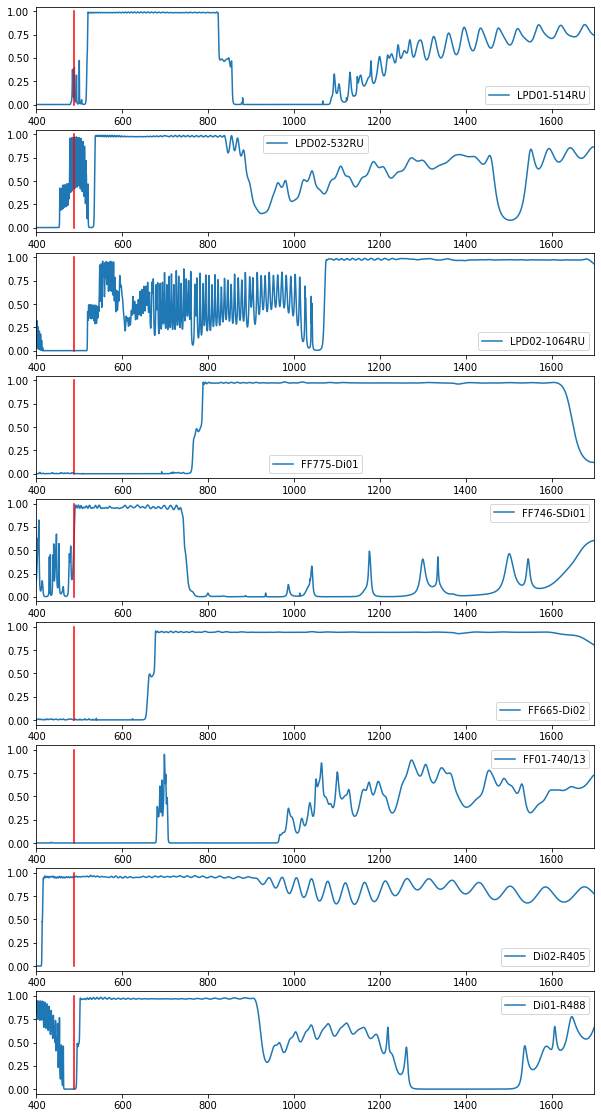

In [174]:
fig, axes = plt.subplots(nrows=len(angled),ncols=1,figsize=(10,20))
for ax_index, filter_name in enumerate(angled):
    axes[ax_index].plot(filters.filters[filter_name]['data'][:,0],
            filters.filters[filter_name]['data'][:,1],label=filter_name)
    axes[ax_index].legend()
    axes[ax_index].set_xlim(400,1700)
    axes[ax_index].plot([488,488],[0,1],'r')
plt.show()

In [12]:
import sys, os, pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
codebase_dir = '/Users/juan/Google Drive/Zia Lab/Codebase/'
sys.path.append(codebase_dir)

In [13]:
from zialab.misc import semrock_filters
%reload_ext autoreload
%autoreload 2

In [14]:
filters = semrock_filters.Filters(codebase_dir)

In [43]:
print(filt)

LL01-976


<IPython.core.display.Javascript object>


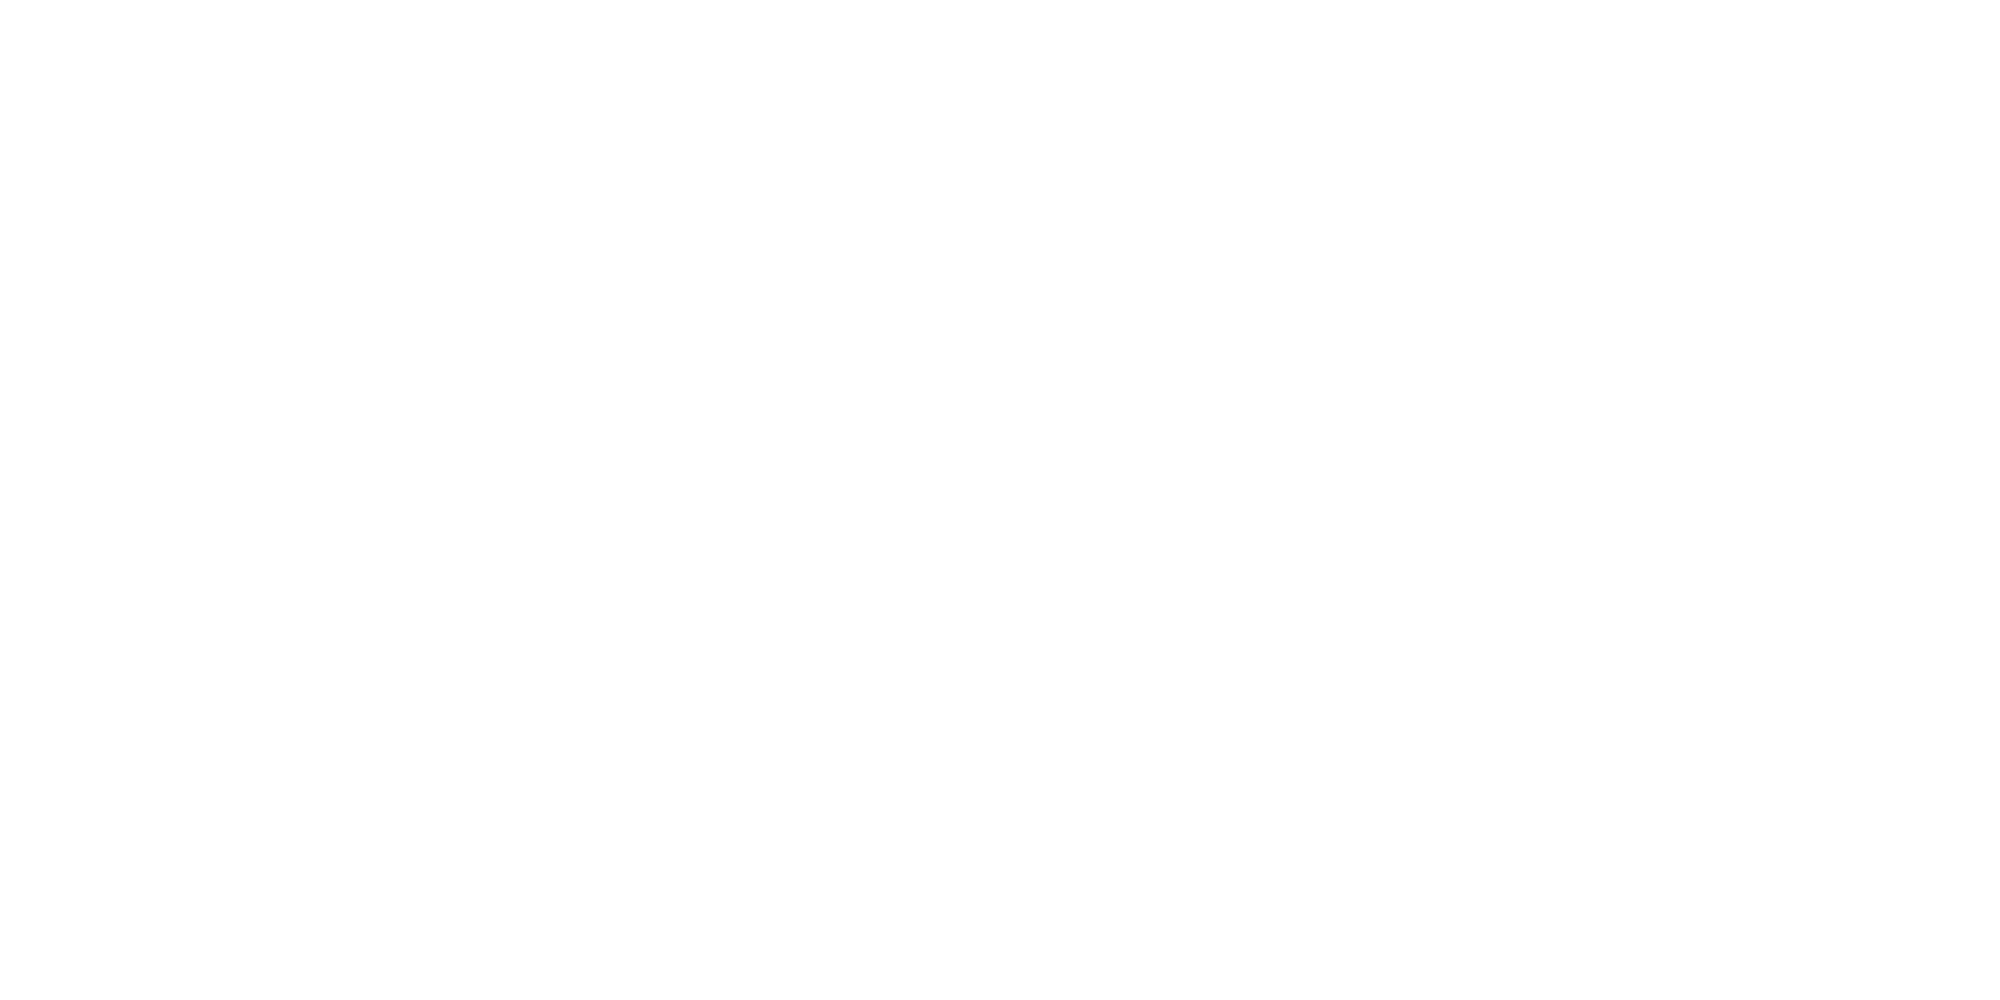

<IPython.core.display.Javascript object>


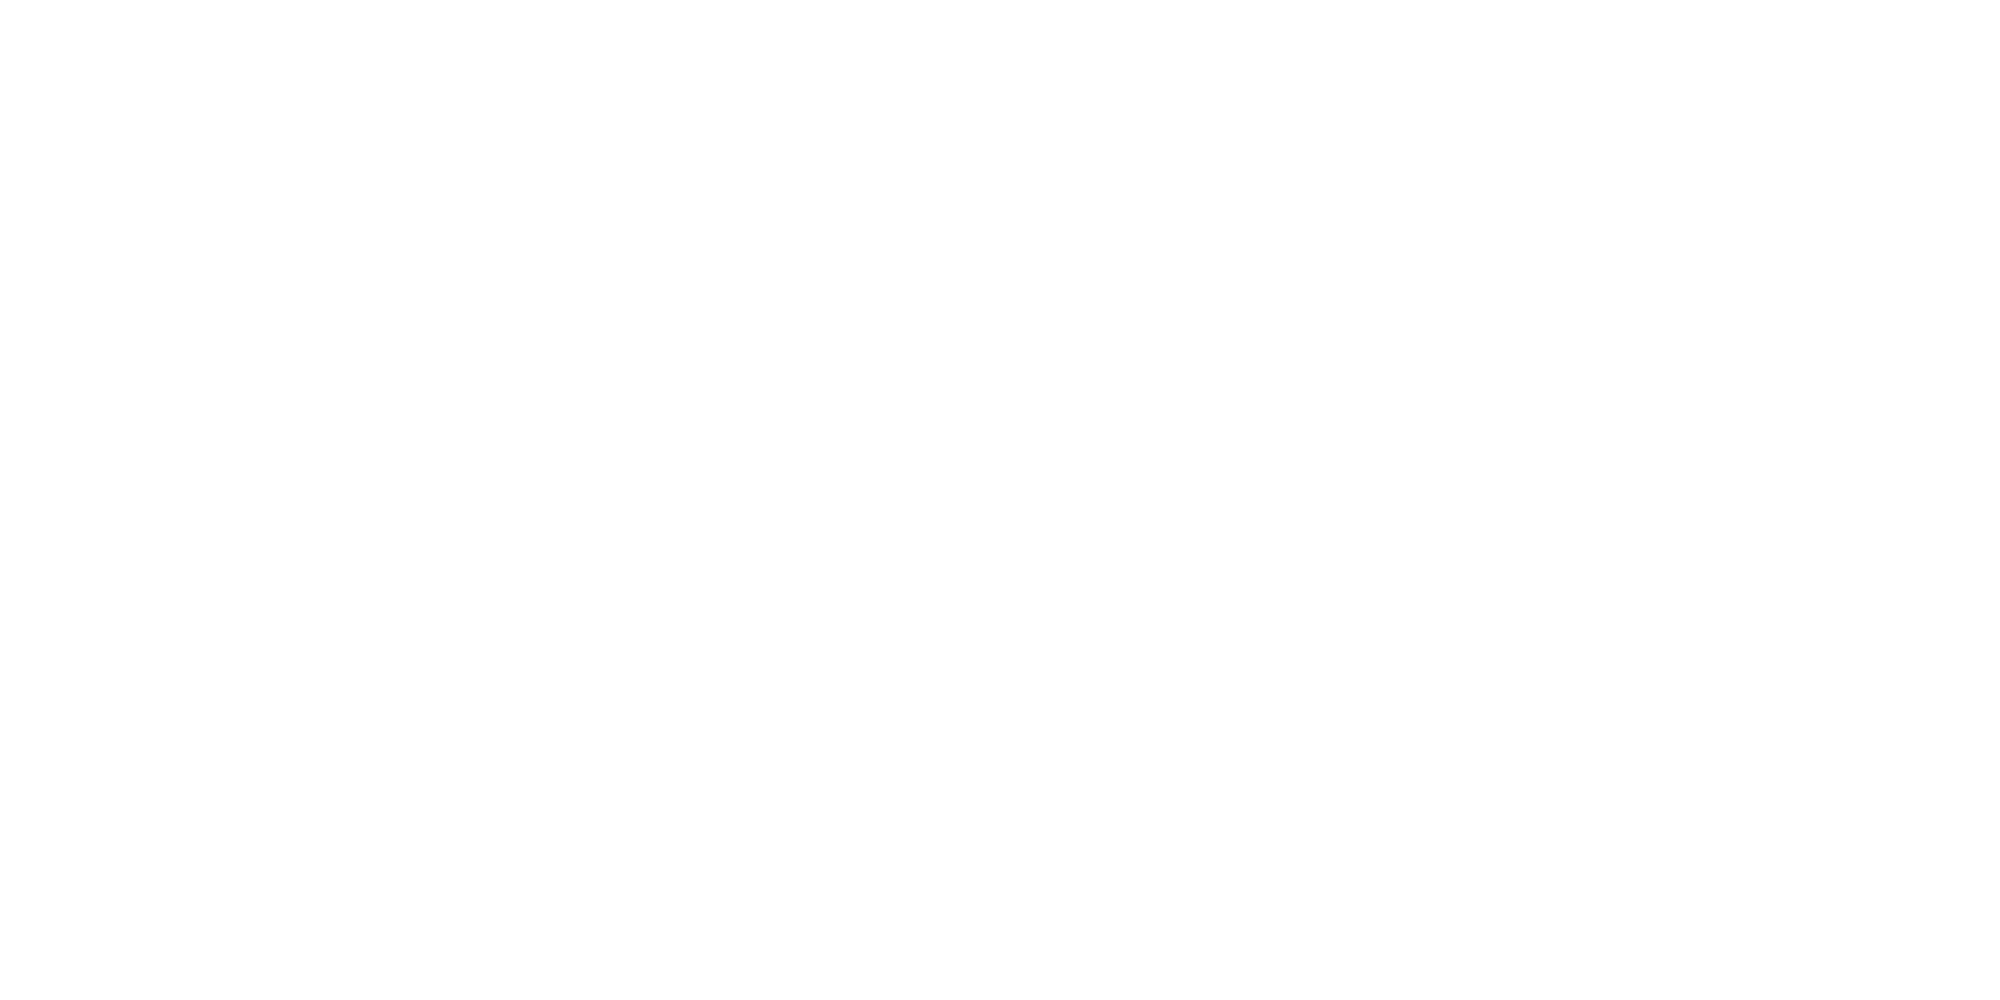

<IPython.core.display.Javascript object>


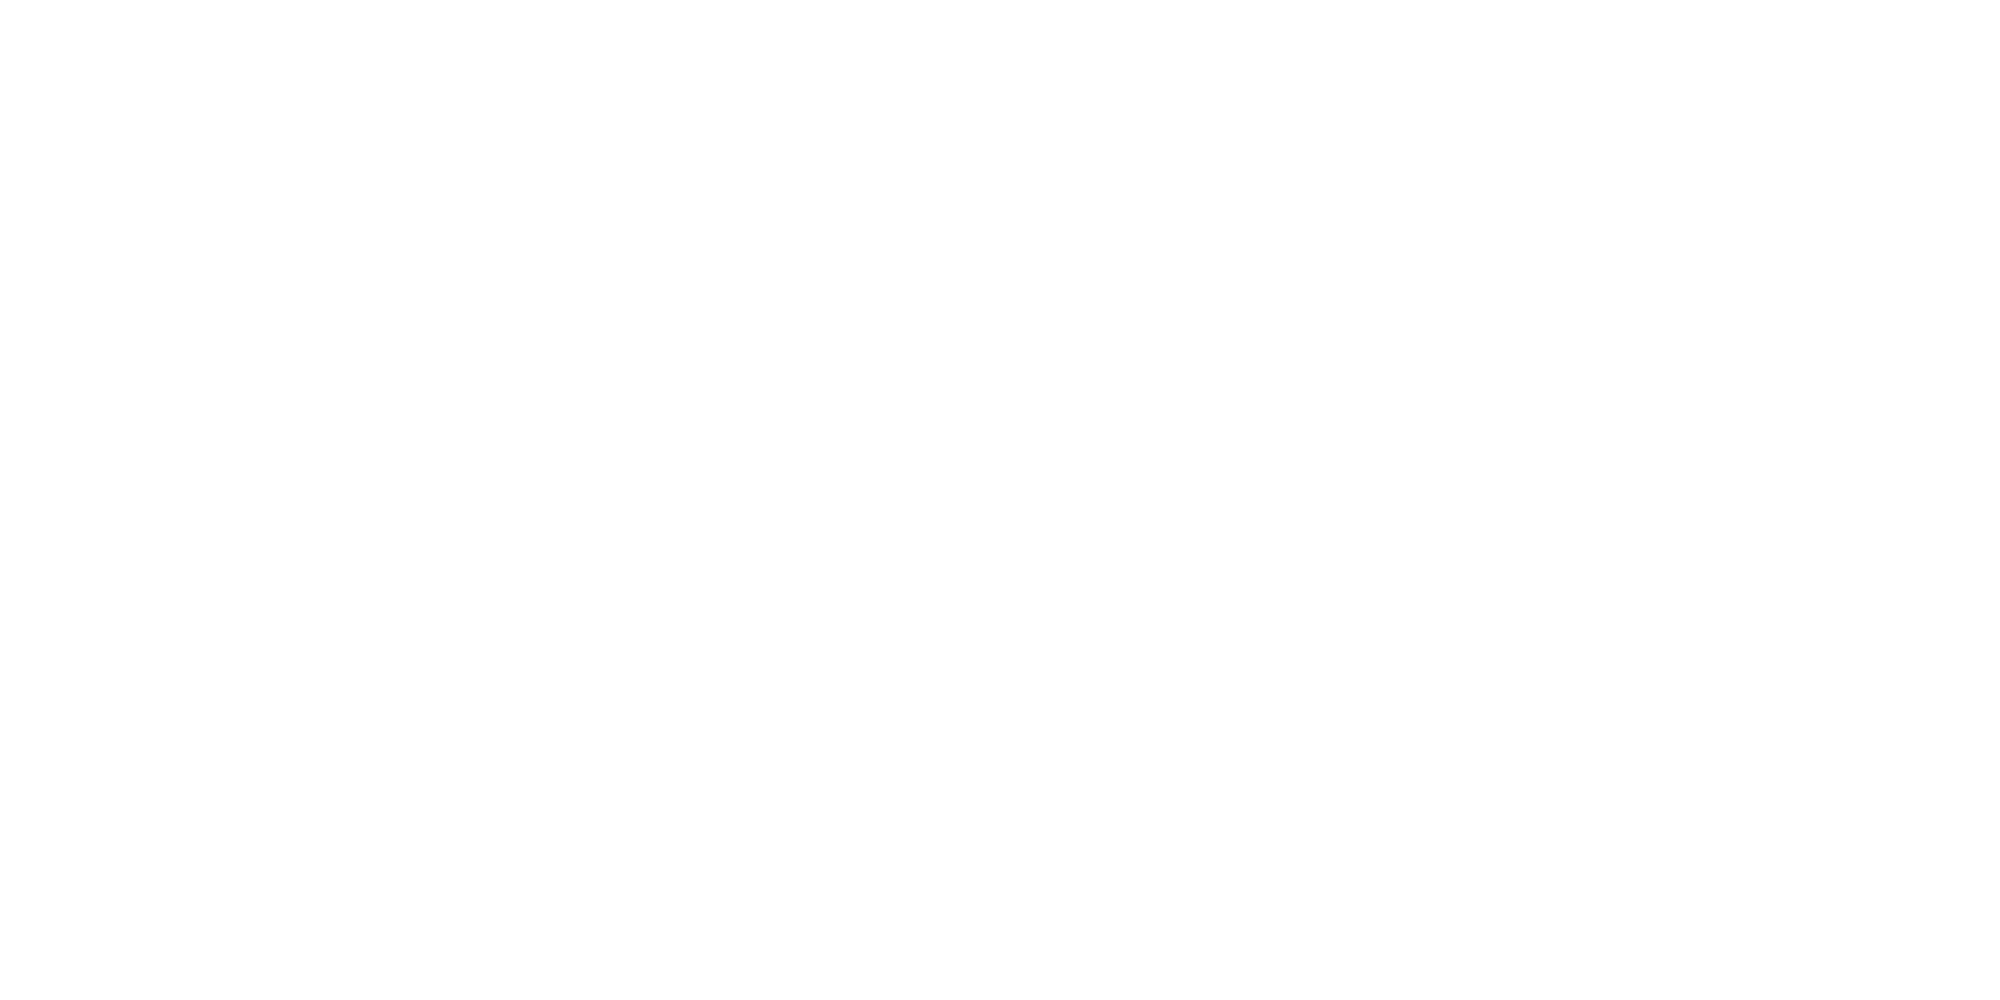

<IPython.core.display.Javascript object>


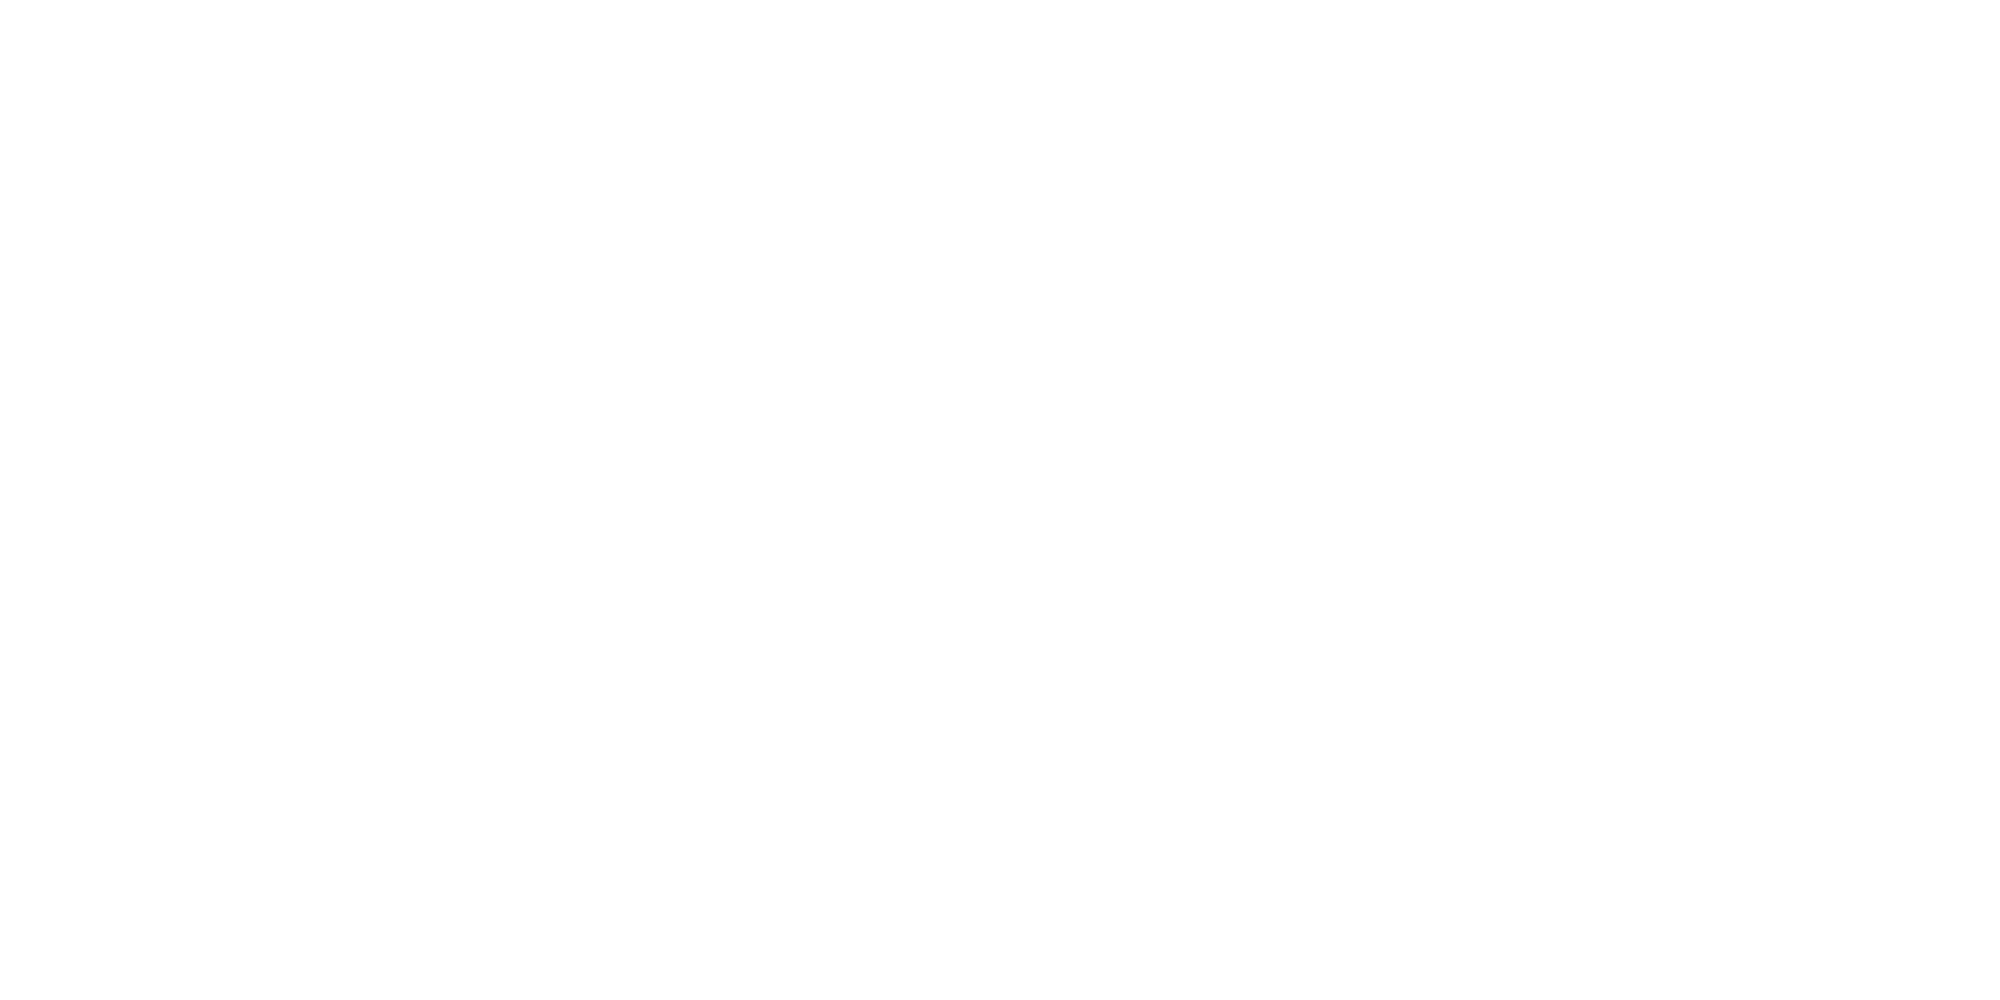

<IPython.core.display.Javascript object>


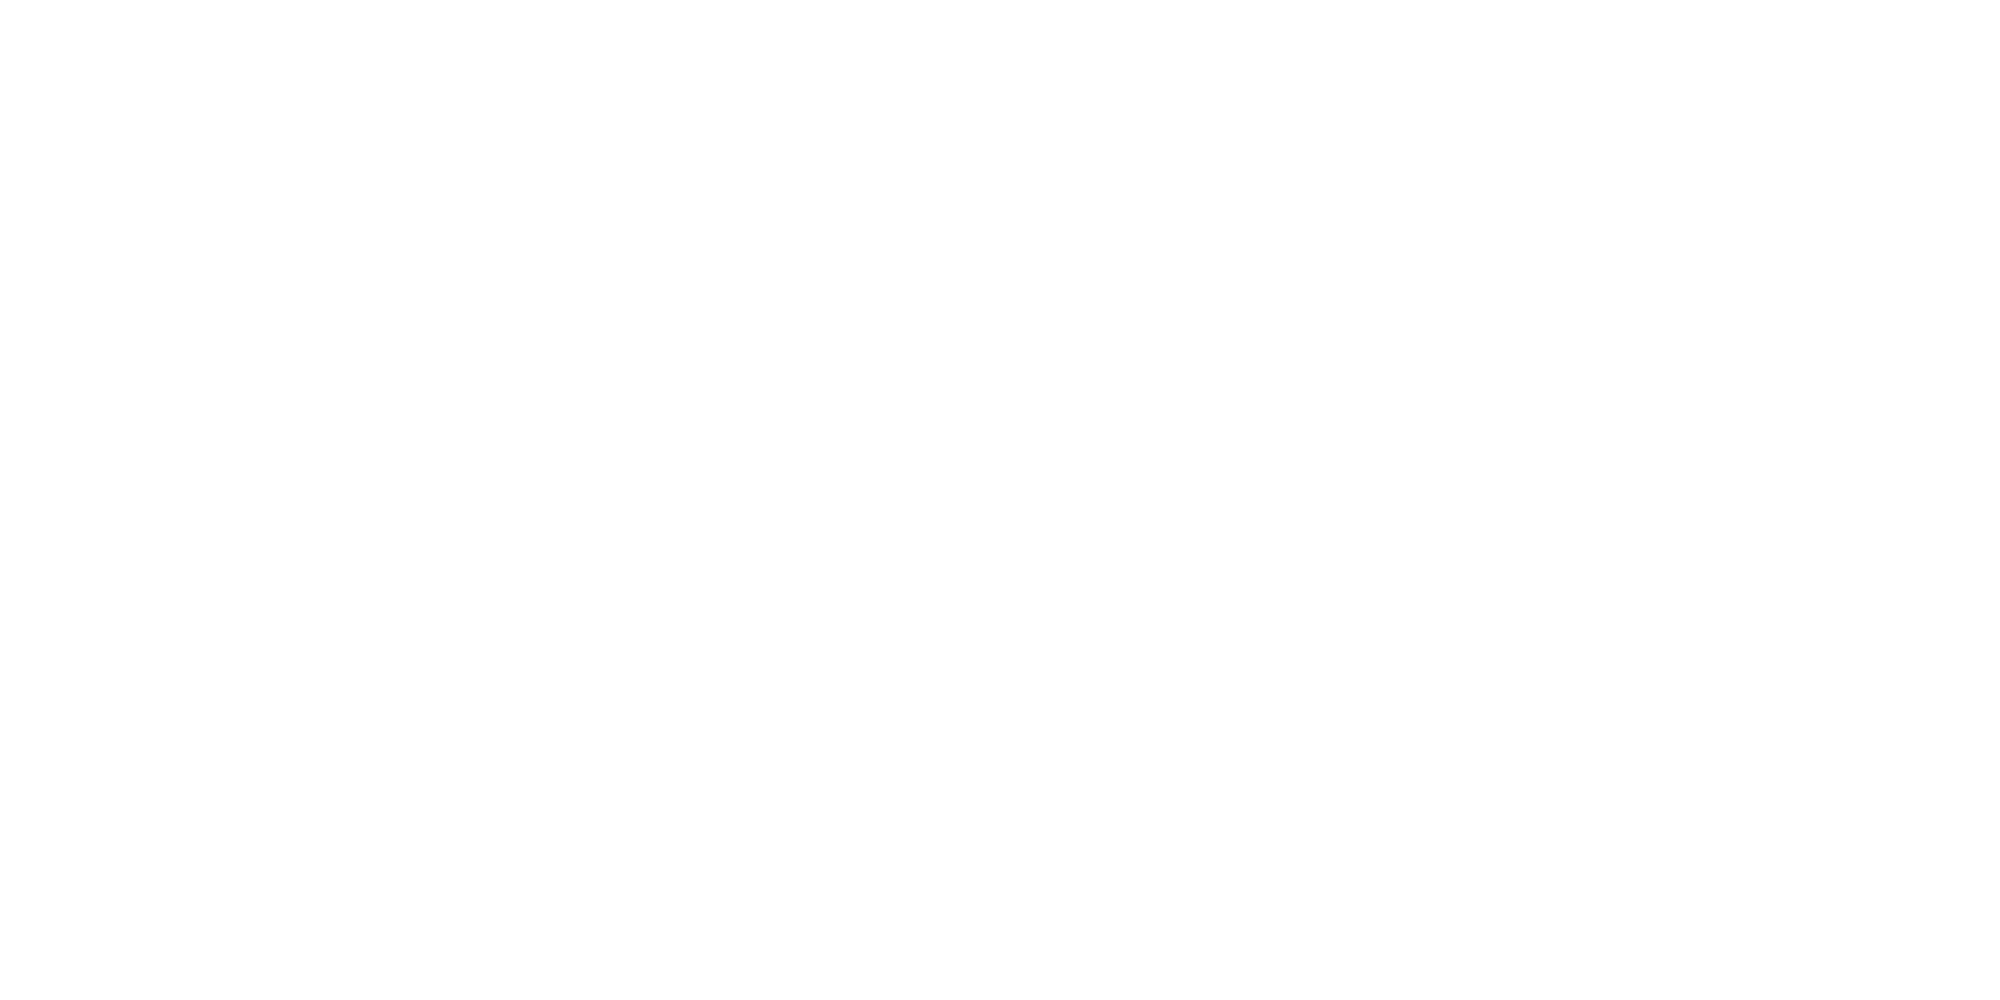

<IPython.core.display.Javascript object>


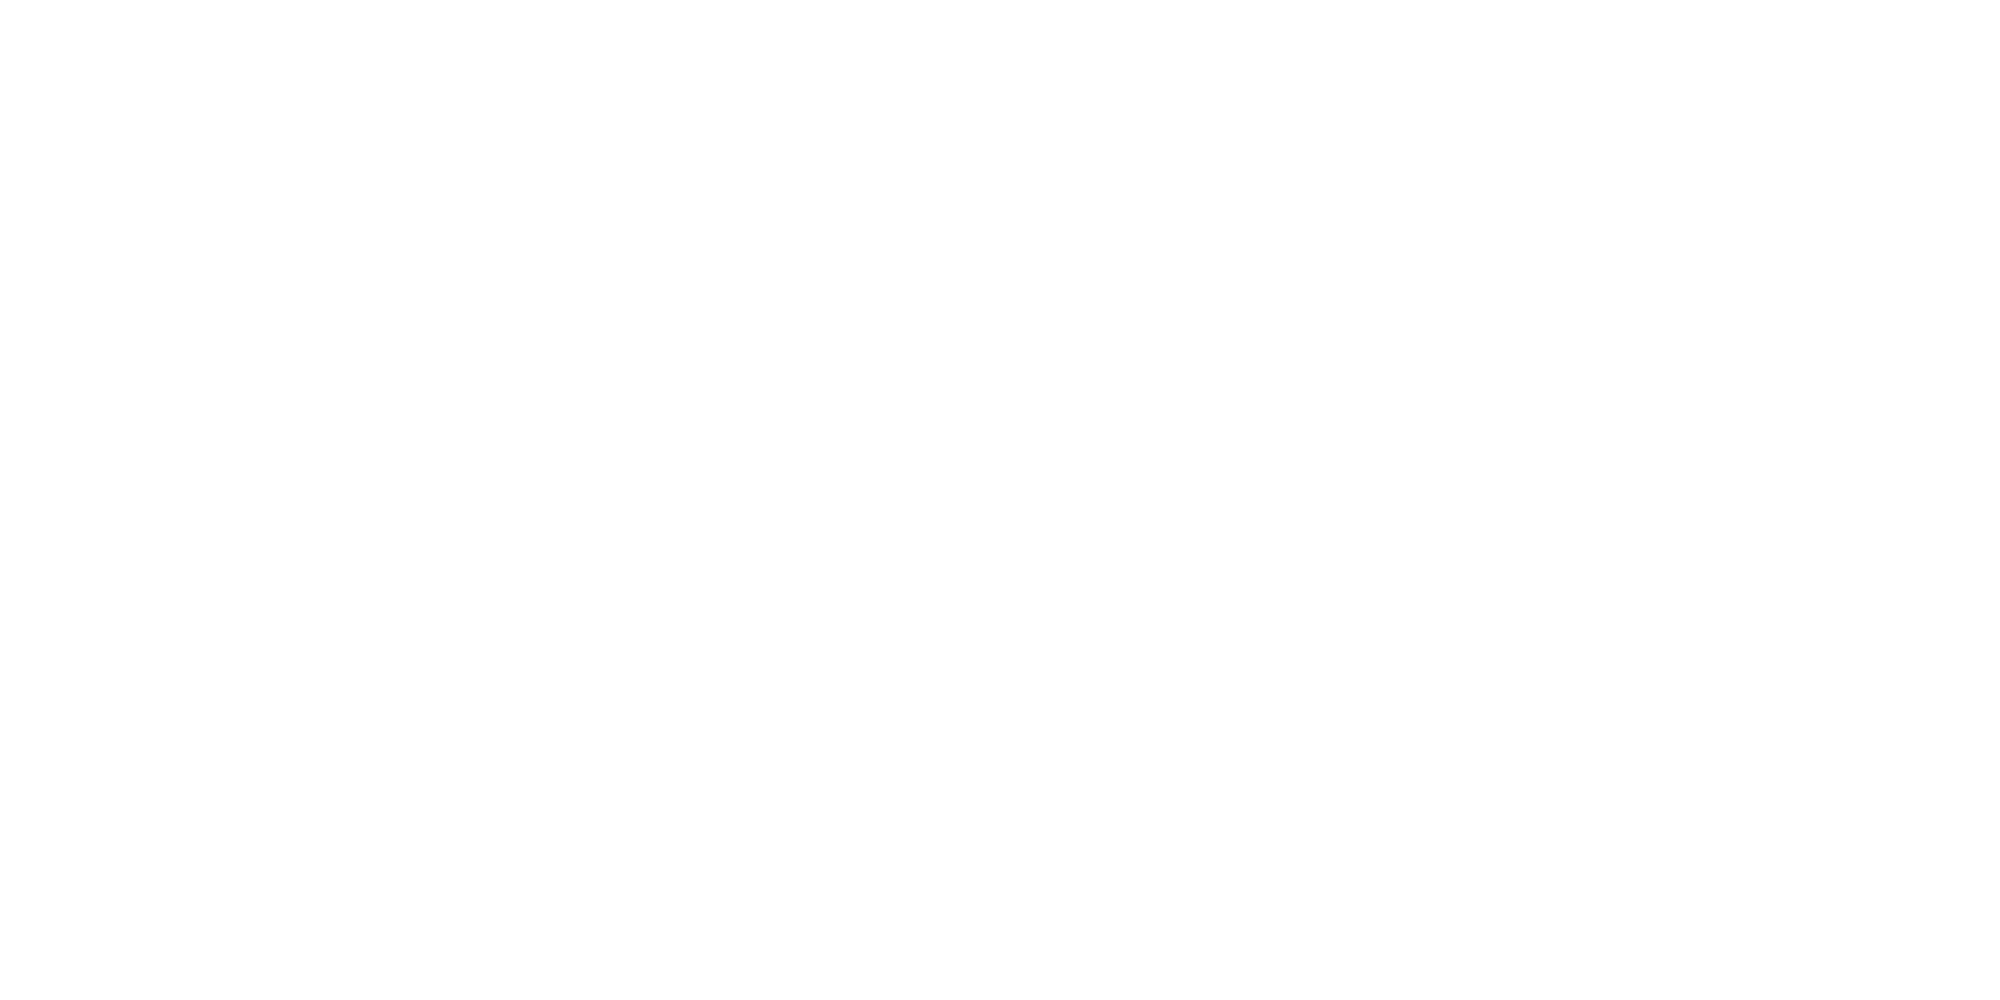

<IPython.core.display.Javascript object>


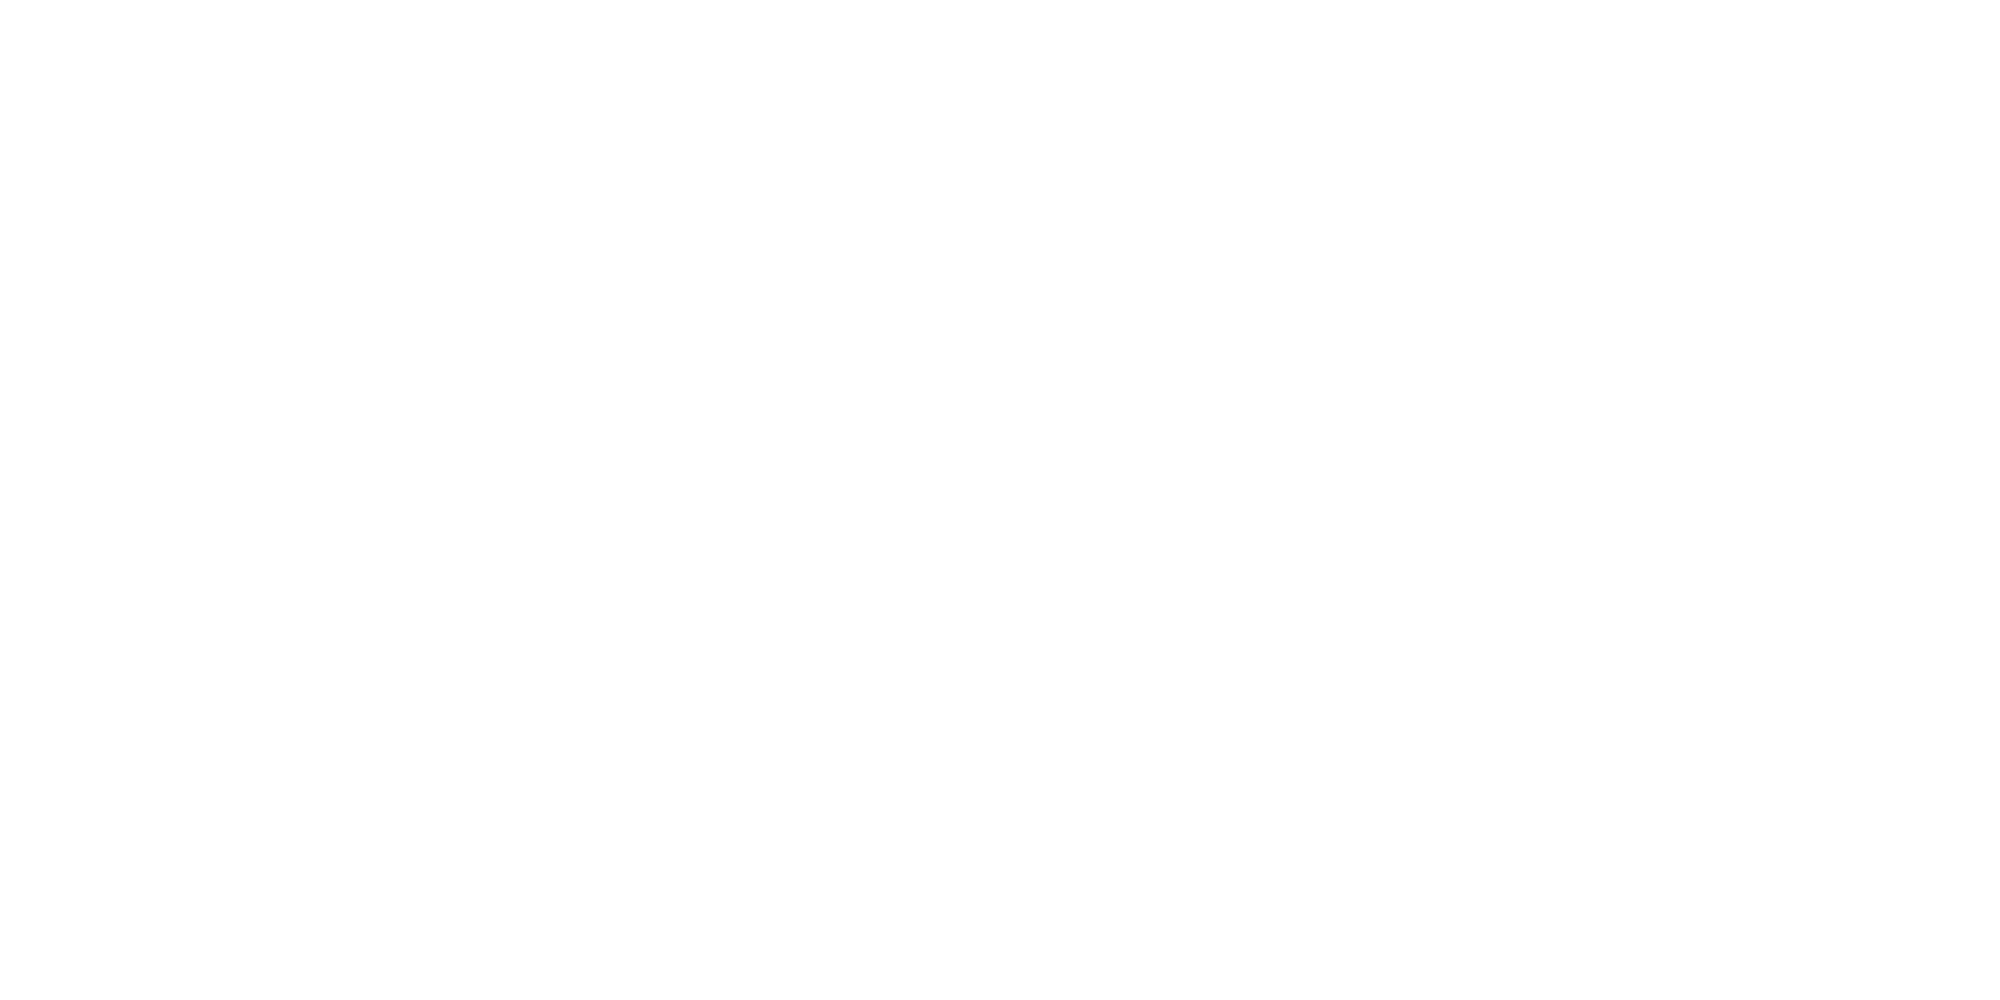

<IPython.core.display.Javascript object>


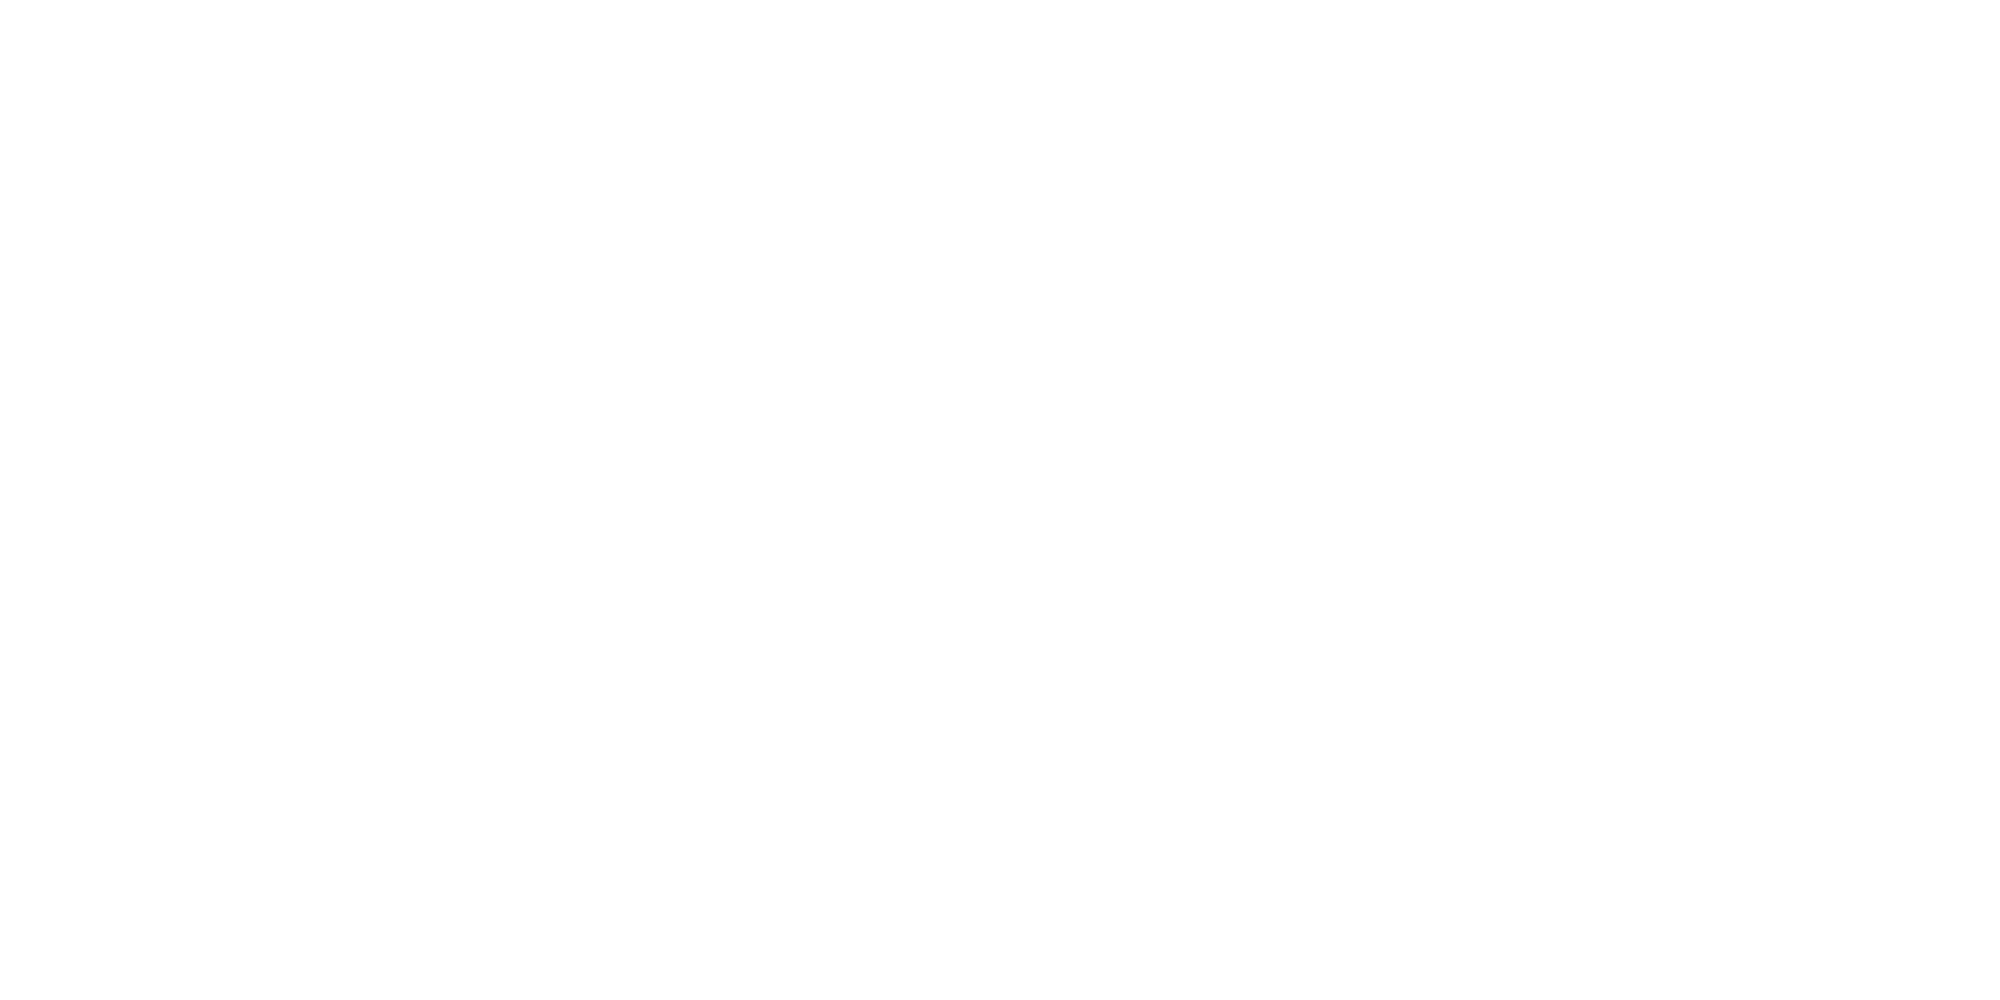

<IPython.core.display.Javascript object>


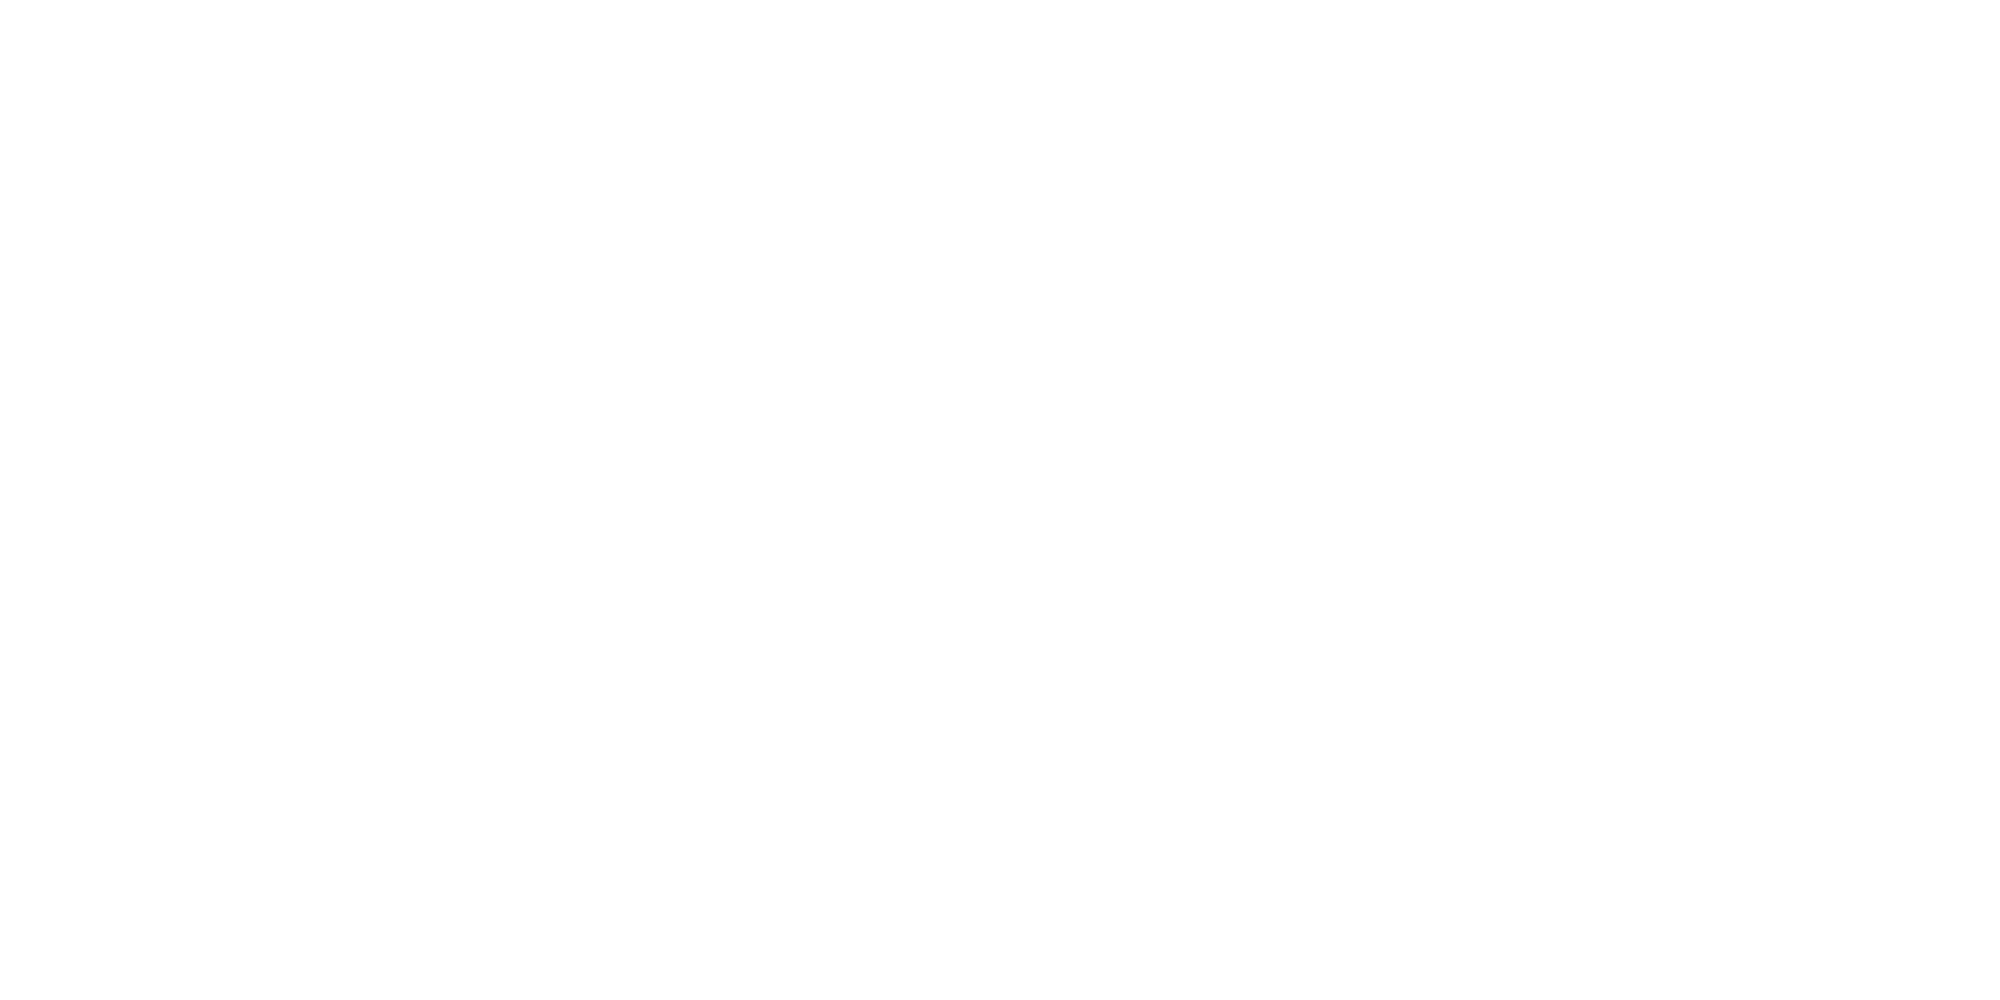

<IPython.core.display.Javascript object>


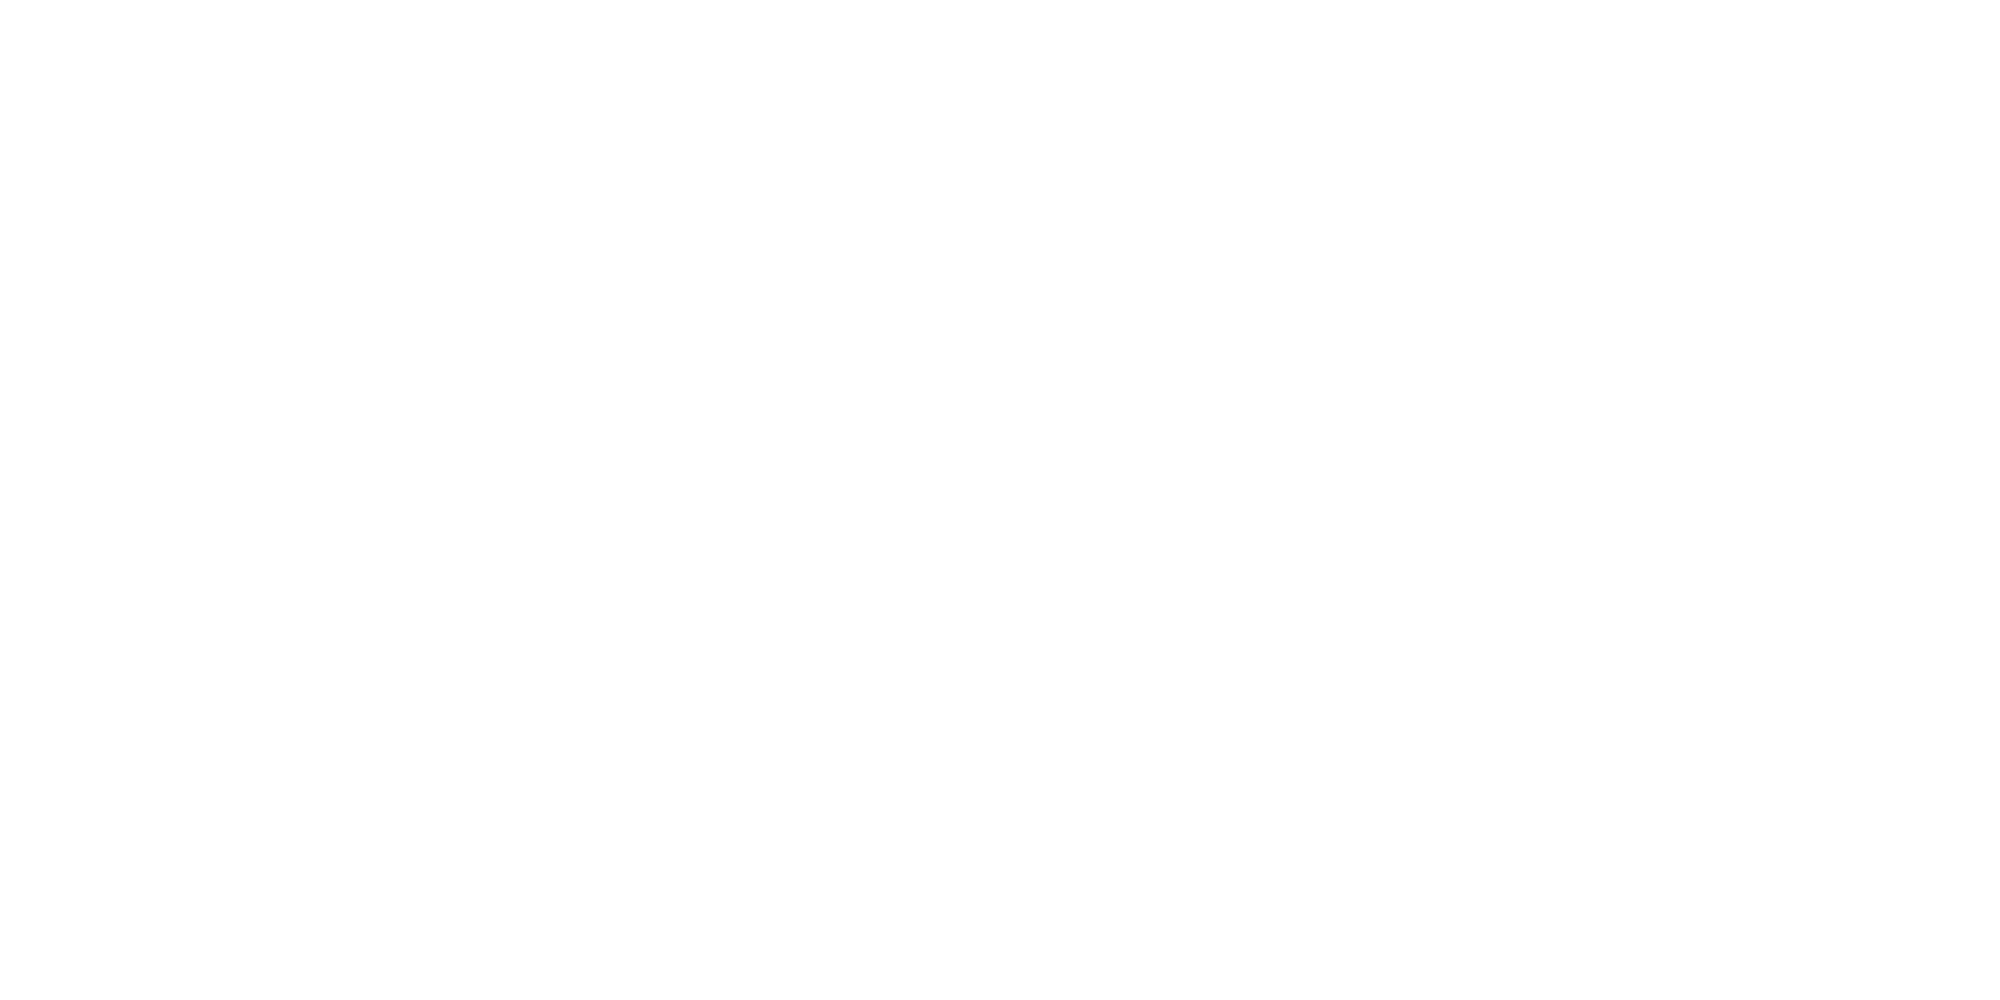

<IPython.core.display.Javascript object>


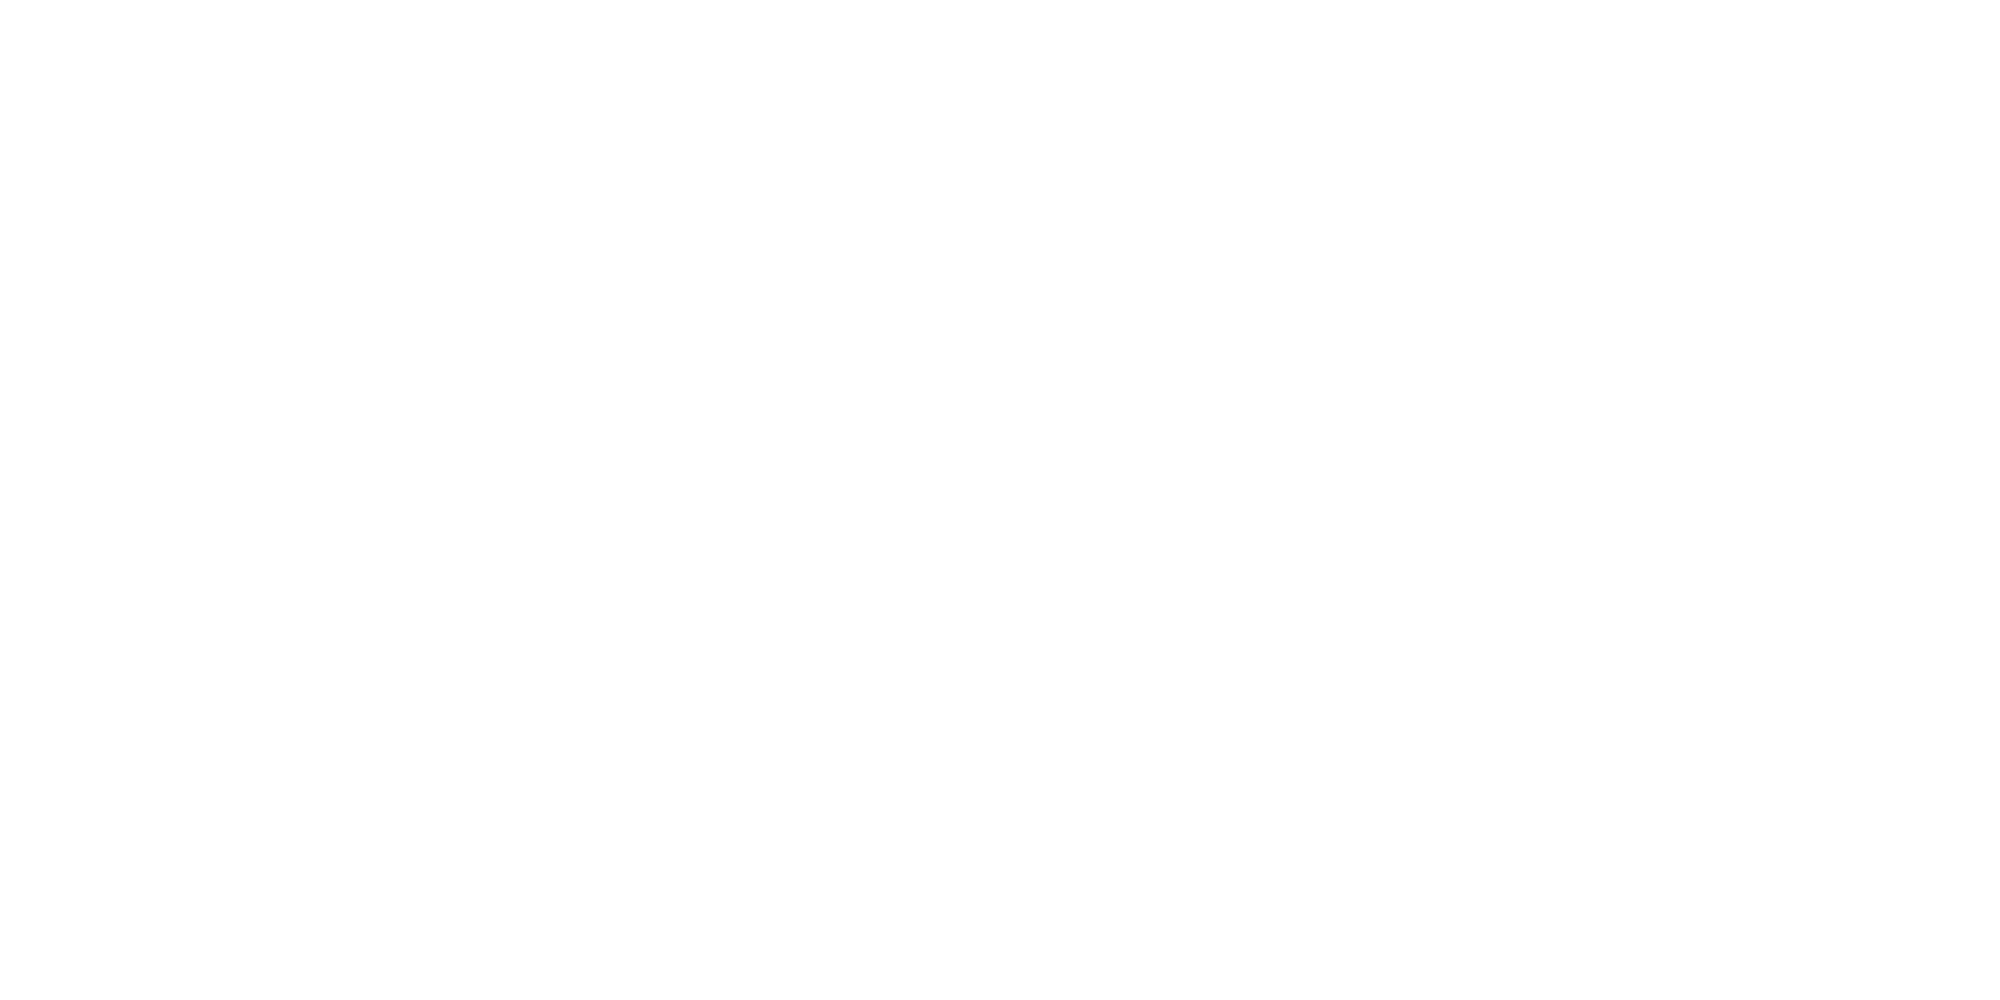

<IPython.core.display.Javascript object>


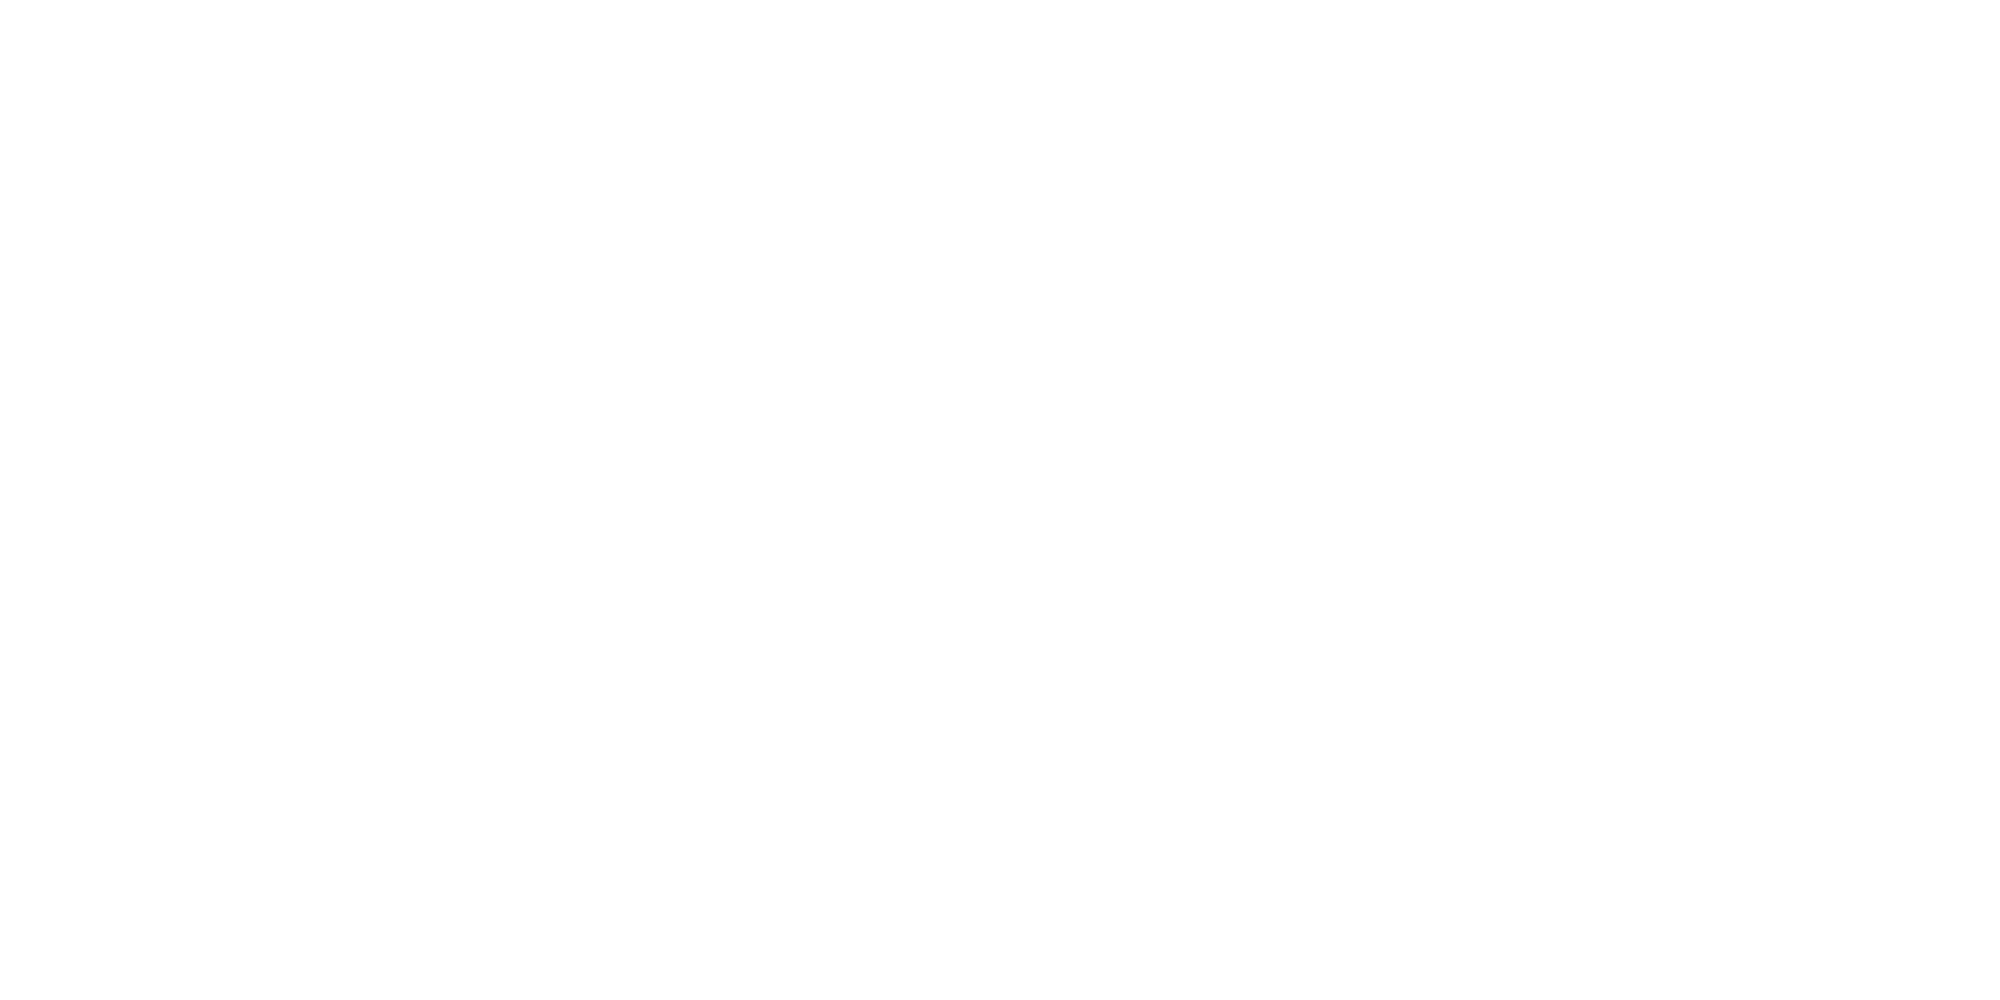

<IPython.core.display.Javascript object>


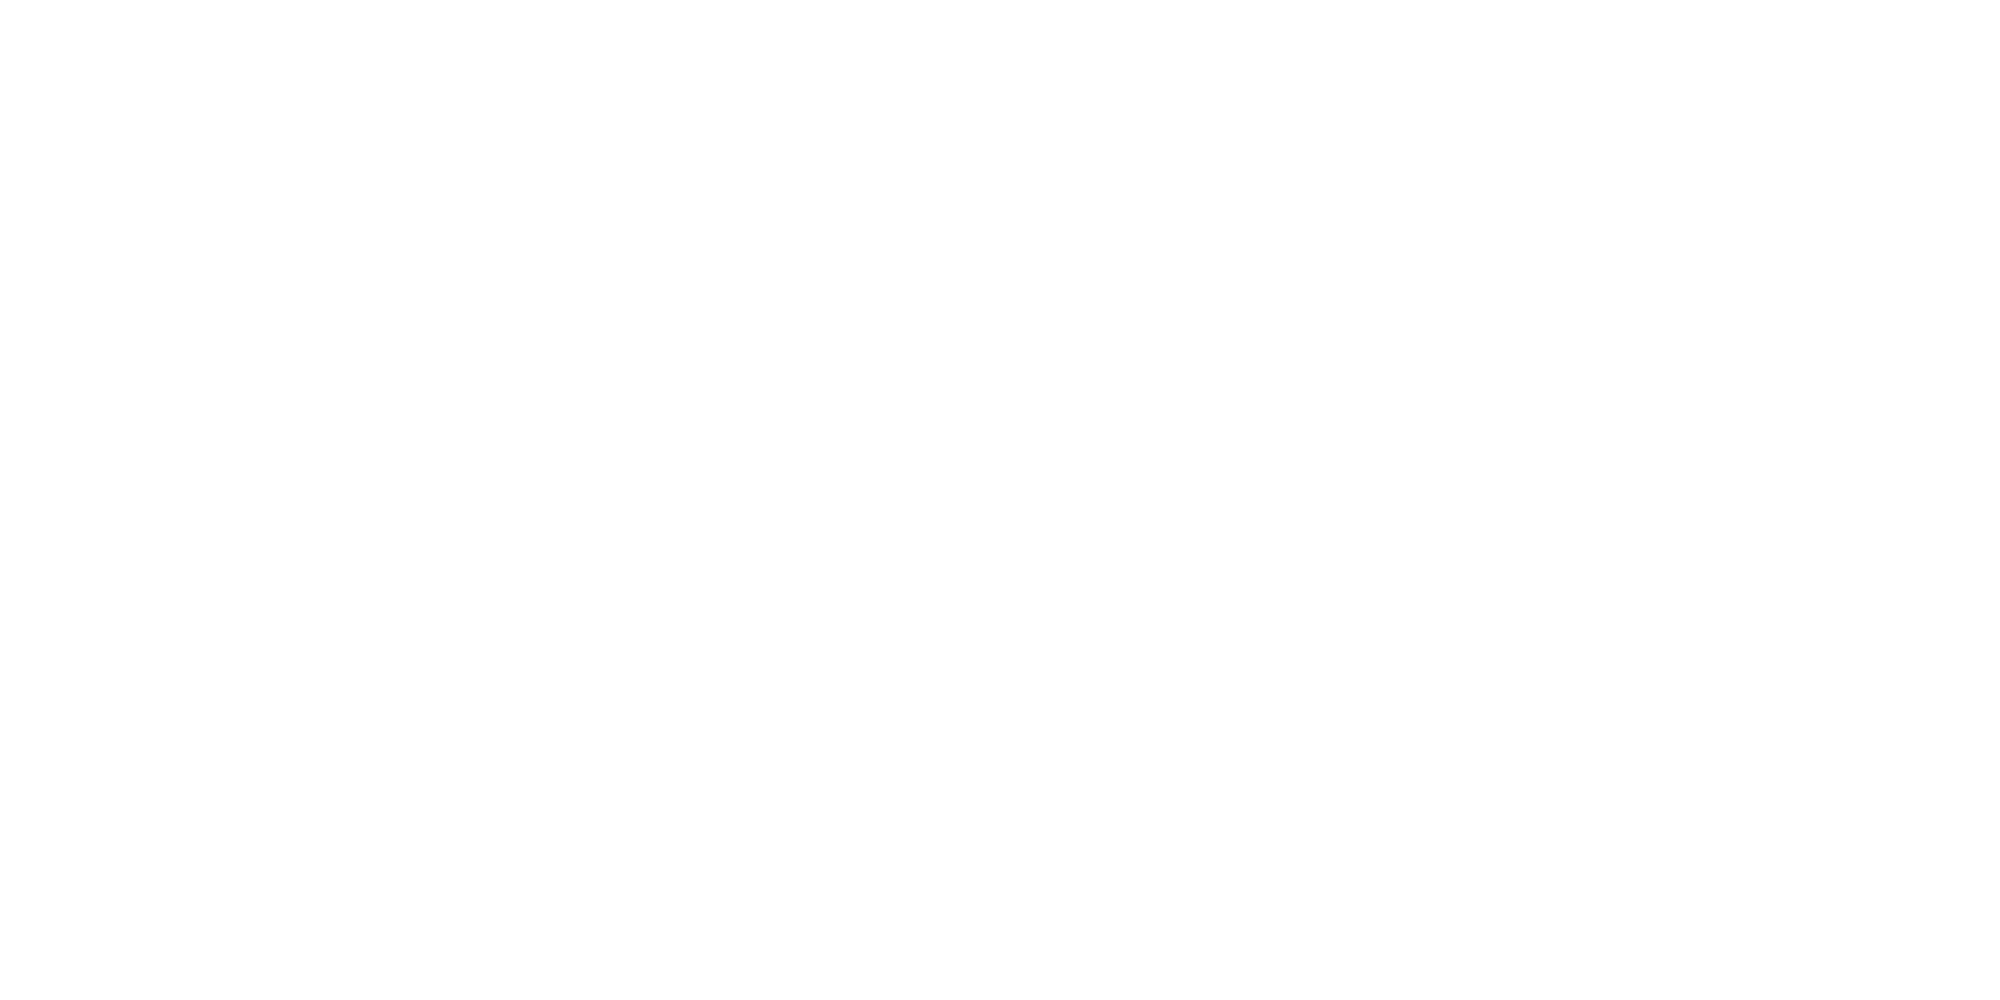

<IPython.core.display.Javascript object>


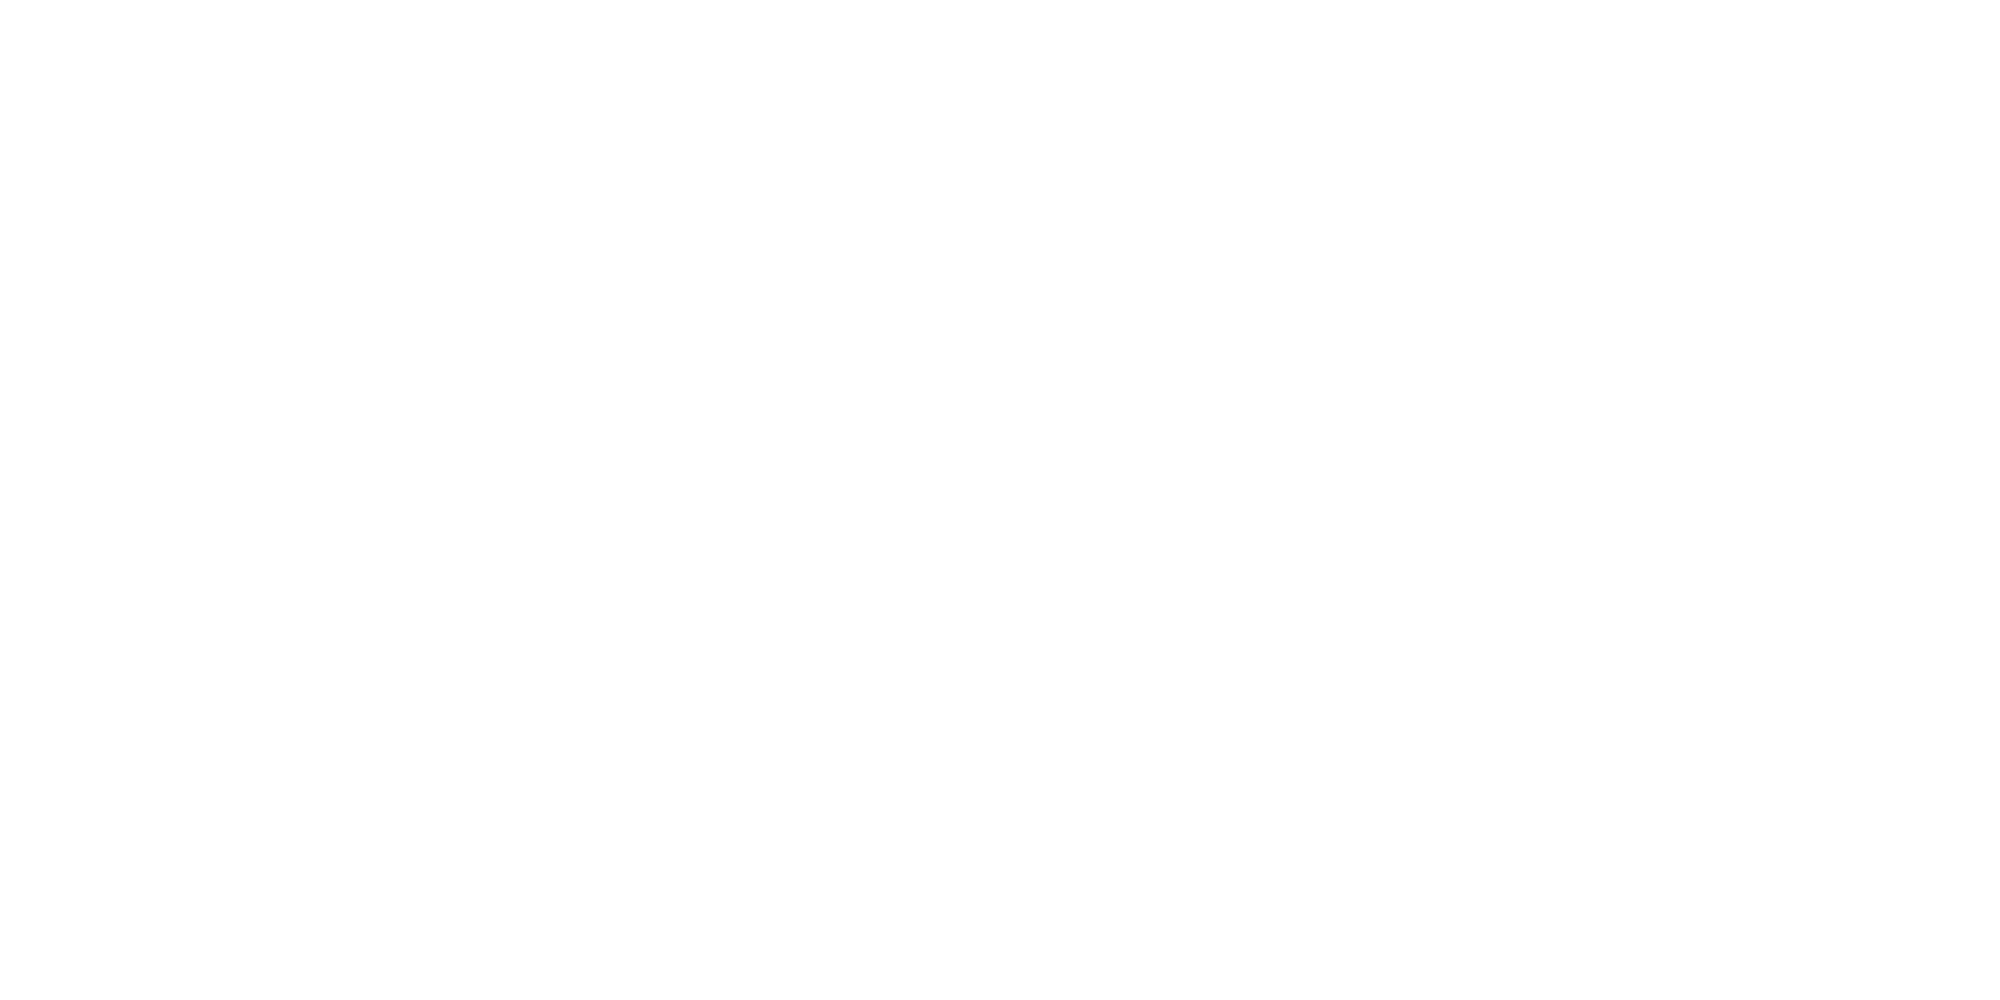

<IPython.core.display.Javascript object>


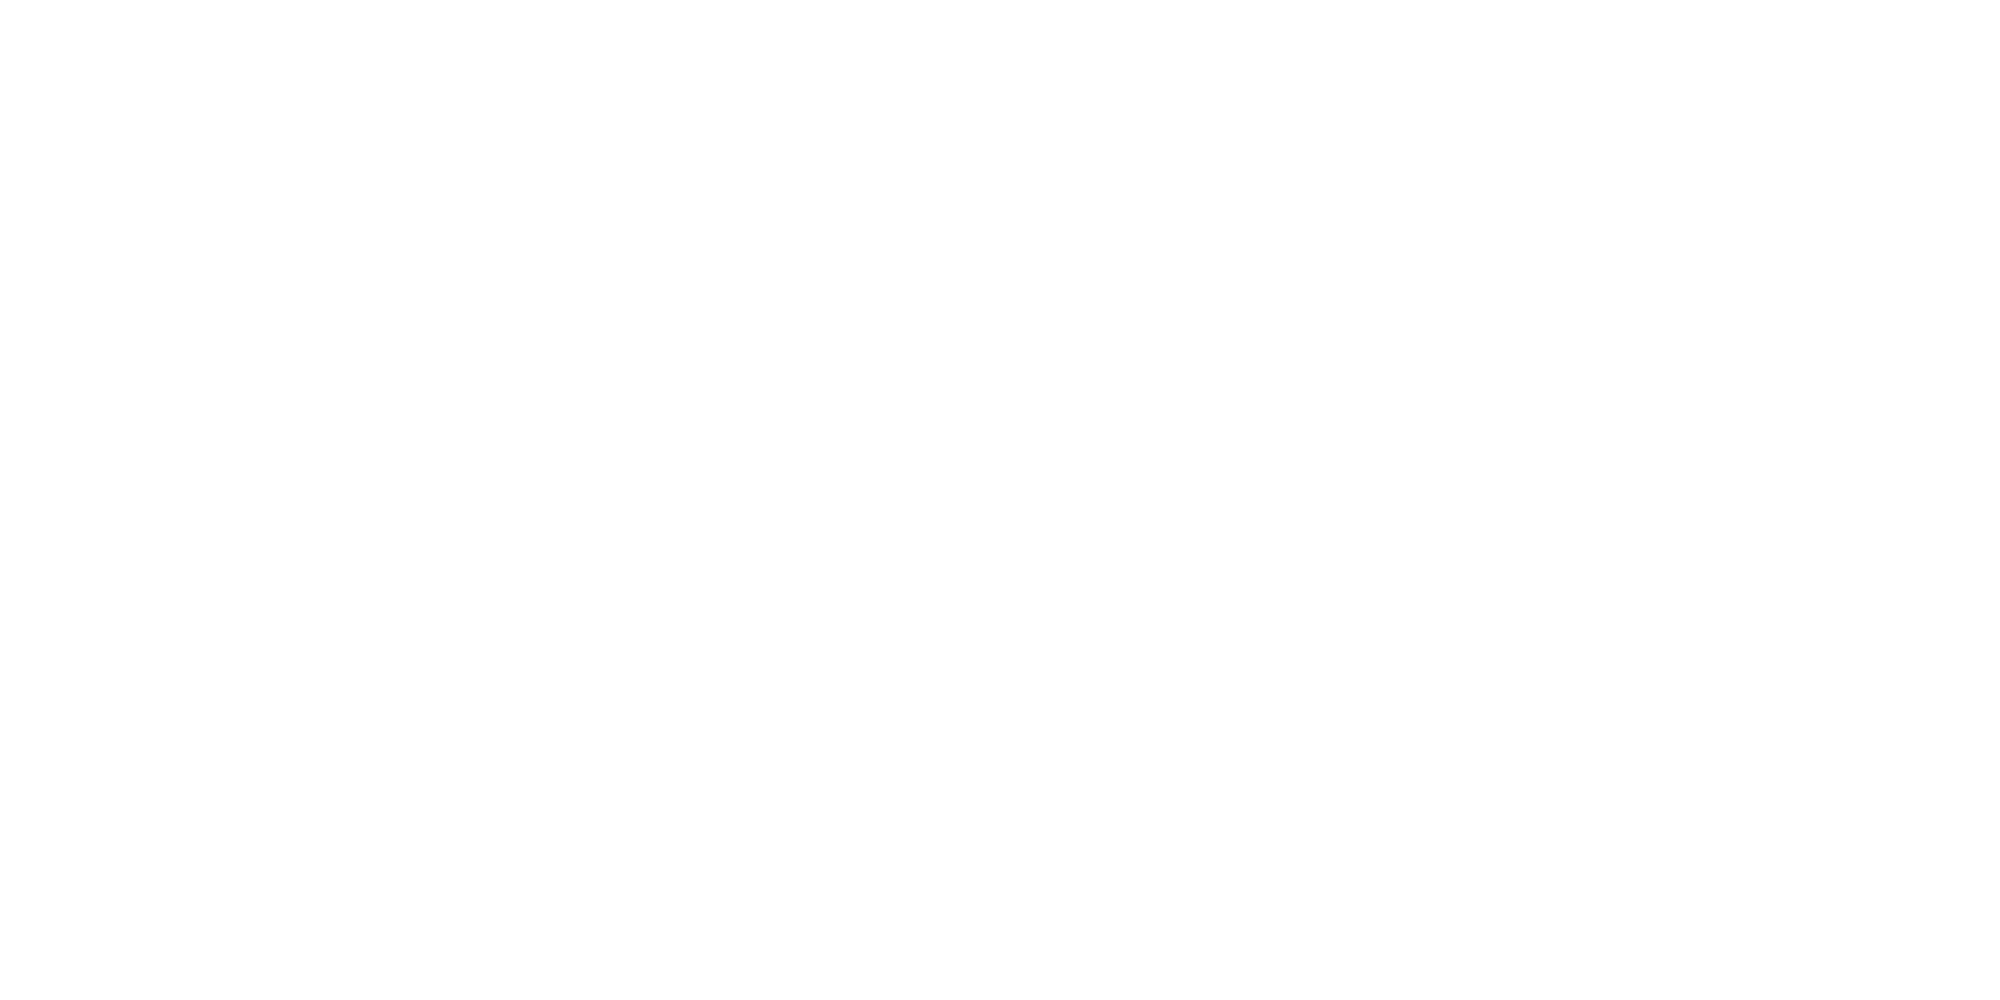

<IPython.core.display.Javascript object>


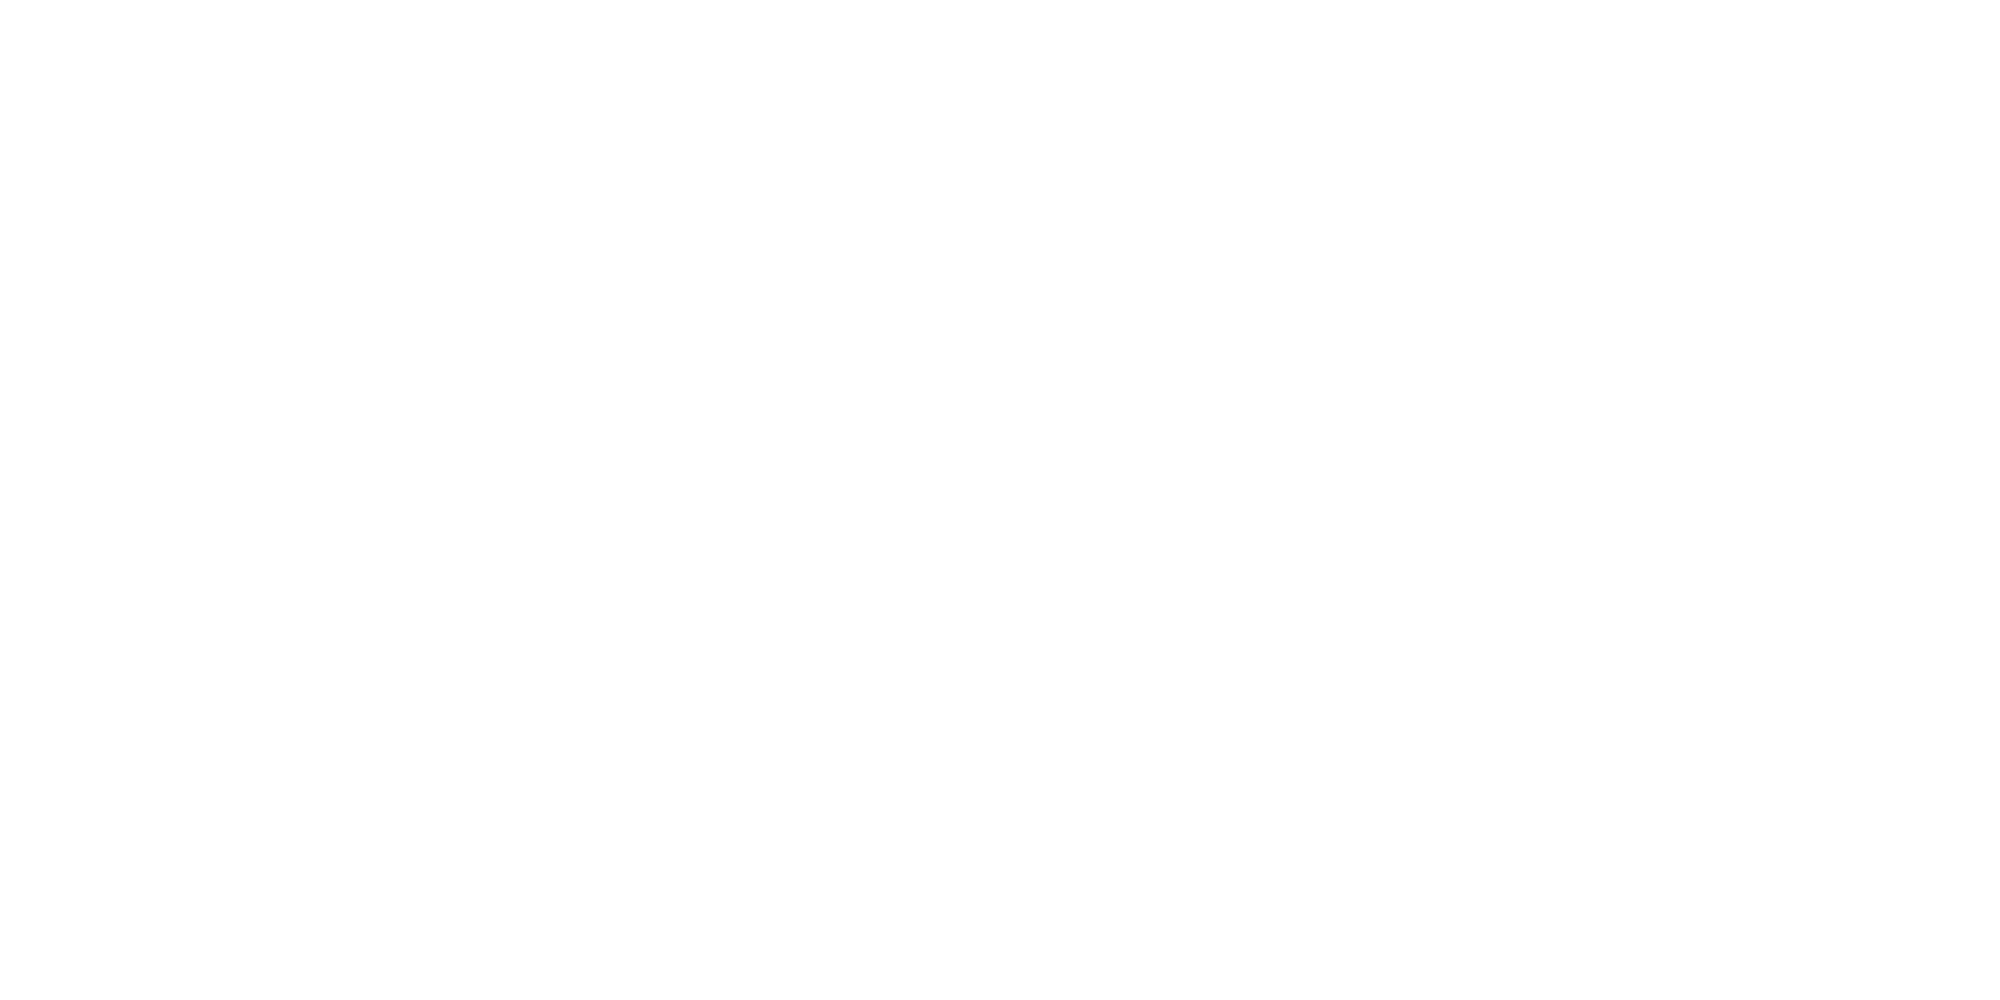

<IPython.core.display.Javascript object>


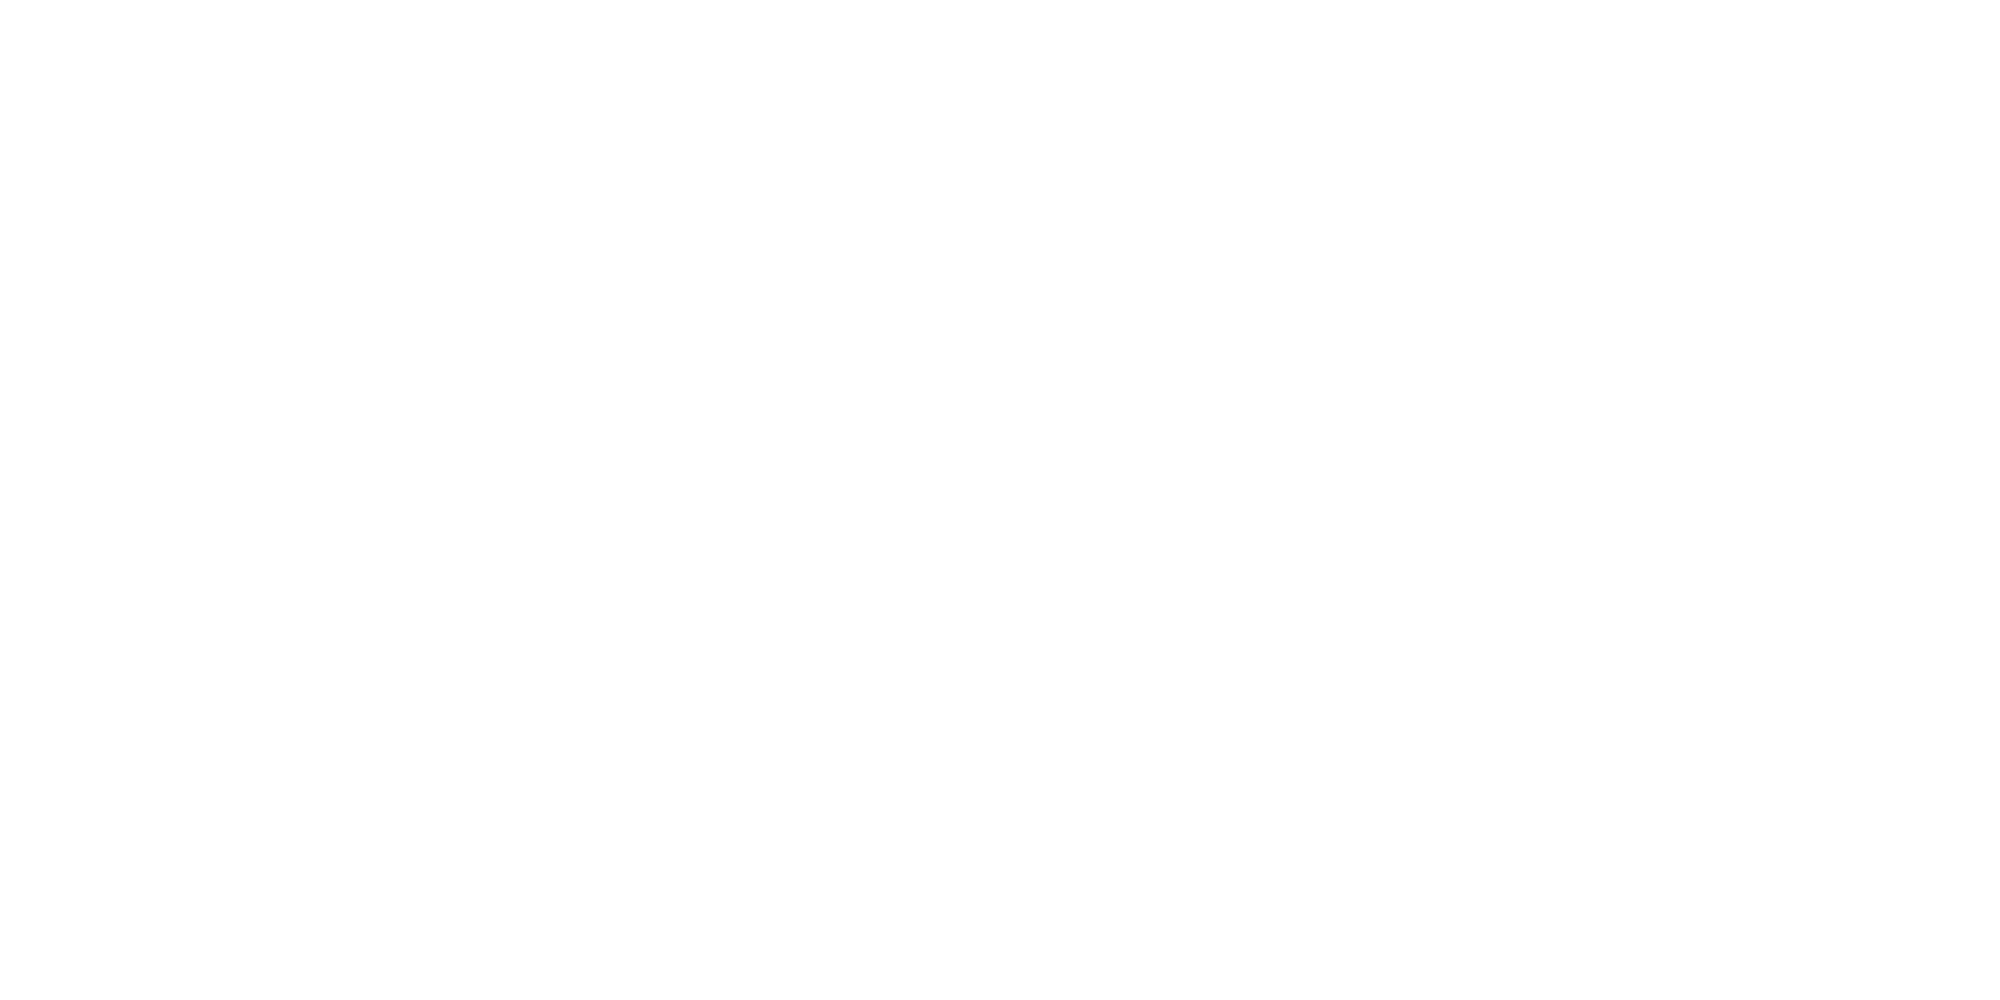

<IPython.core.display.Javascript object>


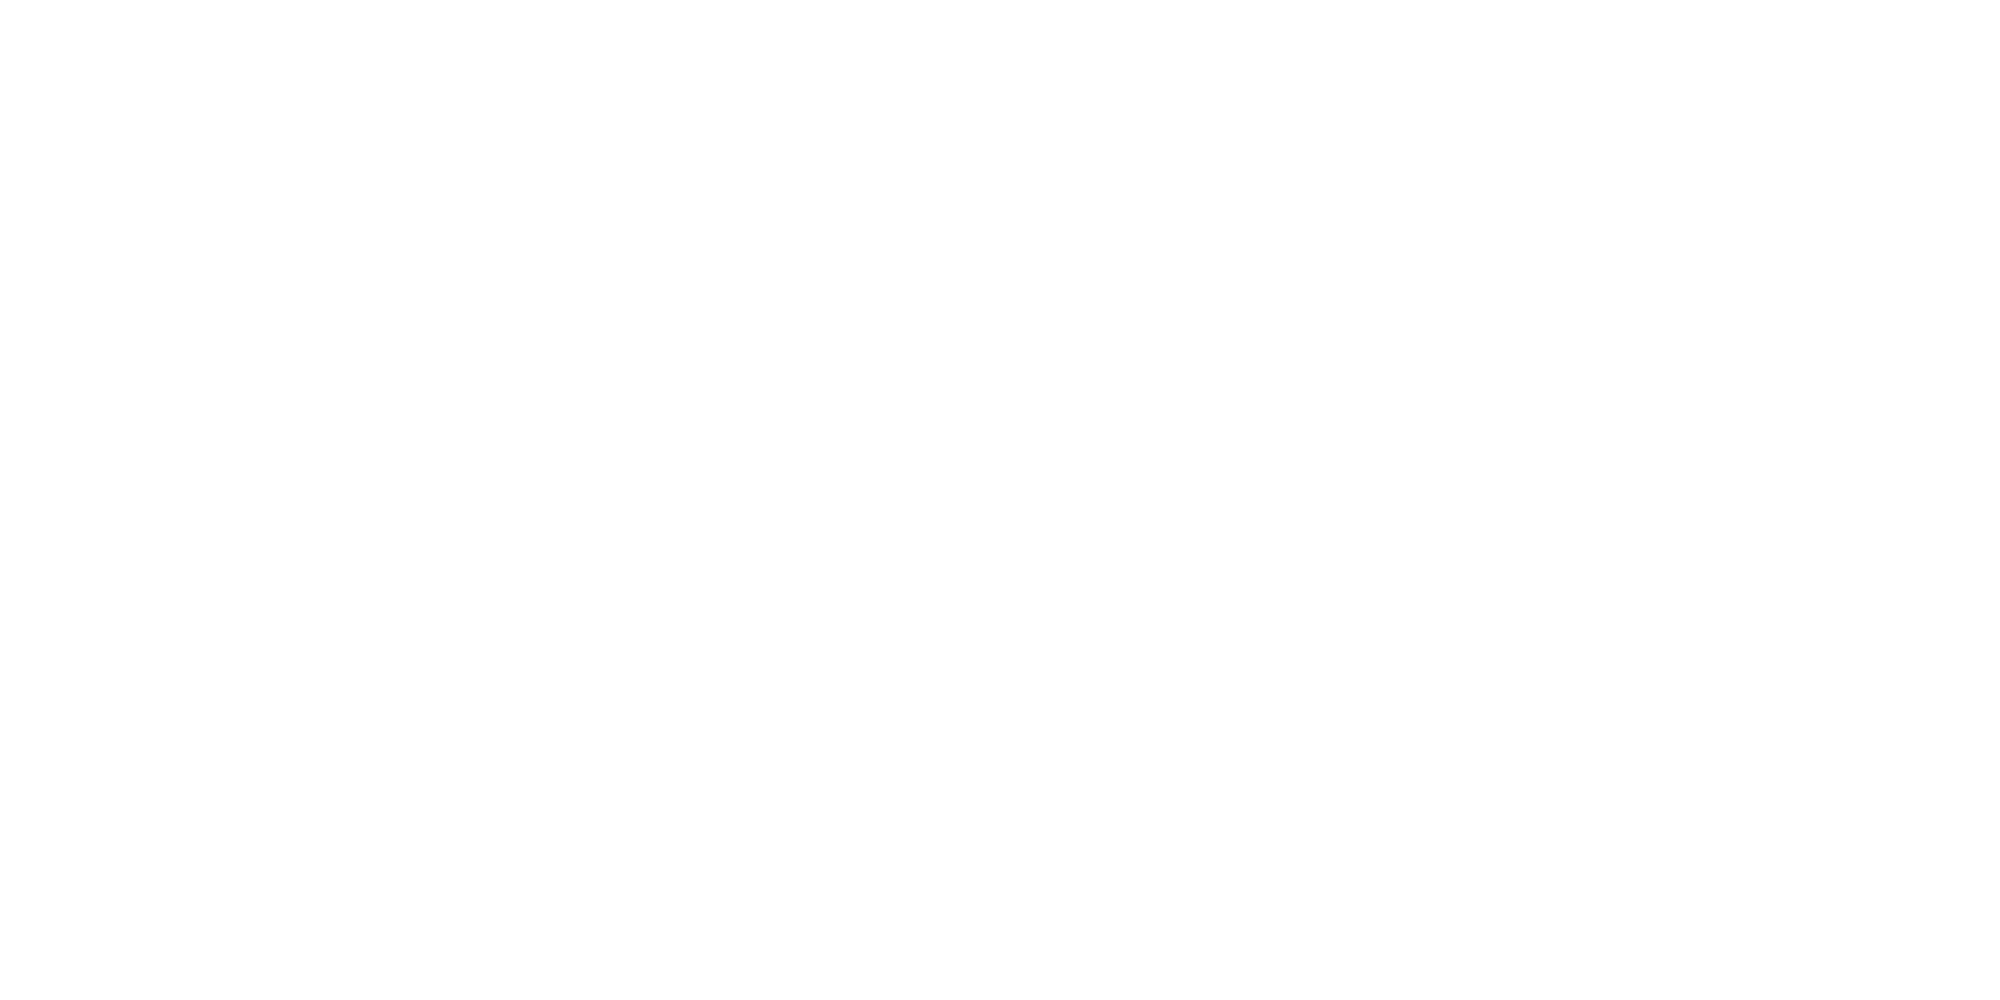

<IPython.core.display.Javascript object>


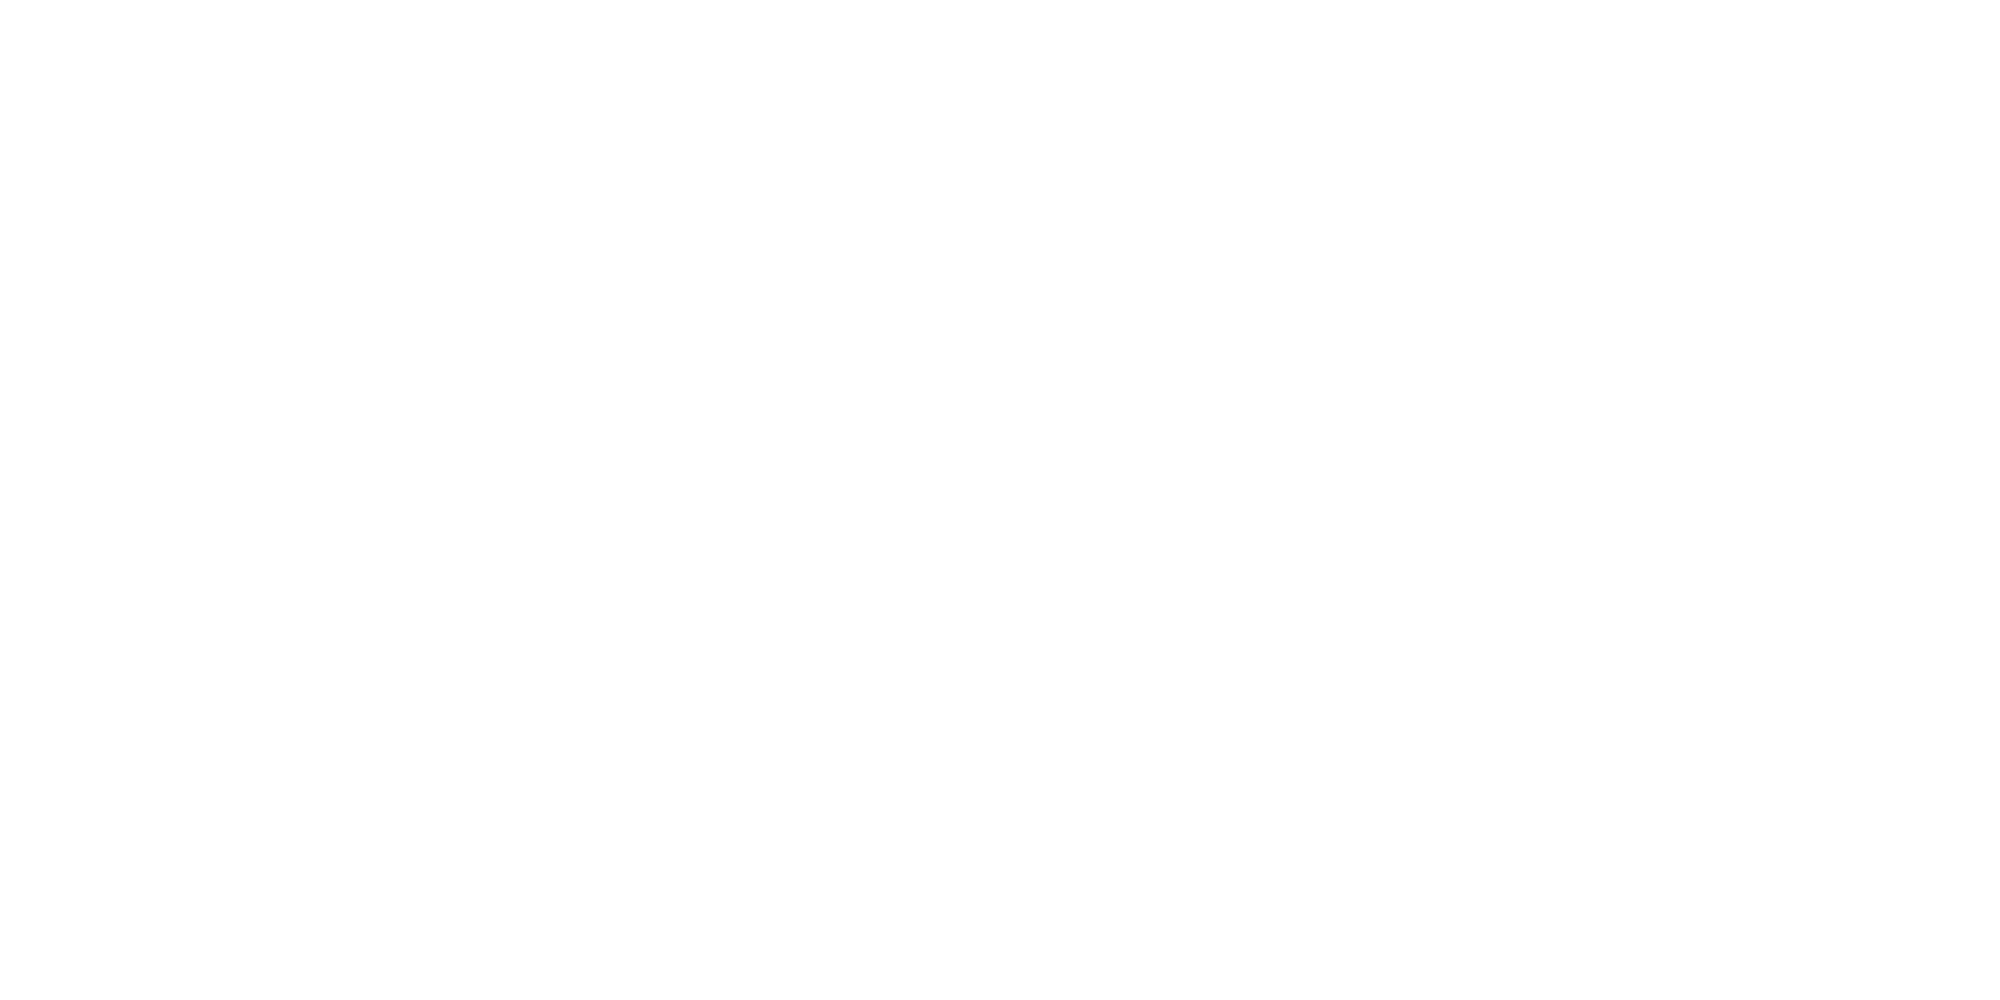

<IPython.core.display.Javascript object>


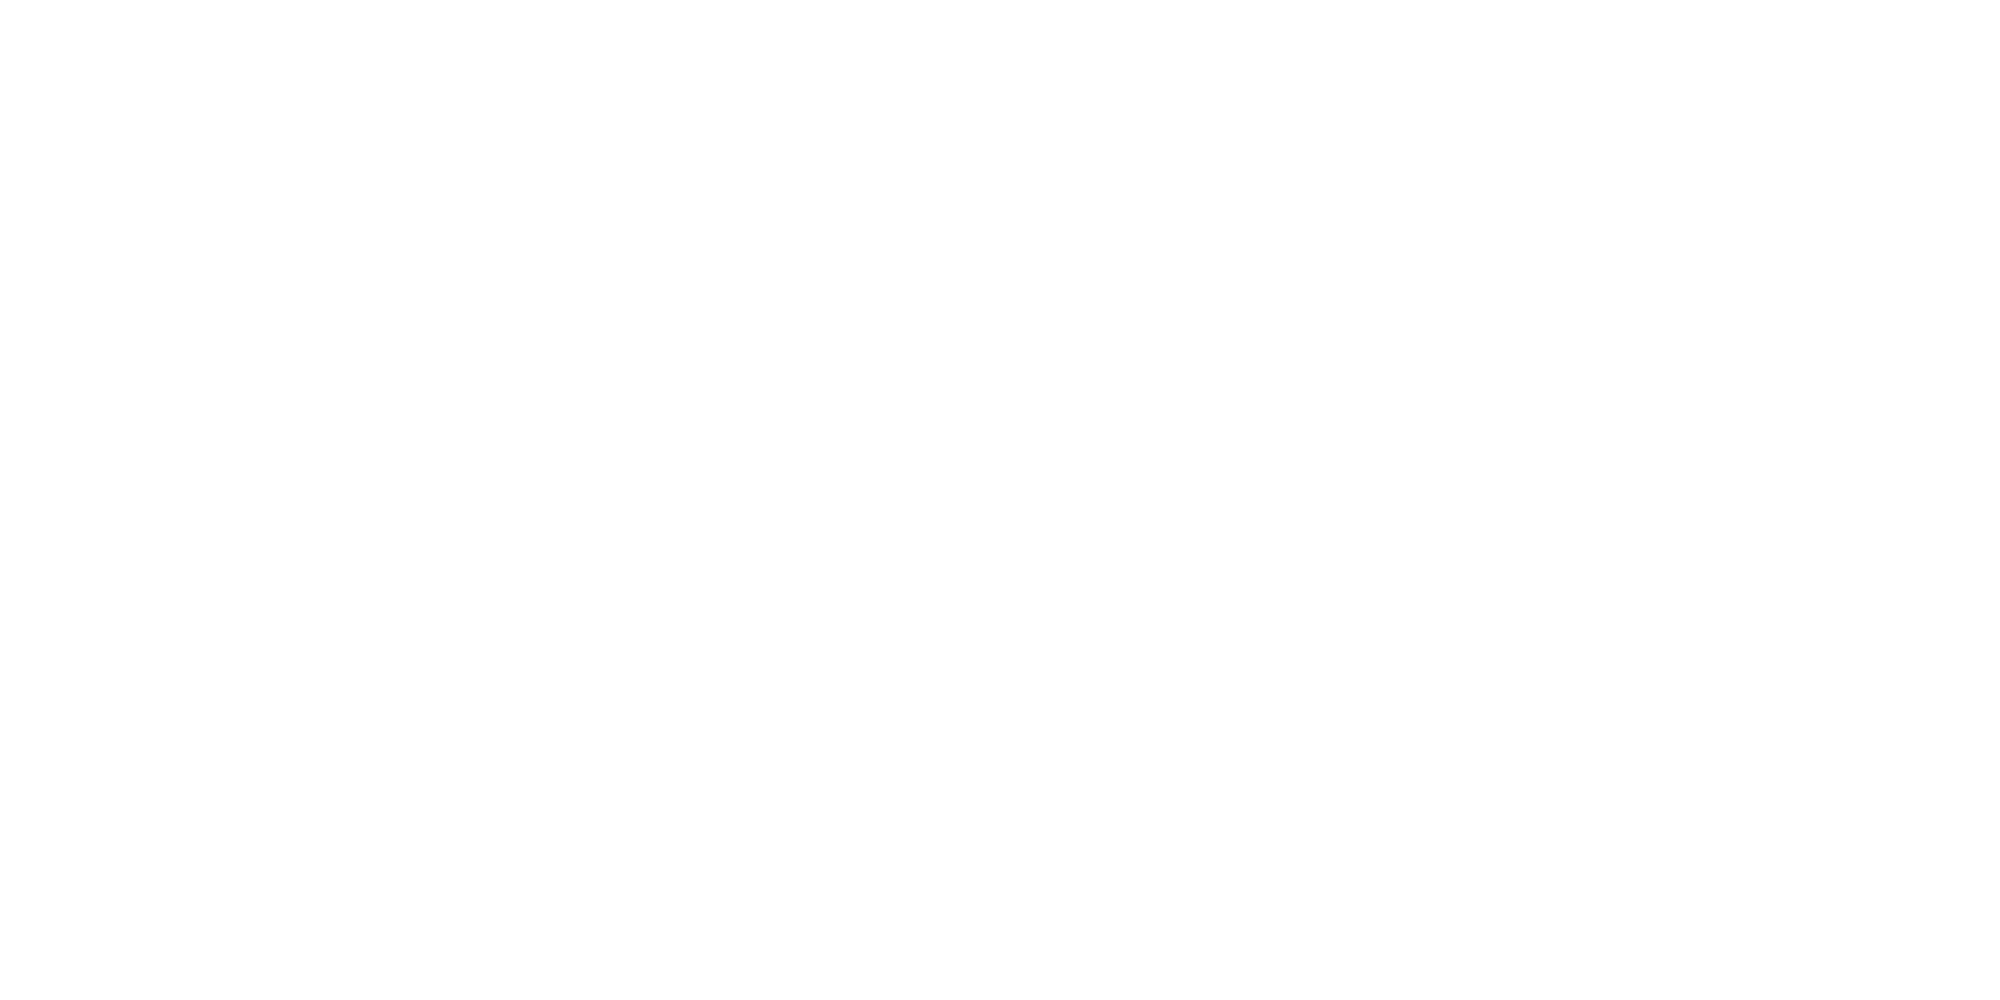

<IPython.core.display.Javascript object>


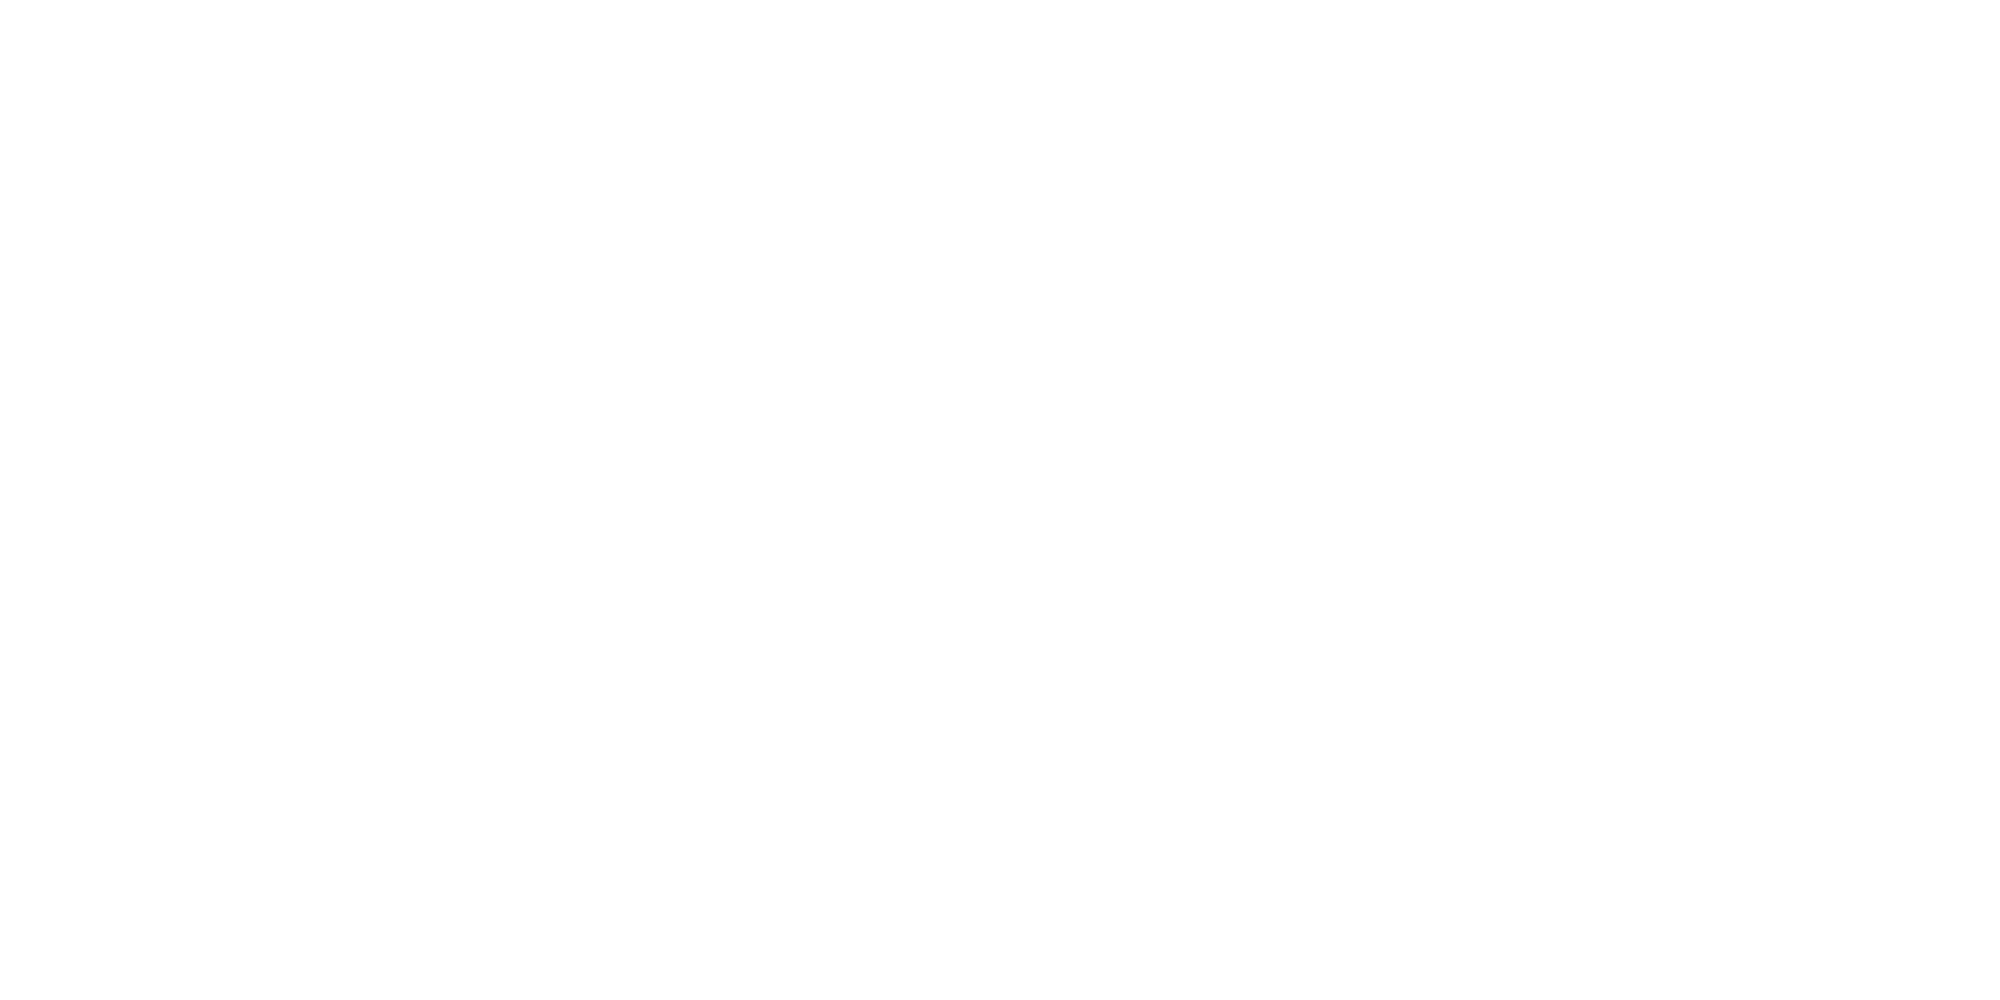

<IPython.core.display.Javascript object>


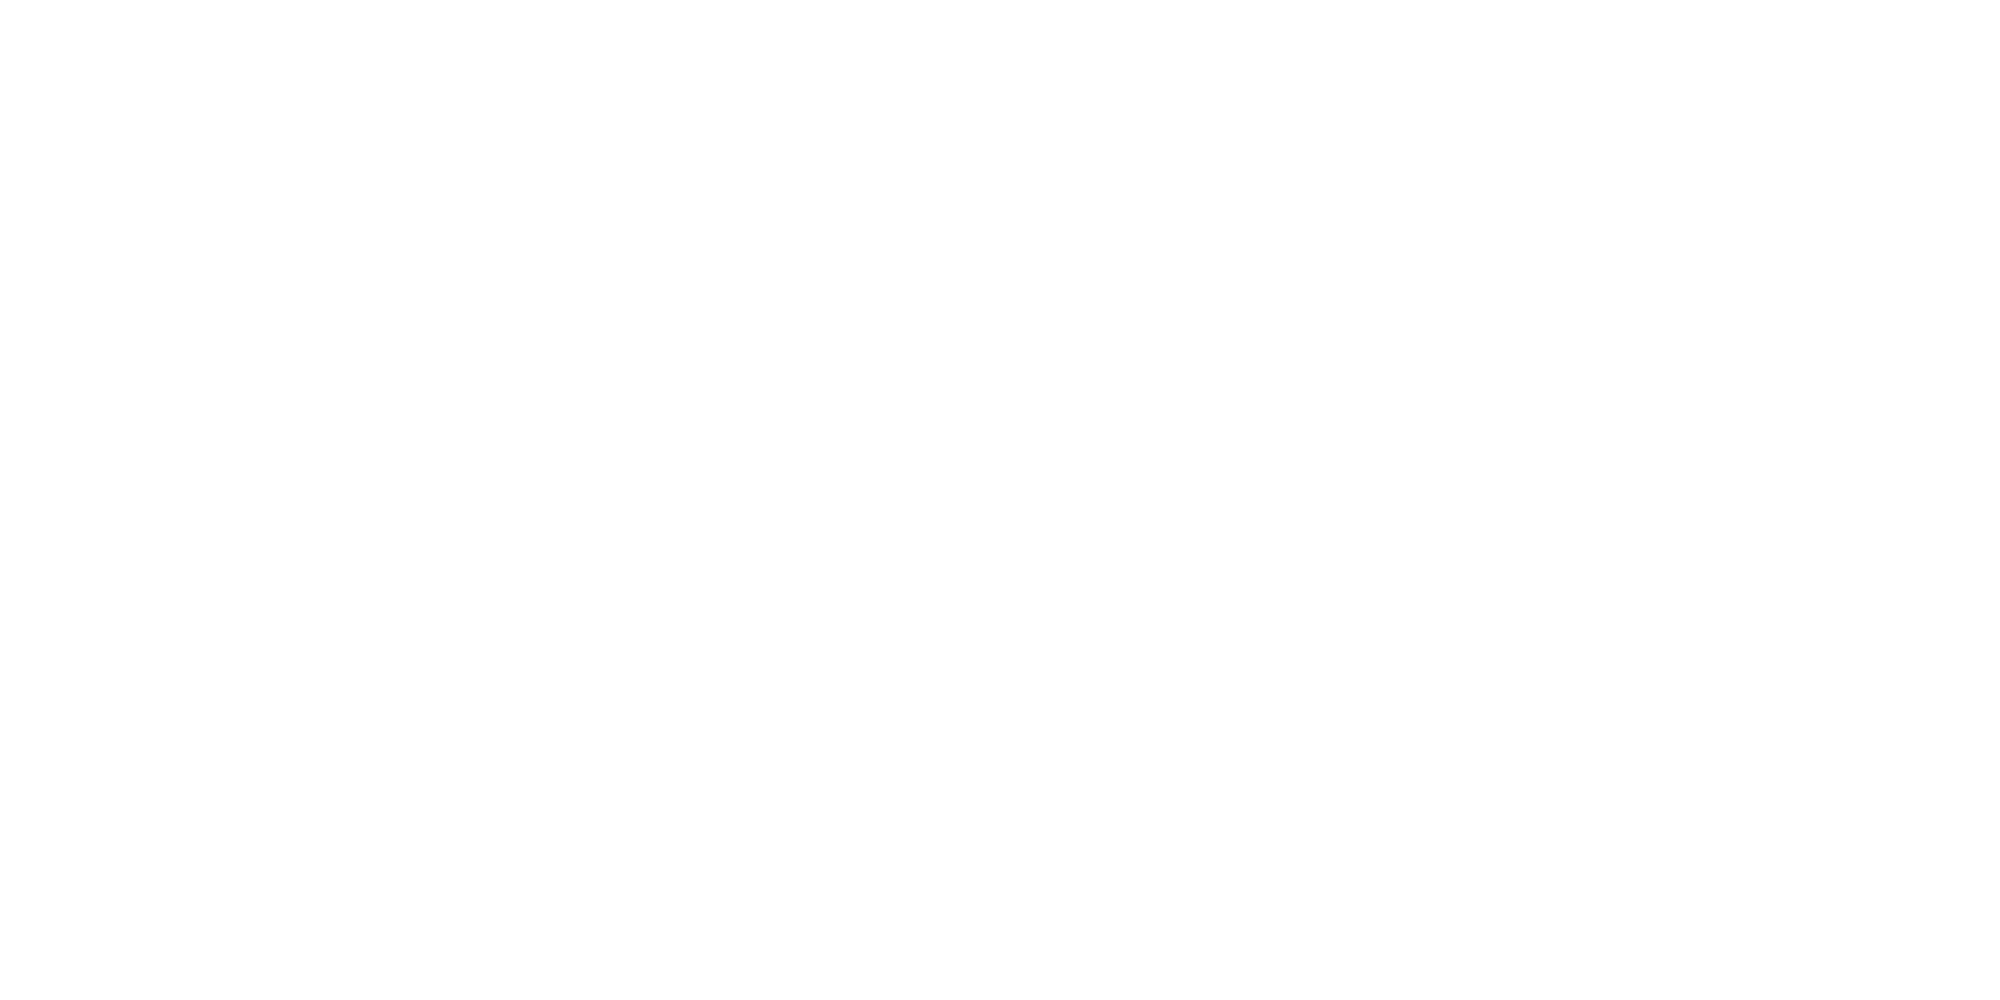

<IPython.core.display.Javascript object>


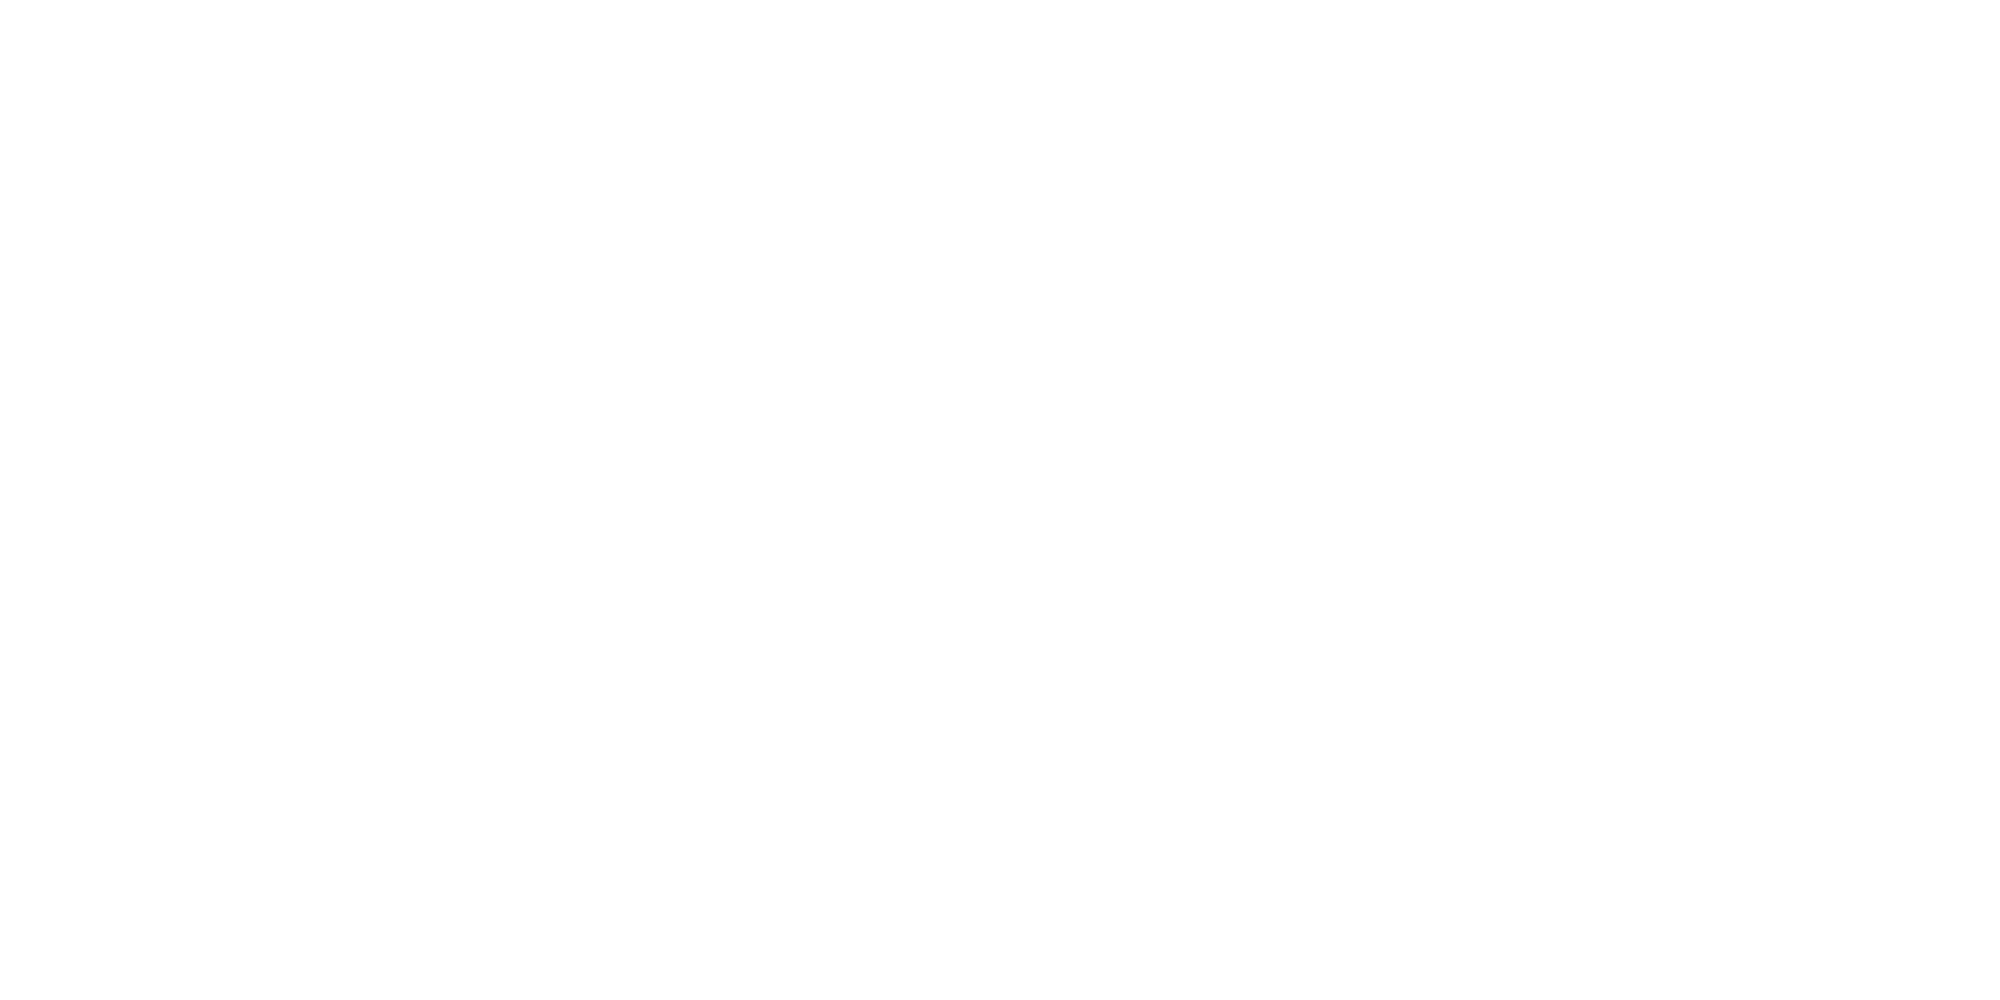

<IPython.core.display.Javascript object>


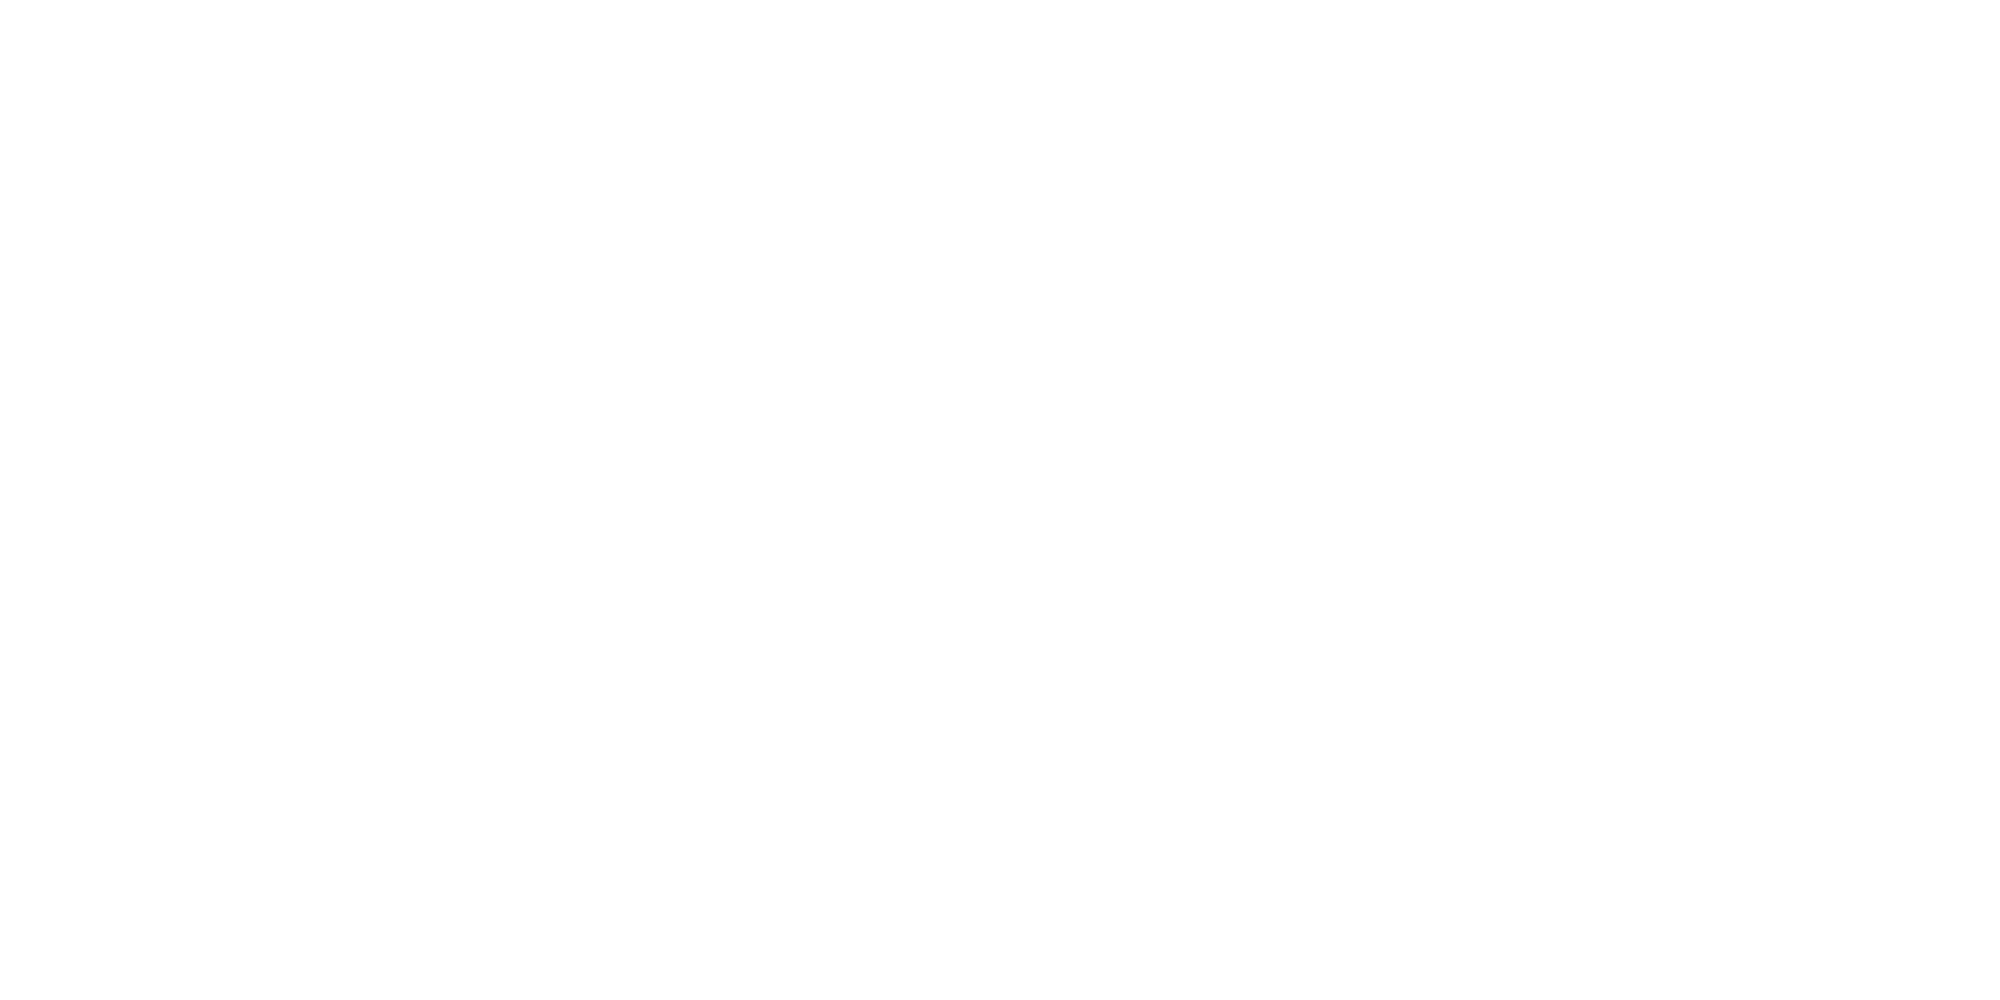

<IPython.core.display.Javascript object>


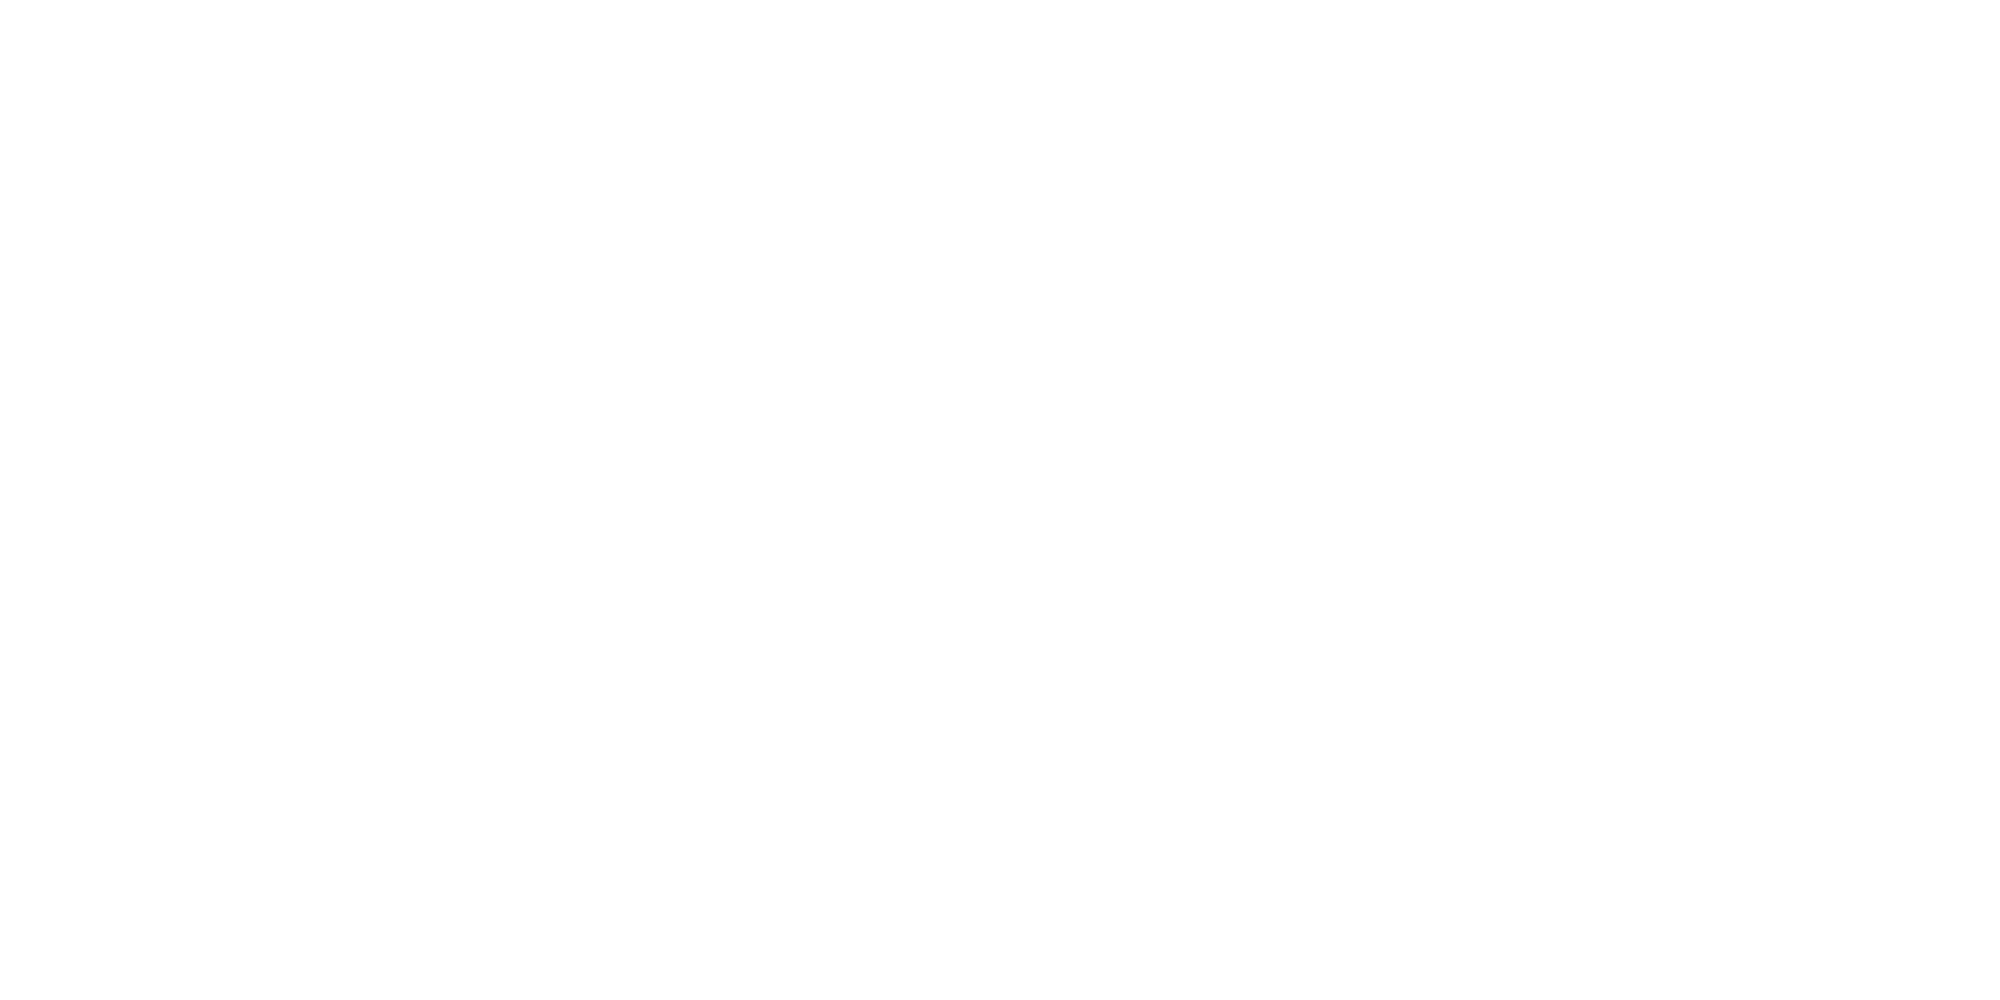

<IPython.core.display.Javascript object>


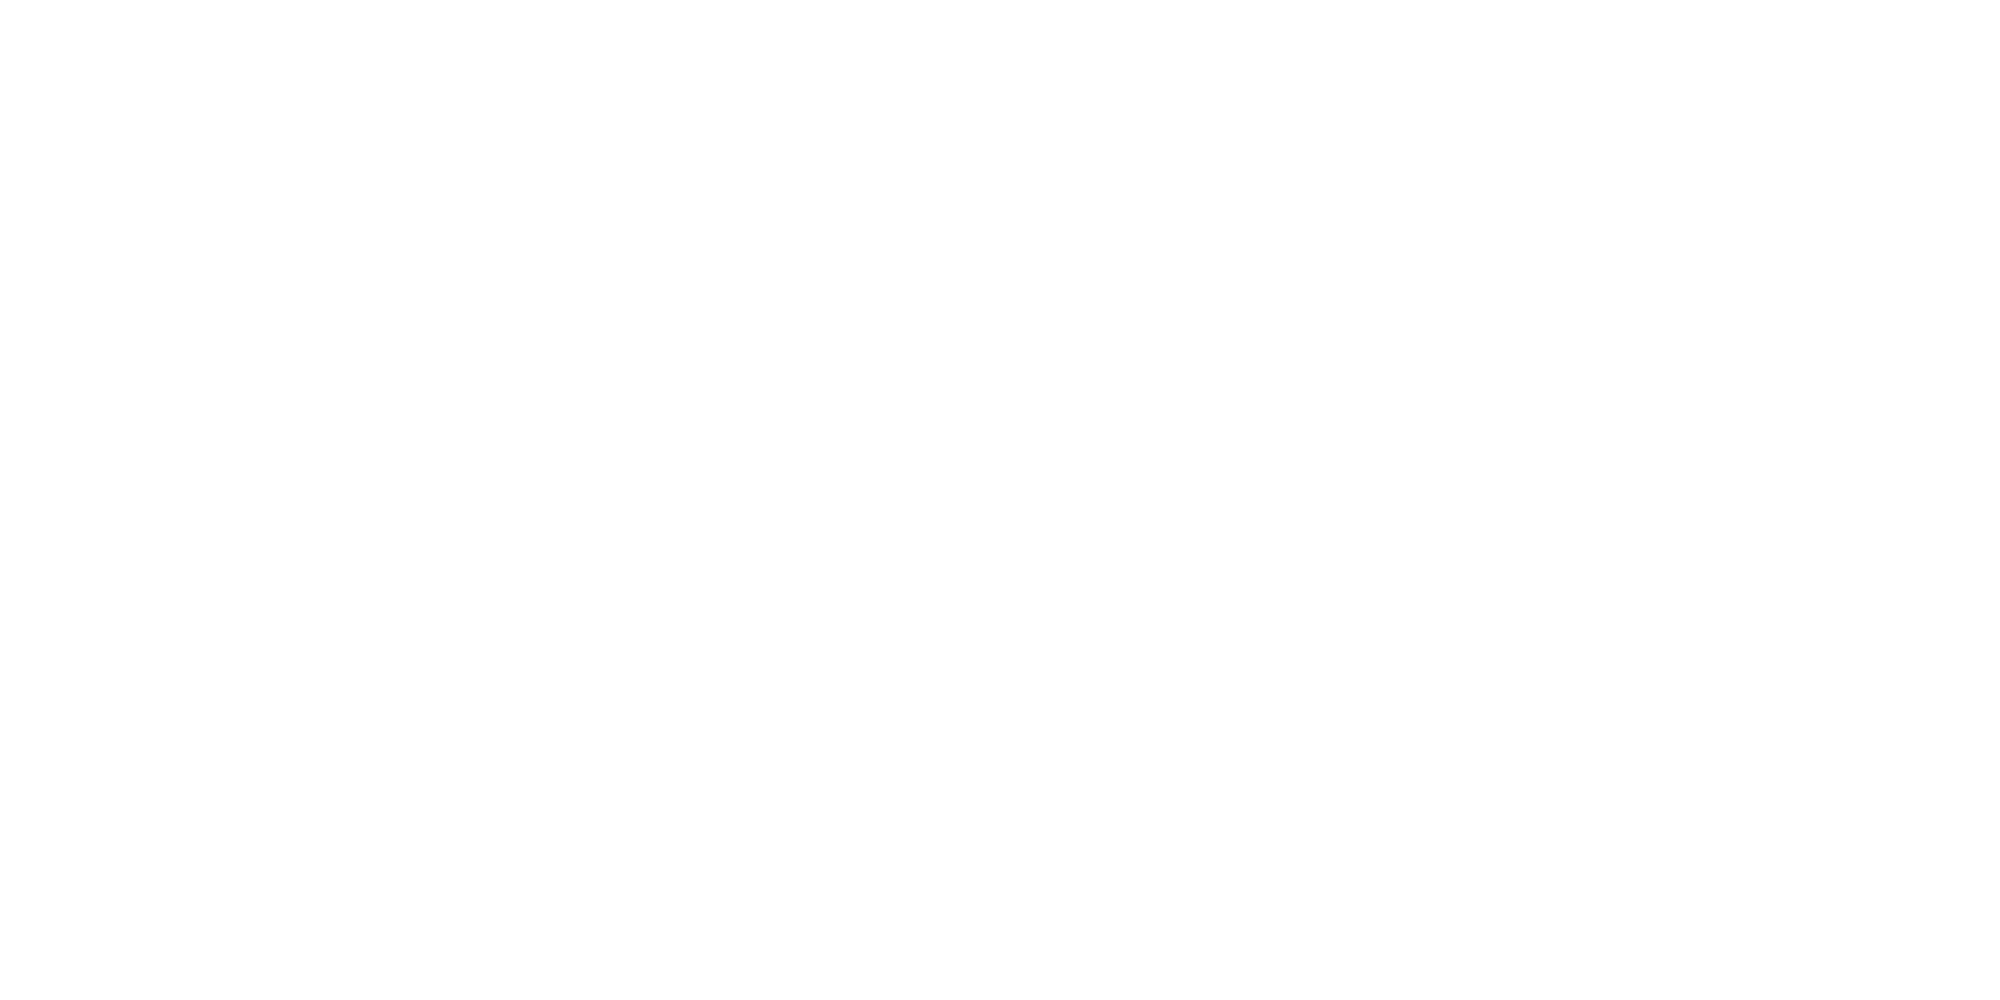

<IPython.core.display.Javascript object>


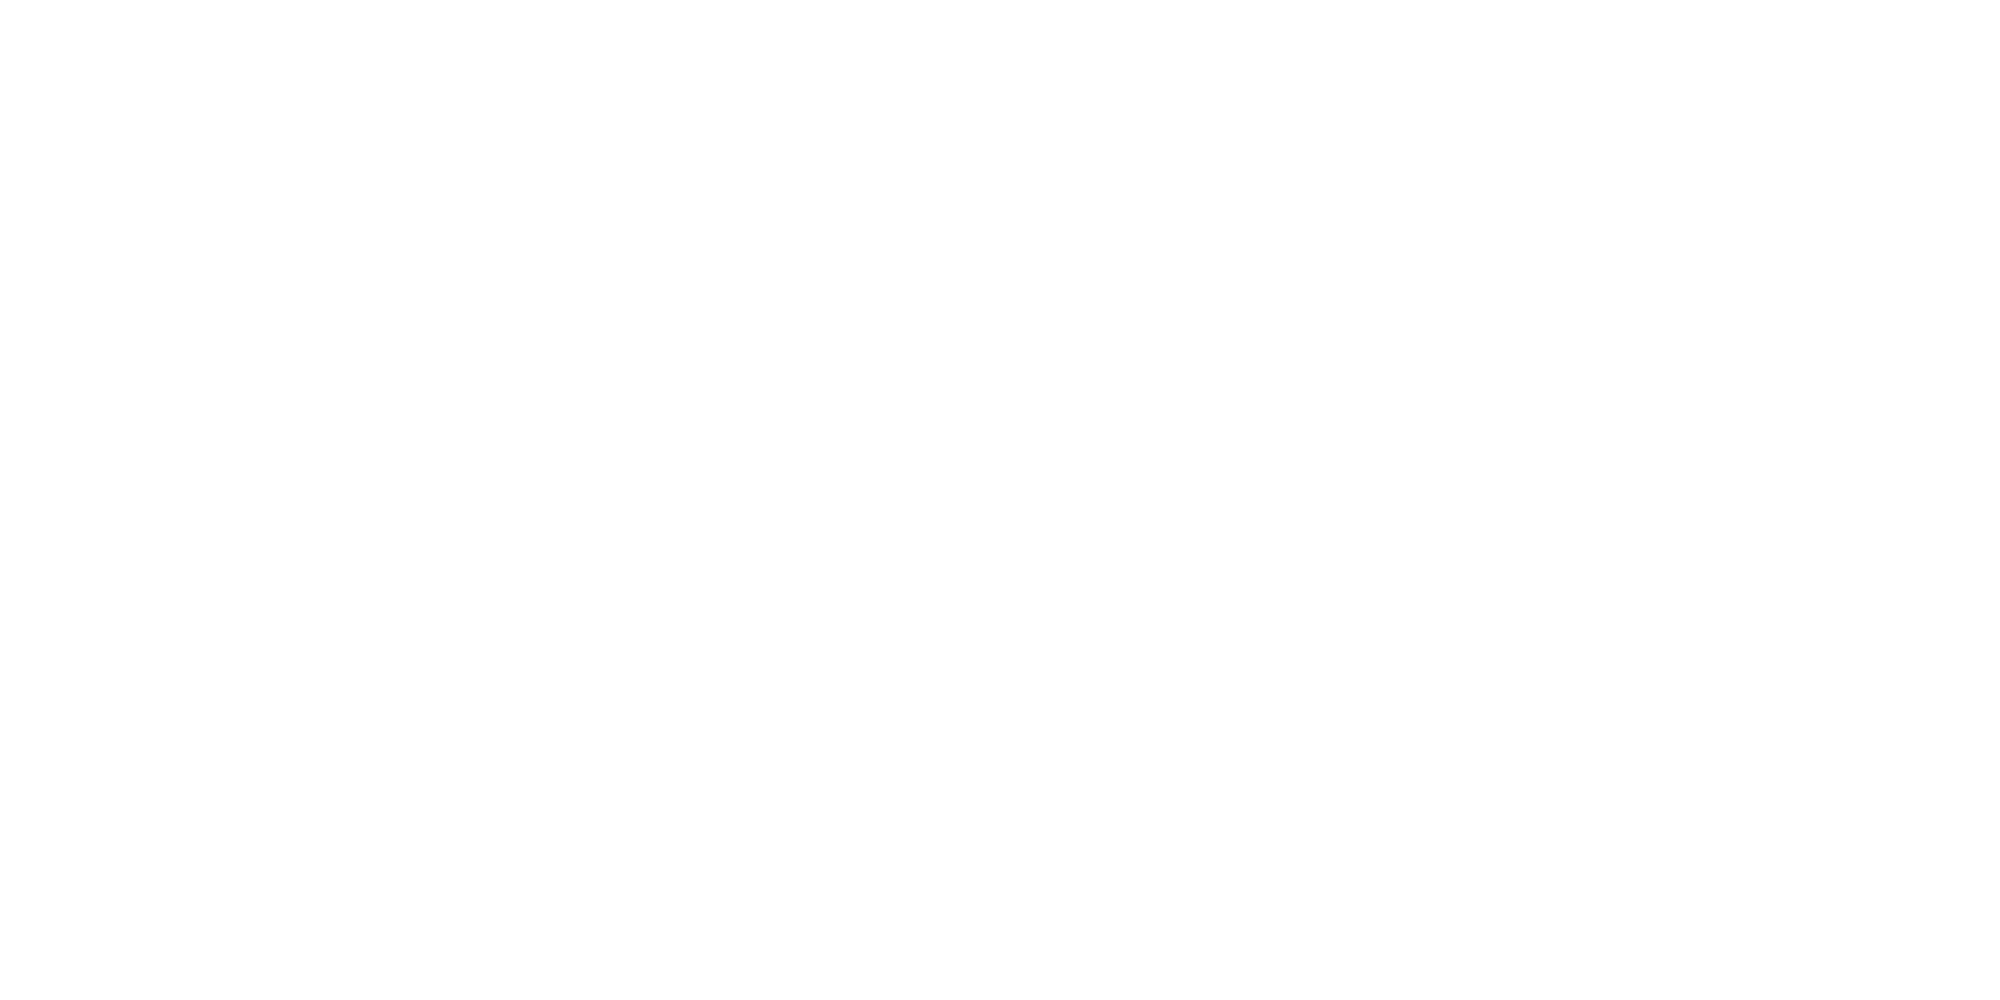

<IPython.core.display.Javascript object>


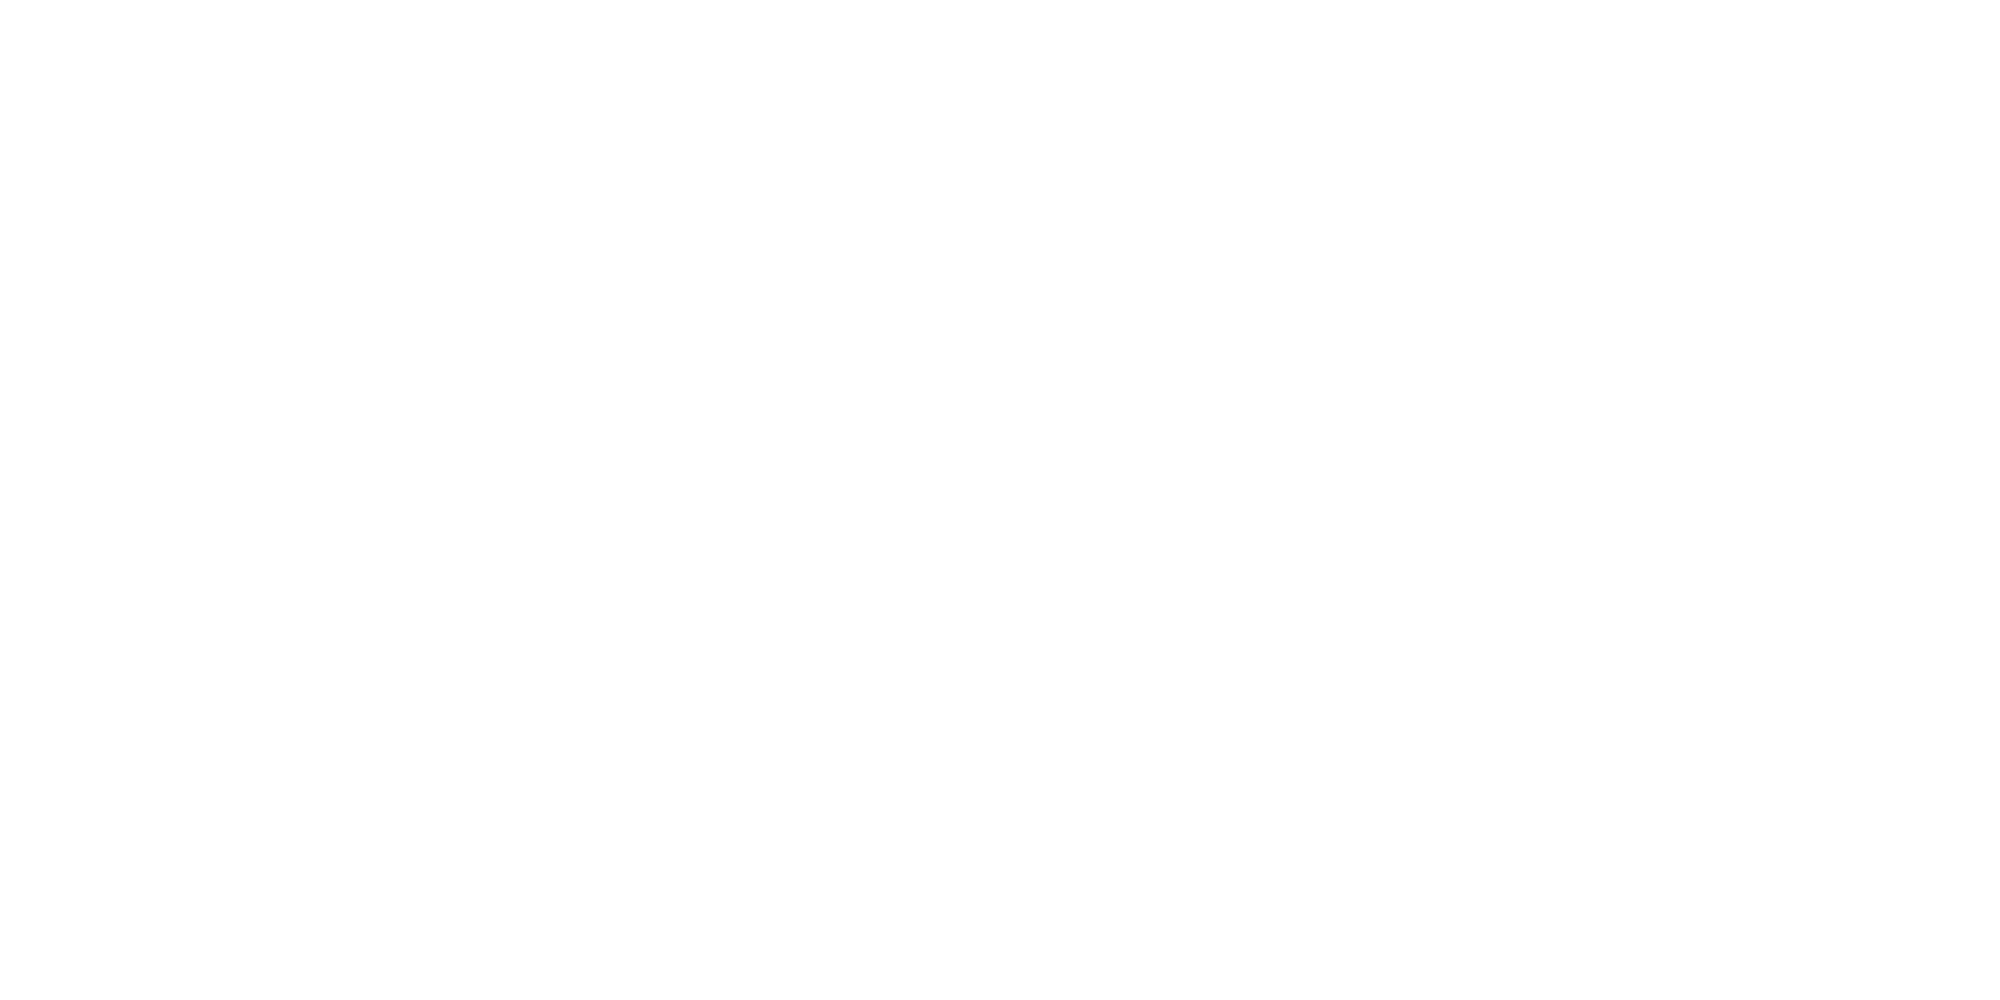

<IPython.core.display.Javascript object>


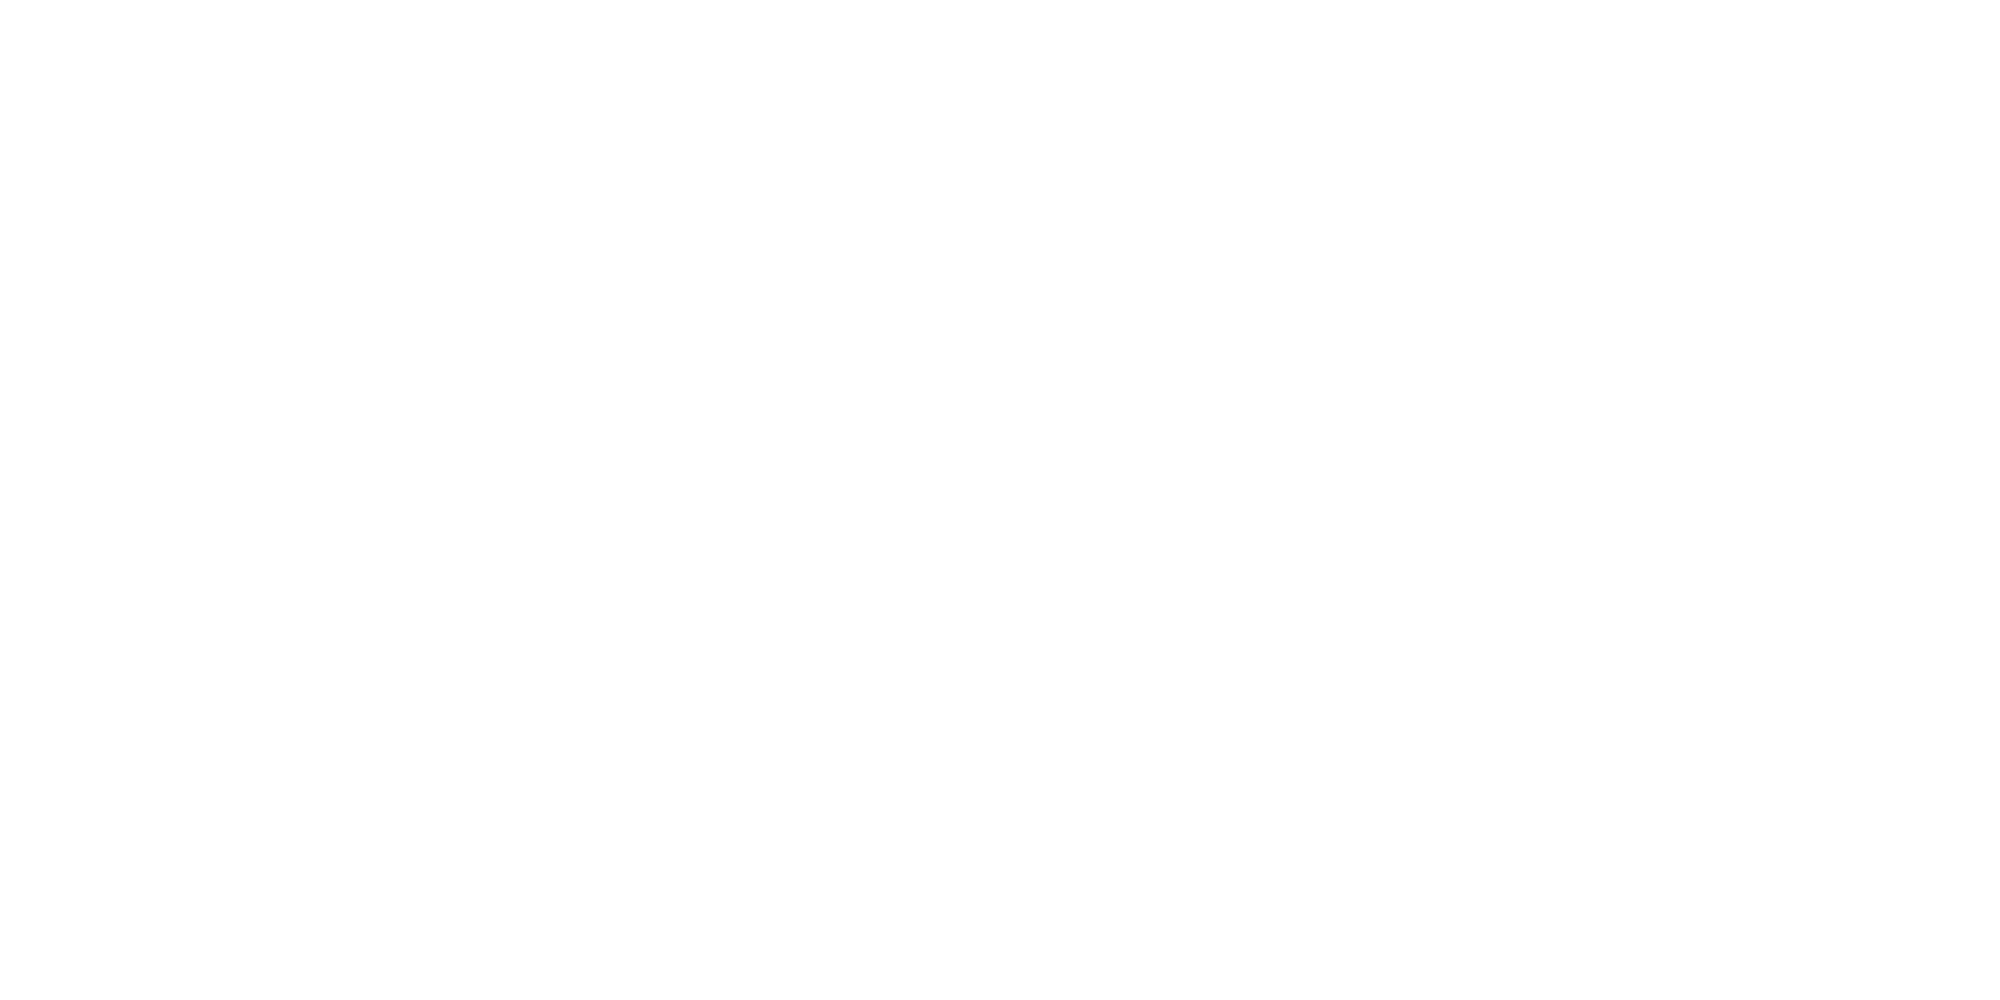

<IPython.core.display.Javascript object>


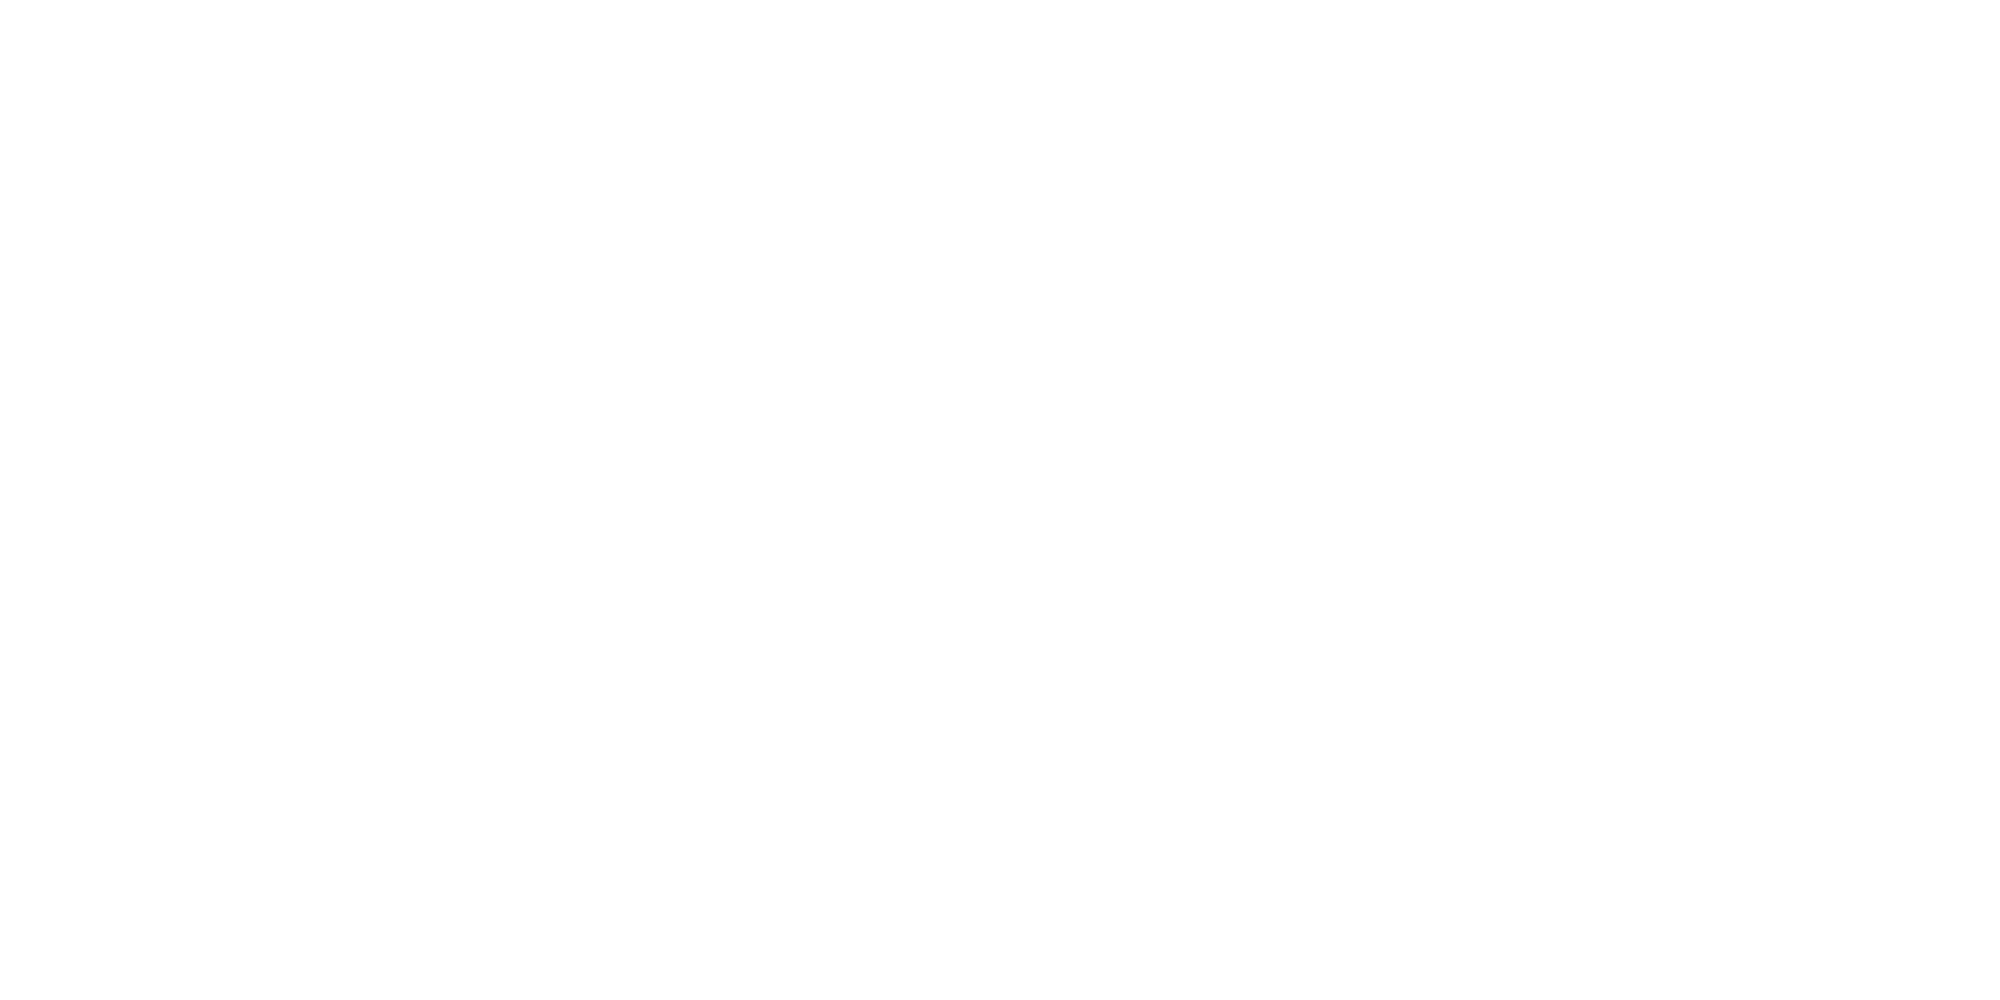

<IPython.core.display.Javascript object>


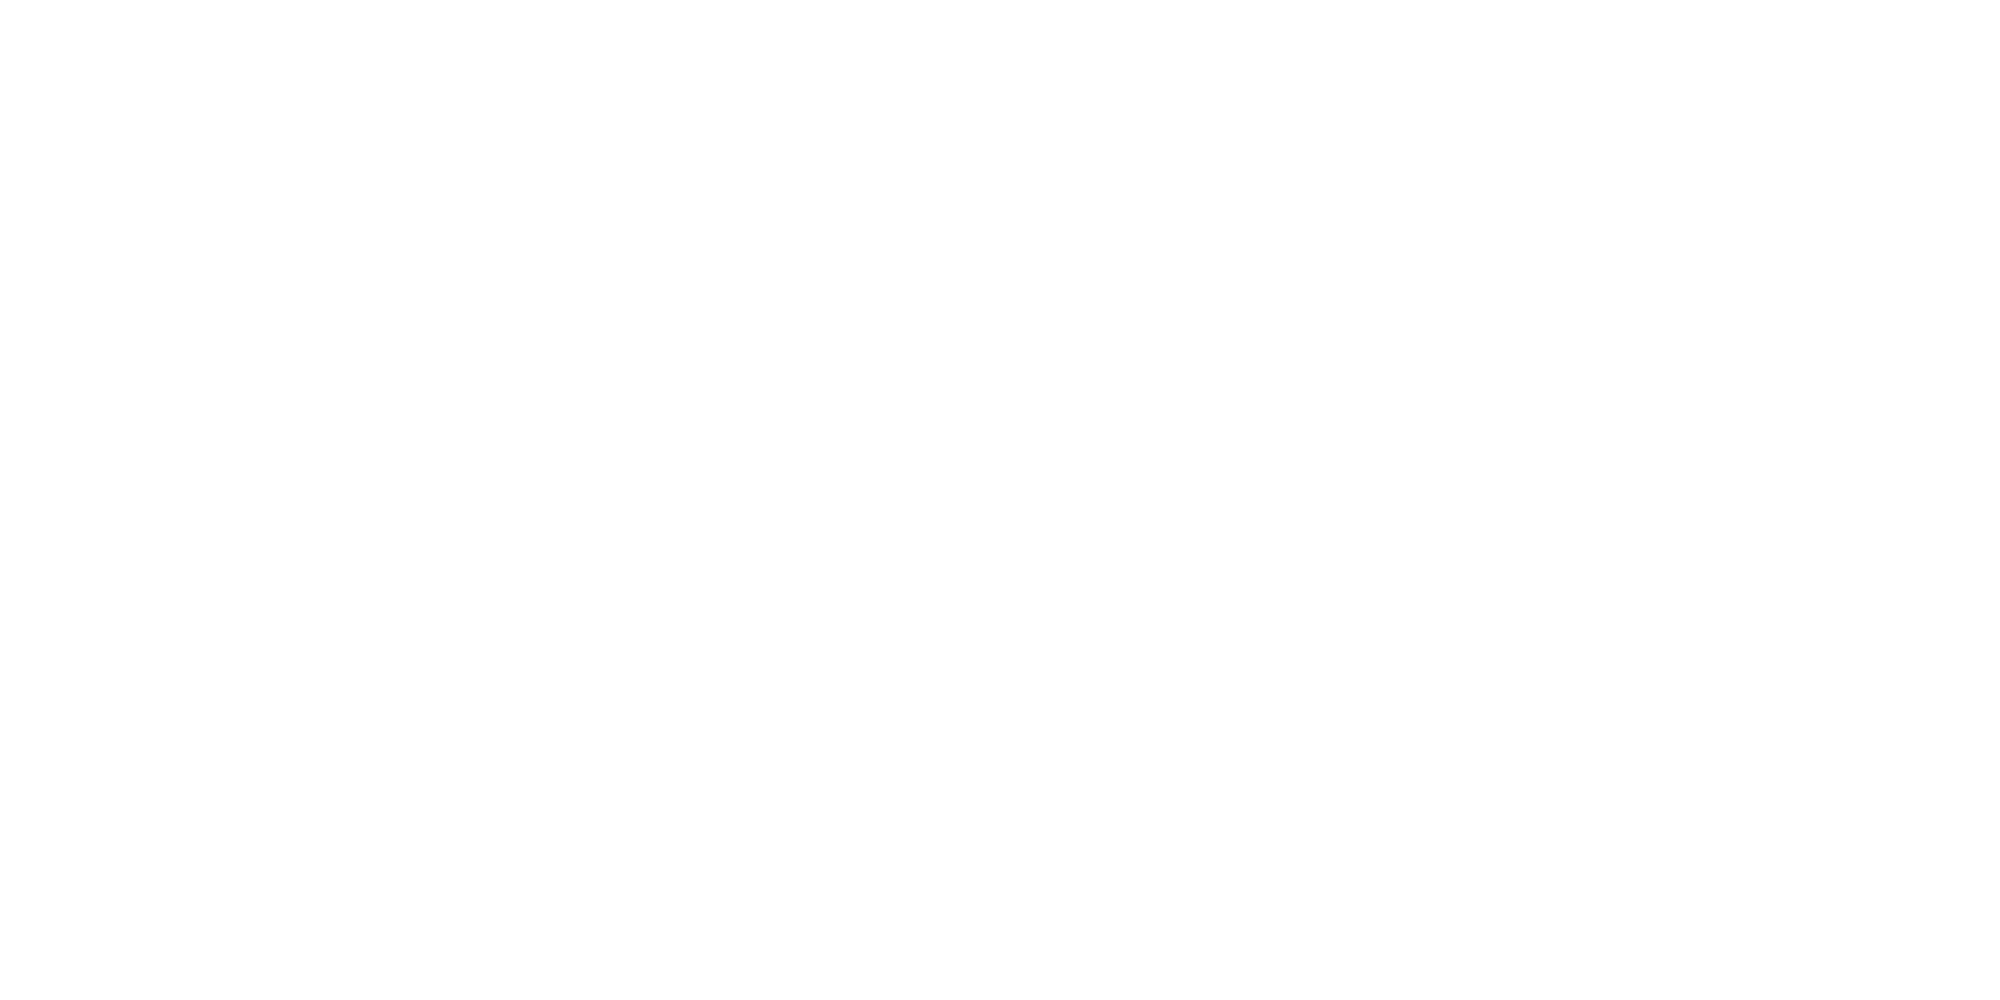

In [59]:
for filt in filters.filters:
    fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5))
    ax[0].plot(filters.filters[filt]['data'][:,0],
            filters.filters[filt]['data'][:,1])
    ax[0].set_xlabel('$\lambda$/nm')
    ax[0].set_yscale('log')
    ax[0].set_ylabel('log${}_{10}(T)$')
    ax[0].set_xlim(200,2000)
    ax[0].set_title(filt)
    ax[0].grid(b=True, which='major', color='#666666', linestyle='-')
    ax[1].plot(filters.filters[filt]['data'][:,0],
            filters.filters[filt]['data'][:,1])
    ax[1].set_xlabel('$\lambda$/nm')
    ax[1].set_ylabel('T')
    ax[1].set_xlim(200,2000)
    ax[1].grid(b=True, which='major', color='#666666', linestyle='-')
    plt.tight_layout()
    plt.savefig('/Users/juan/Google Drive/Zia Lab/Codebase/zialab/misc/filter_figs/%s.png' % (filt.replace('/','-')))
    plt.close()

In [15]:
angled = [filter_name for filter_name in filters.filters if filters.filters[filter_name]['AOI'] == 45]

<IPython.core.display.Javascript object>


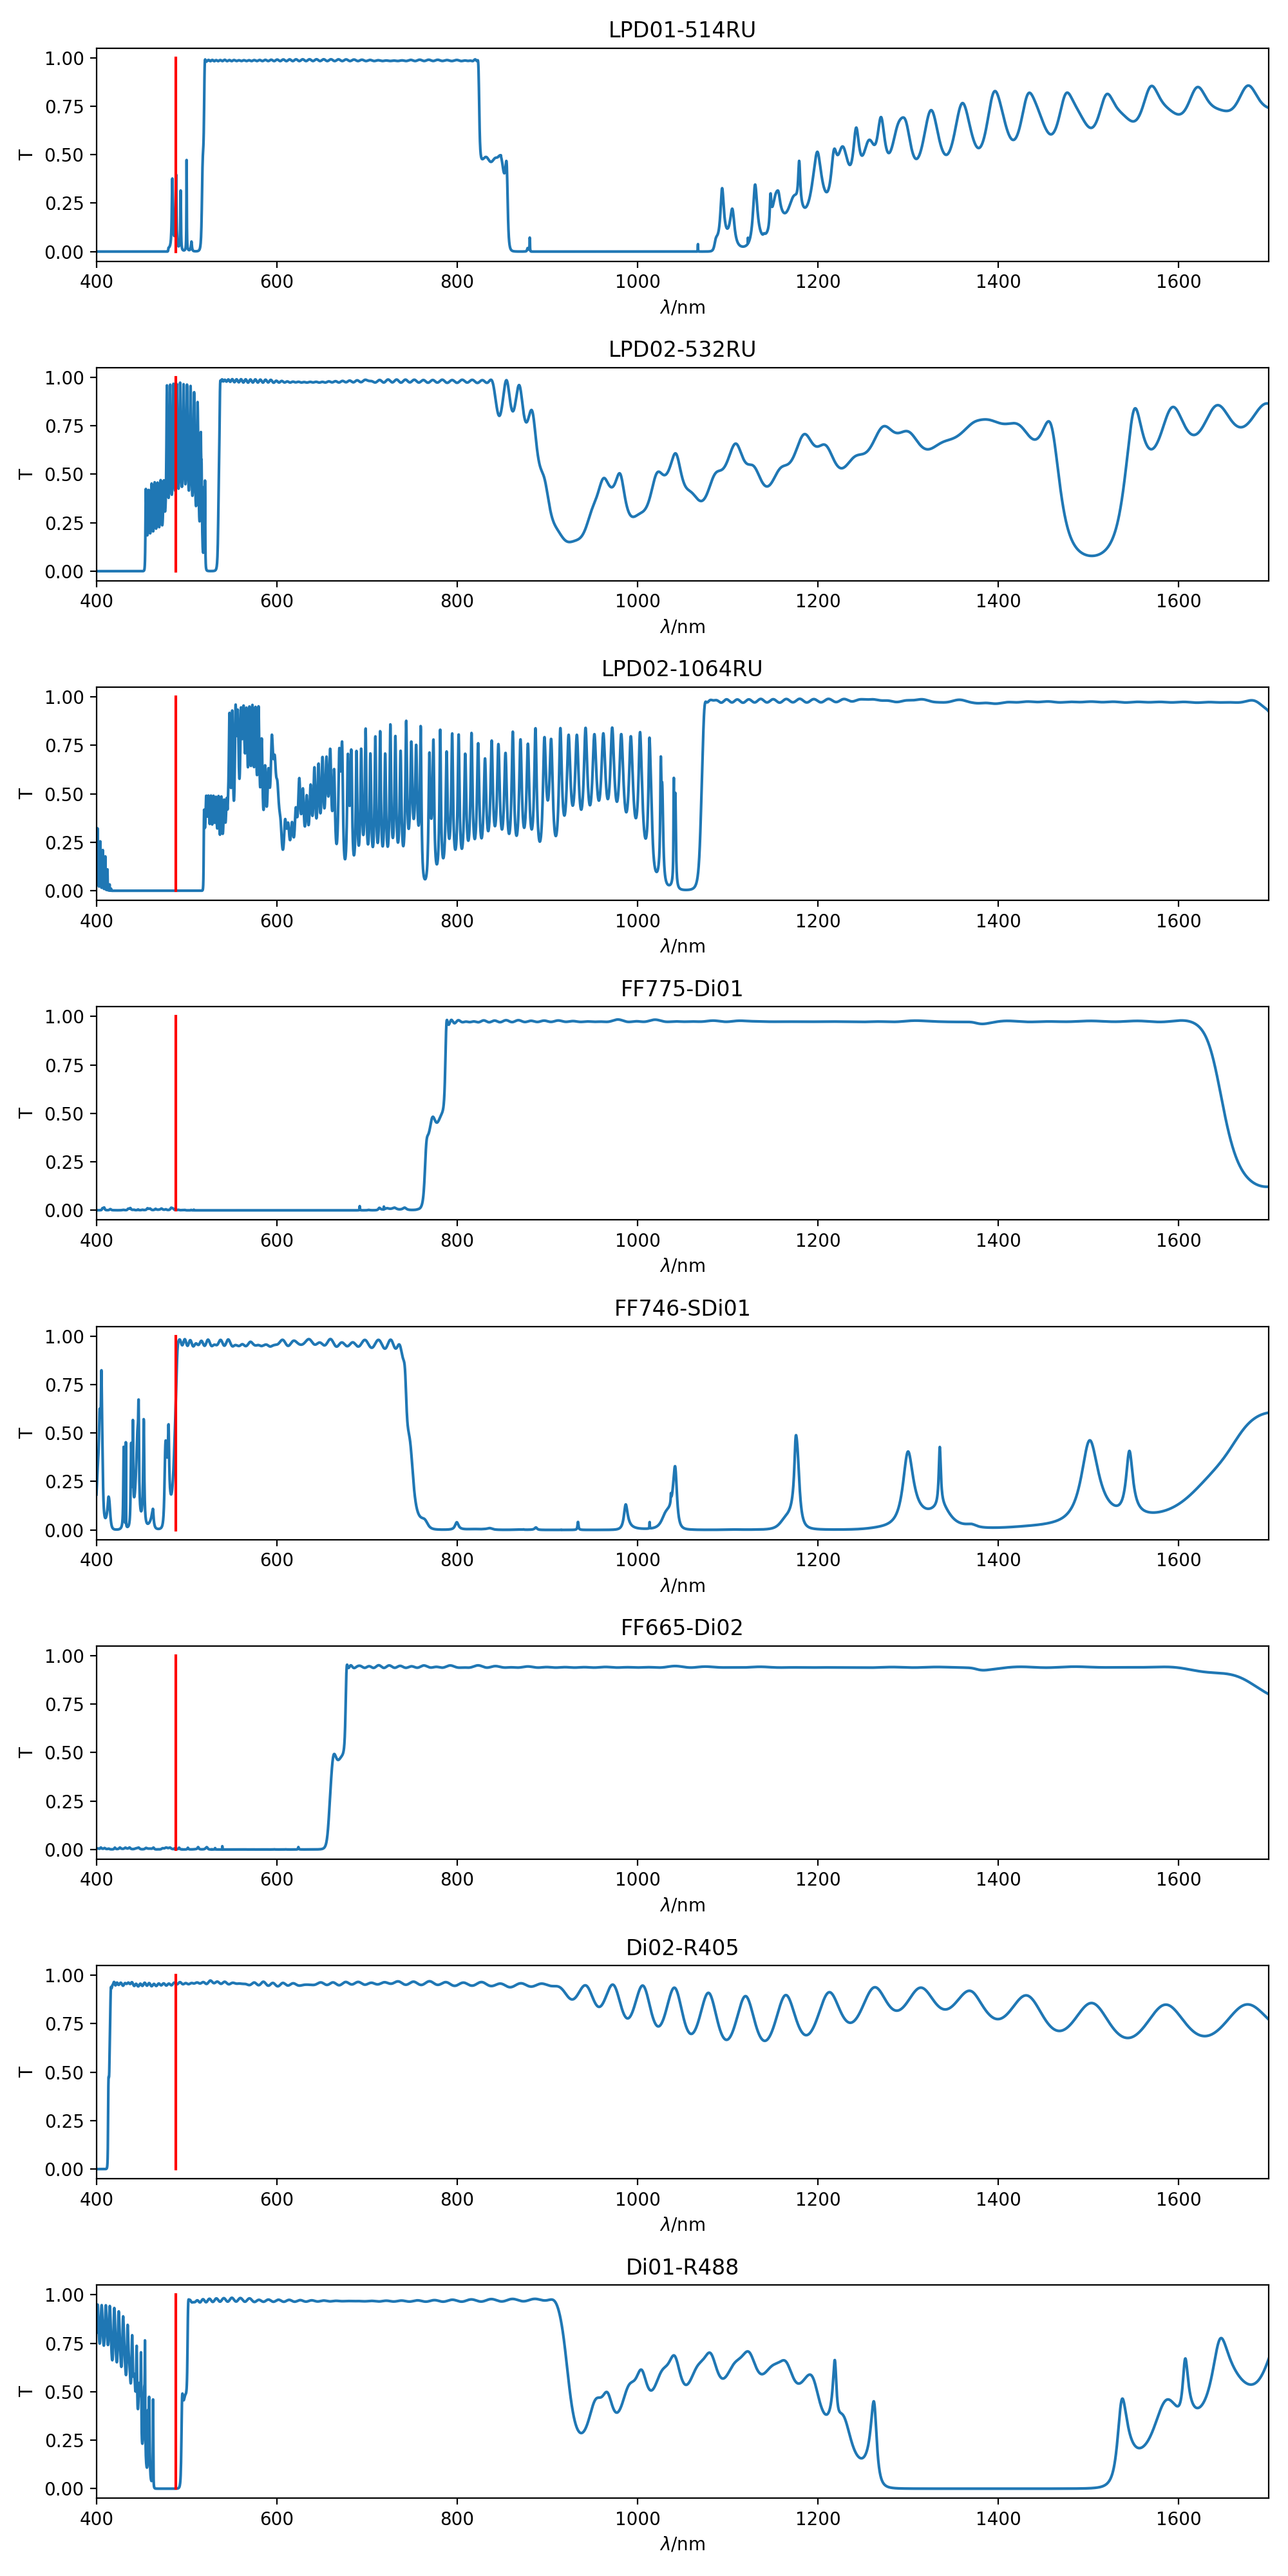

In [17]:
fig, axes = plt.subplots(nrows=len(angled),ncols=1,figsize=(10,20))
for ax_index, filter_name in enumerate(angled):
    axes[ax_index].plot(filters.filters[filter_name]['data'][:,0],
            filters.filters[filter_name]['data'][:,1],label=filter_name)
    #axes[ax_index].legend()
    axes[ax_index].set_title(filter_name)
    axes[ax_index].set_xlim(400,1700)
    axes[ax_index].plot([488,488],[0,1],'r')
    axes[ax_index].set_xlabel('$\lambda$/nm')
    axes[ax_index].set_ylabel('T')
plt.tight_layout()
plt.show()

# Filters

In [1]:
import numpy as np
import matplotlib as mpl; import matplotlib.pyplot as plt
%matplotlib notebook
import os; import pickle
import colorsys

In [2]:
root_dir = "/Users/juan/Google Drive/Zia Lab/Lab Records/Inventory/Filters/"

In [35]:
class Filters():
    print("yo")
    def __init__(self):
        filter_dictionary = pickle.load(open('filters.pkl','rb'))
        self.filters = {filter_dictionary[s][0]:filter_dictionary[s][1] for s in filter_dictionary}
    def search(self,search_terms):
        return {filt: self.filters[filt] for filt in self.filters if search_terms in filt}

yo


In [36]:
filters = Filters()

In [42]:
filter_names = [f for f in filters.filters]

In [43]:
filter_names

['BLP01-325R-25',
 'BLP01-405R-25',
 'BLP01-635R-25',
 'BLP01-785R-25',
 'Di01-R488-25X36',
 'Di02-R405-25X36',
 'FF01-1001/234-25',
 'FF01-1538/82-25',
 'FF01-377/50-25',
 'FF01-406/15',
 'FF01-543/22-25',
 'FF01-590/20-25',
 'FF01-605/15-25',
 'FF01-650/60-25',
 'FF01-650/SP-25',
 'FF01-740/13-25X36',
 'FF665-Di02-25X36',
 'FF746-SDi01-25X36x3.0',
 'FF775-Di01-25X36',
 'LL01-405-12.5',
 'LL01-488-25',
 'LL01-532-12.5',
 'LL01-532-25',
 'LP02-980RS-25',
 'LP03-532RS-25',
 'LPD01-1064RS-25X36-1.1',
 'LPD01-532RS-25X36',
 'LPD01-532RS-25',
 'NF03-405E-25',
 'NF03-532E-25',
 'SP01-532RU-25',
 'LPD01-514RU-25',
 'LL01-976-25']

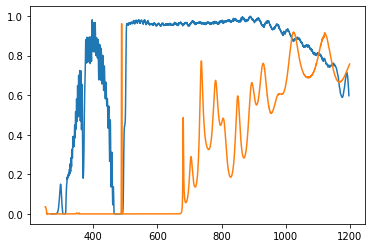

In [38]:
results = filters.search('488')
maxs = []
mins = []
plt.figure()
for filt in results:
    plt.plot(results[filt][:,0],
            results[filt][:,1])
    maxs.append[max()]
plt.show()


In [18]:
dir(filters)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_init_']

In [9]:
#filternames=["BLP01-325R-25","BLP01-405R-25","BLP01-635R-25","BLP01-785R-25","Di01-R488-25X36","Di02-R405-25X36","FF01-1001/234-25","FF01-1538/82-25","FF01-377/50-25","FF01-406/15","FF01-543/22-25","FF01-590/20-25","FF01-605/15-25","FF01-650/60-25","FF01-650/SP-25","FF01-740/13-25X36","FF665-Di02-25X36","FF746-SDi01-25X36x3.0","FF775-Di01-25X36","LL01-405-12.5","LL01-488-25","LL01-532-12.5","LL01-532-25","LP02-980RS-25","LP03-532RS-25","LPD01-1064RS-25X36-1.1","LPD01-532RS-25X36","LPD01-532RS-25","NF03-405E-25","NF03-532E-25","SP01-532RU-25","LPD01-514RU-25"]

In [10]:
# This creates the filter dictionary
#filter_dictionary = {}
#for i in range(27,59):
#    filter_dictionary[i] = [filternames[i-27],(np.genfromtxt(root_dir+"semrock/"+str(i)+".txt"))]
# filter_dictionary[74] = ["LL01-976-25",(np.genfromtxt(root_dir+"semrock/"+str(74)+".txt"))]
# pickle.dump(filter_dictionary,open('filters.pkl','wb'))

In [41]:
spectral_range = np.arange(200,2000)
total_filter = np.ones(len(spectral_range))
for fil_key in filter_dictionary:
    fil = filter_dictionary[fil_key]
    total_filter *= np.interp(spectral_range, fil[1].transpose()[0],fil[1].transpose()[1])

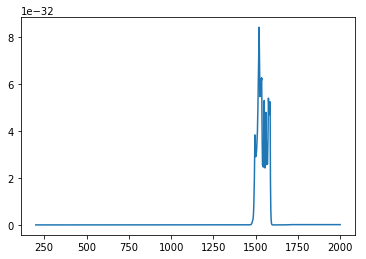

In [42]:
plt.figure()
plt.plot(spectral_range,total_filter)
plt.show()

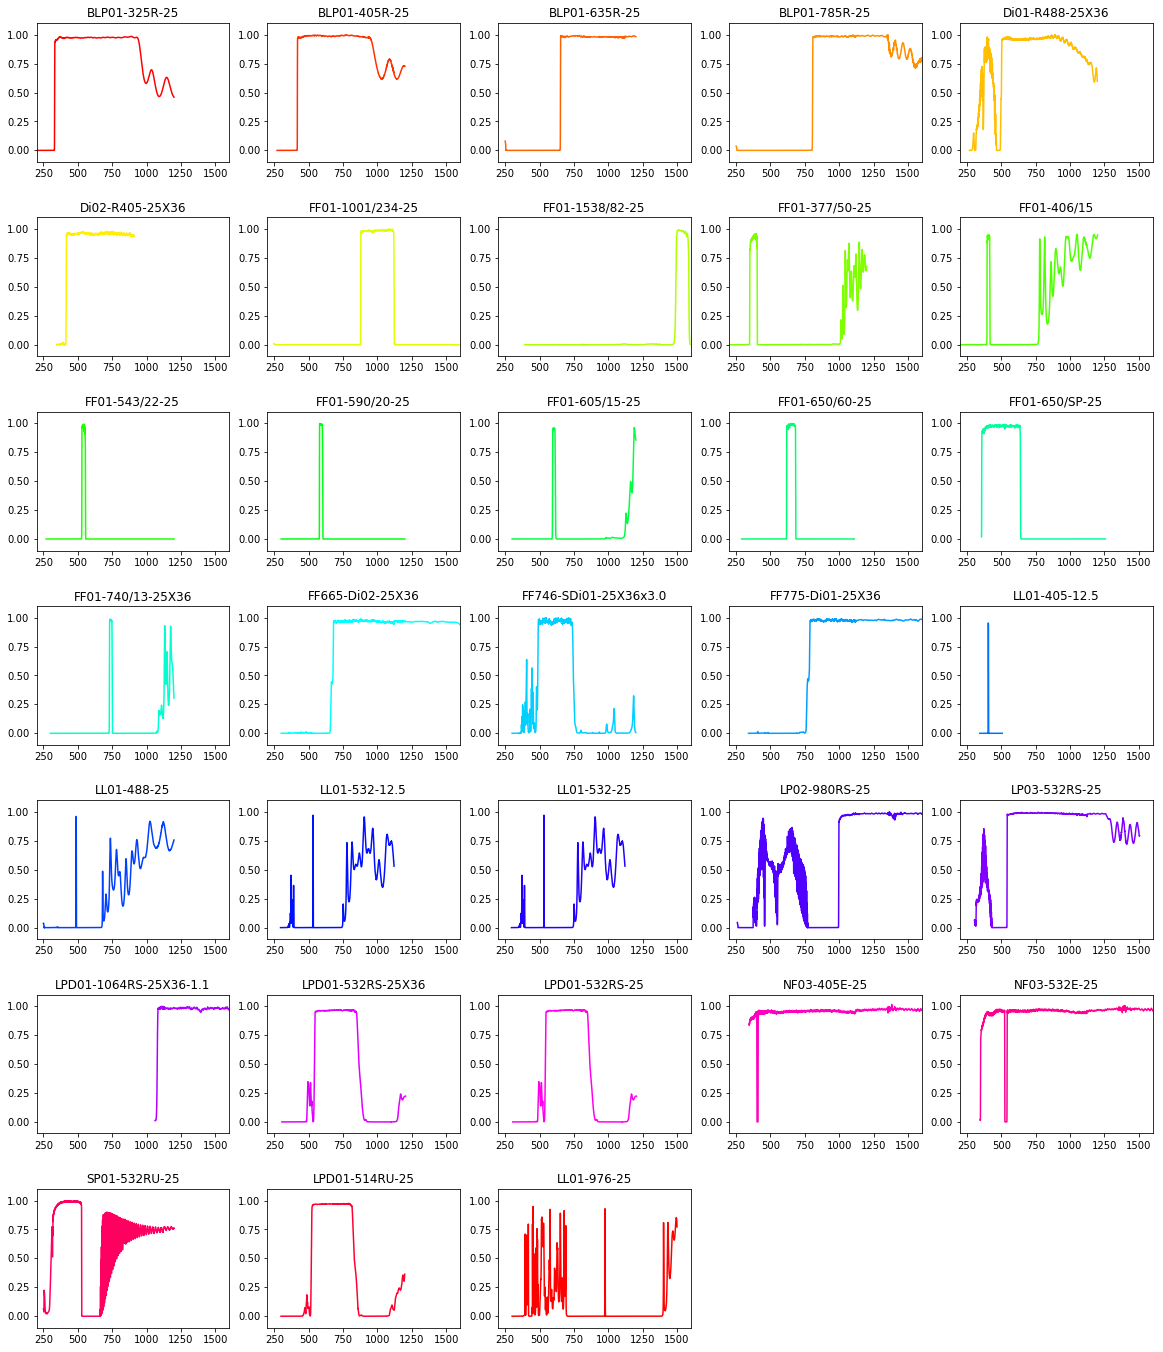

In [38]:
plt.figure(figsize=(20,24))
counter=1
for fil_key in filter_dictionary:
    fil = filter_dictionary[fil_key]
    plt.subplot(int(np.ceil(len(filter_dictionary)/5)),5,counter)
    counter=counter+1
    plt.plot(fil[1].transpose()[0],fil[1].transpose()[1],c=colorsys.hls_to_rgb((counter-2.)/32., 0.5,1))
    plt.xlim(200,1600)
    plt.title(fil[0])
    plt.subplots_adjust(hspace=0.4)
    plt.ylim(-0.1,1.1)
    #if counter==2:
    #    break
#plt.xlabel('$\lambda/$nm')
#plt.ylabel('Transmission')
plt.savefig('semrockfilters.png',dpi=300)
plt.savefig('semrockfilters.pdf')
plt.show()